In [ ]:
SHAP version: 0.47.1
Matplotlib version: 3.10.1
NumPy version: 1.26.0
TensorFlow version: 2.18.0
Keras version: 3.8.0

In [1]:
import shap
import matplotlib
import numpy as np
import tensorflow as tf
import keras

# Checking versions
print("SHAP version:", shap.__version__)
print("Matplotlib version:", matplotlib.__version__)
print("NumPy version:", np.__version__)
print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)


SHAP version: 0.46.0
Matplotlib version: 3.10.0
NumPy version: 1.26.4
TensorFlow version: 2.18.0
Keras version: 3.8.0


### ======================= Install  Libraries =======================

In [2]:
!pip install shap==0.46.0
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 8.3 MB/s eta 0:00:00


###  Feedforward Neural Network Model (also known as a Multilayer Perceptron or MLP) with the following architecture:*

The architecture of this FCNN was chosen to handle the complexities of metabolite data and provide accurate TNBC subtype predictions. The use of dense layers, ReLU activation, dropout, and batch normalization ensures efficient learning, generalization, and model stability. The output softmax layer is perfect for multi-class classification, and the model’s hyperparameters were optimized to balance model performance and prevent overfitting.

### ======================= Import Libraries =======================

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import shap
%matplotlib inline
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
import keras_tuner as kt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, precision_recall_curve
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from tqdm import tqdm  # instead of tqdm.autonotebook.tqdm


In [6]:
# ======================= Load Data =======================
df_metabolites = pd.read_csv("/content/drive/MyDrive/MY THESIS/Thesis/metabolites_training.csv")


In [5]:
import shutil
shutil.rmtree('tuner_results/TNBC_hyperparam_tuning', ignore_errors=True)


Trial 10 Complete [00h 04m 23s]
val_accuracy: 0.9150132139523824

Best val_accuracy So Far: 0.9175170063972473
Total elapsed time: 00h 44m 00s

Best Hyperparameters for Fold 1:
{'units_1': 384, 'dropout_1': 0.30000000000000004, 'units_2': 192, 'dropout_2': 0.30000000000000004, 'units_3': 96, 'dropout_3': 0.4, 'units_4': 32, 'dropout_4': 0.30000000000000004, 'learning_rate': 0.00019714784924358087}
Epoch 1/250
56/56 ━━━━━━━━━━━━━━━━━━━━ 12s 88ms/step - accuracy: 0.3389 - loss: 2.2623 - val_accuracy: 0.5675 - val_loss: 1.6741 - learning_rate: 1.9715e-04
Epoch 2/250
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5421 - loss: 1.7133 - val_accuracy: 0.7035 - val_loss: 1.4270 - learning_rate: 1.9715e-04
Epoch 3/250
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6558 - loss: 1.4695 - val_accuracy: 0.7904 - val_loss: 1.1929 - learning_rate: 1.9715e-04
Epoch 4/250
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7180 - loss: 1.3194 - val_accuracy: 0.8228 - val_loss: 1.0551 - lea

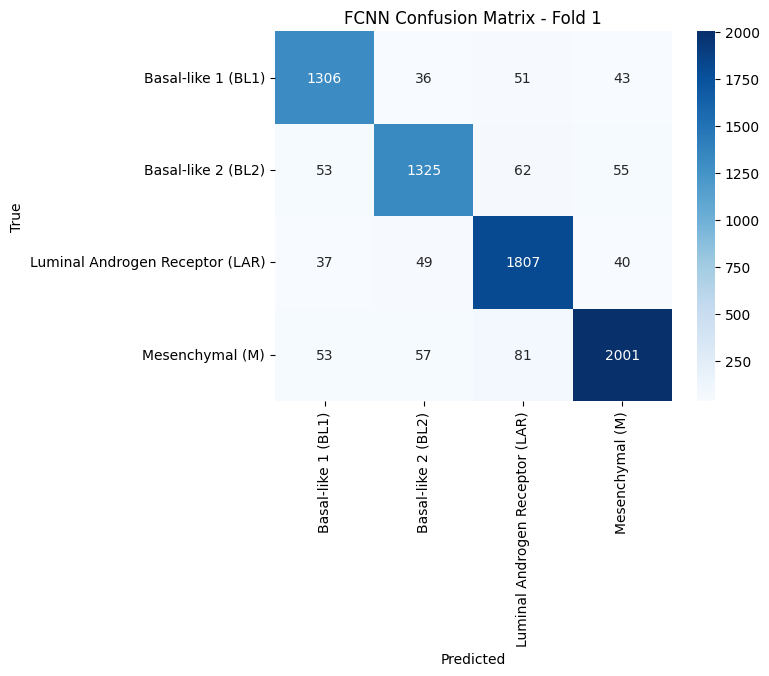


Multi-Class AUC (Fold 1): 0.9906


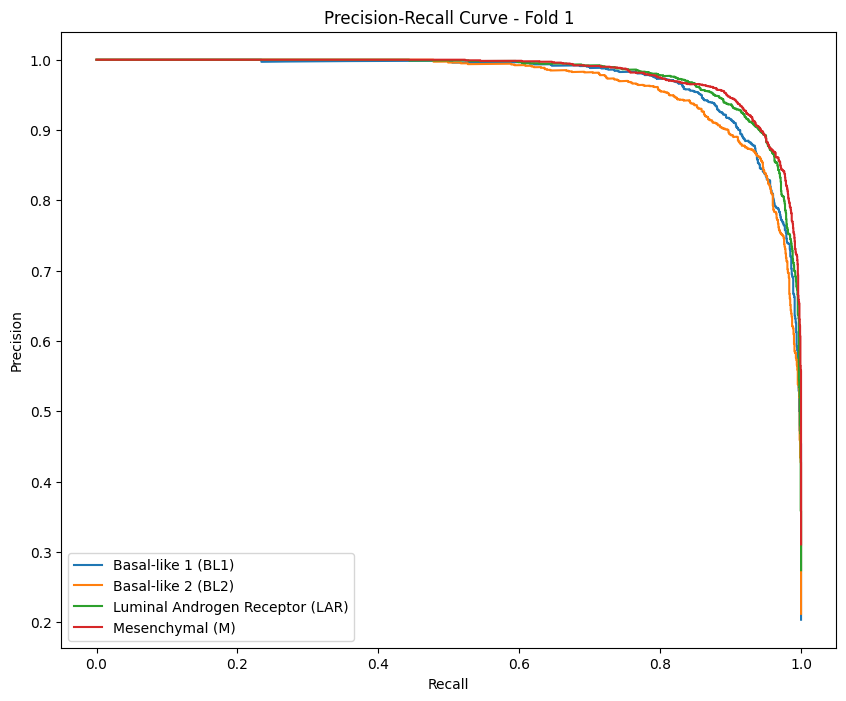


===== Fold 2 =====

Best Hyperparameters for Fold 2:
{'units_1': 384, 'dropout_1': 0.30000000000000004, 'units_2': 192, 'dropout_2': 0.30000000000000004, 'units_3': 96, 'dropout_3': 0.4, 'units_4': 32, 'dropout_4': 0.30000000000000004, 'learning_rate': 0.00019714784924358087}
Epoch 1/250


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


56/56 ━━━━━━━━━━━━━━━━━━━━ 13s 102ms/step - accuracy: 0.3291 - loss: 2.4206 - val_accuracy: 0.6343 - val_loss: 1.6470 - learning_rate: 1.9715e-04
Epoch 2/250
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5653 - loss: 1.6866 - val_accuracy: 0.7395 - val_loss: 1.3883 - learning_rate: 1.9715e-04
Epoch 3/250
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6619 - loss: 1.4553 - val_accuracy: 0.7948 - val_loss: 1.1774 - learning_rate: 1.9715e-04
Epoch 4/250
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7113 - loss: 1.3390 - val_accuracy: 0.8218 - val_loss: 1.0623 - learning_rate: 1.9715e-04
Epoch 5/250
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7444 - loss: 1.2419 - val_accuracy: 0.8318 - val_loss: 1.0043 - learning_rate: 1.9715e-04
Epoch 6/250
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7649 - loss: 1.1845 - val_accuracy: 0.8394 - val_loss: 0.9729 - learning_rate: 1.9715e-04
Epoch 7/250
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7812 - loss: 1

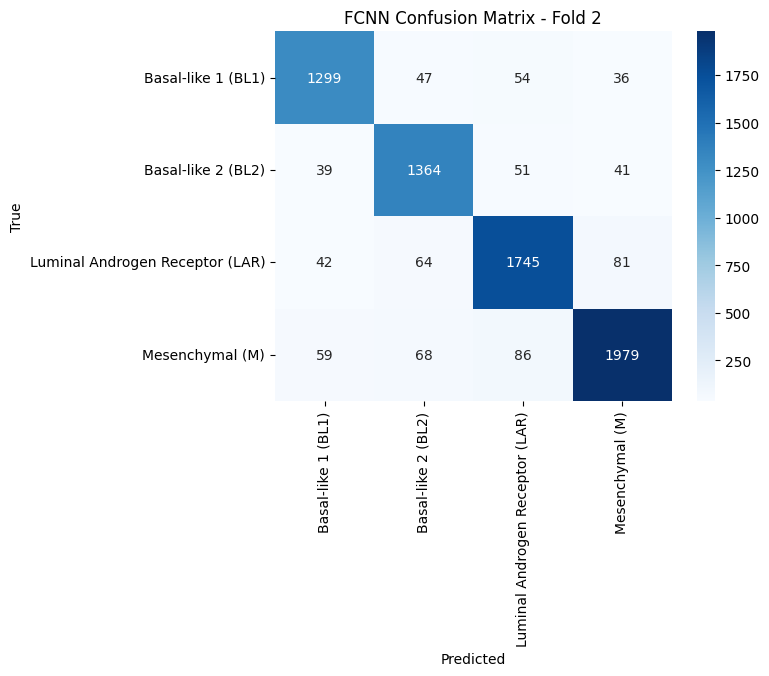


Multi-Class AUC (Fold 2): 0.9888


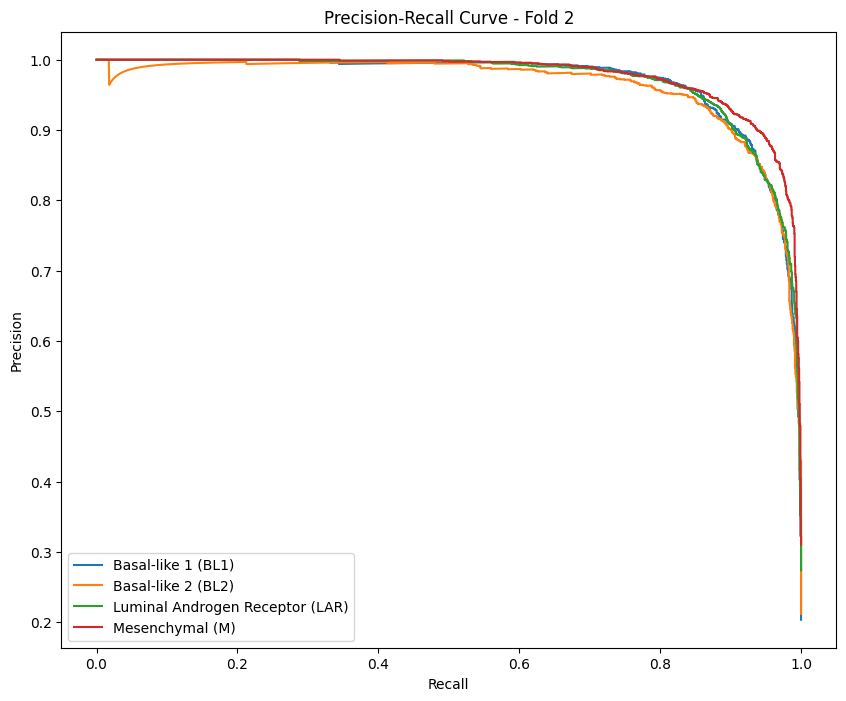


===== Fold 3 =====

Best Hyperparameters for Fold 3:
{'units_1': 384, 'dropout_1': 0.30000000000000004, 'units_2': 192, 'dropout_2': 0.30000000000000004, 'units_3': 96, 'dropout_3': 0.4, 'units_4': 32, 'dropout_4': 0.30000000000000004, 'learning_rate': 0.00019714784924358087}
Epoch 1/250


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


56/56 ━━━━━━━━━━━━━━━━━━━━ 12s 86ms/step - accuracy: 0.3304 - loss: 2.2228 - val_accuracy: 0.6023 - val_loss: 1.7160 - learning_rate: 1.9715e-04
Epoch 2/250
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5556 - loss: 1.6776 - val_accuracy: 0.7534 - val_loss: 1.4465 - learning_rate: 1.9715e-04
Epoch 3/250
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6550 - loss: 1.4490 - val_accuracy: 0.8004 - val_loss: 1.2093 - learning_rate: 1.9715e-04
Epoch 4/250
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7228 - loss: 1.2931 - val_accuracy: 0.8227 - val_loss: 1.0624 - learning_rate: 1.9715e-04
Epoch 5/250
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7497 - loss: 1.2166 - val_accuracy: 0.8340 - val_loss: 0.9933 - learning_rate: 1.9715e-04
Epoch 6/250
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7774 - loss: 1.1445 - val_accuracy: 0.8403 - val_loss: 0.9566 - learning_rate: 1.9715e-04
Epoch 7/250
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7856 - loss: 1.

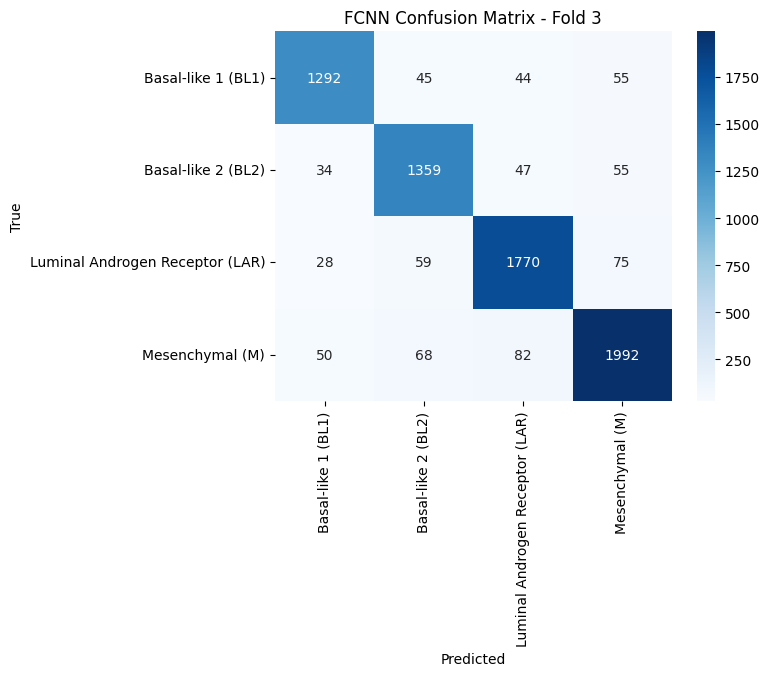


Multi-Class AUC (Fold 3): 0.9898


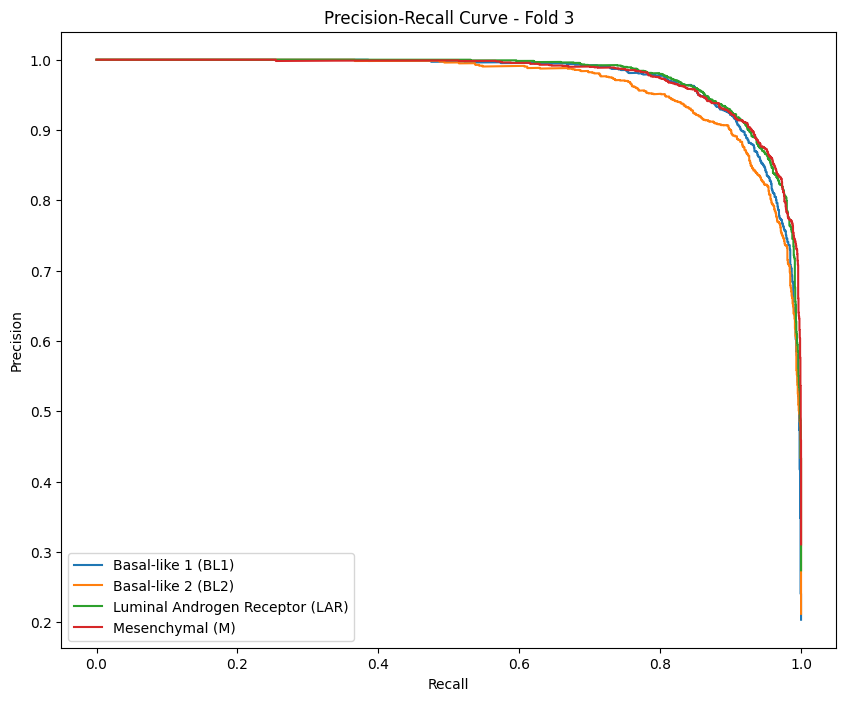


===== Fold 4 =====

Best Hyperparameters for Fold 4:
{'units_1': 384, 'dropout_1': 0.30000000000000004, 'units_2': 192, 'dropout_2': 0.30000000000000004, 'units_3': 96, 'dropout_3': 0.4, 'units_4': 32, 'dropout_4': 0.30000000000000004, 'learning_rate': 0.00019714784924358087}
Epoch 1/250


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


56/56 ━━━━━━━━━━━━━━━━━━━━ 12s 87ms/step - accuracy: 0.3558 - loss: 2.2429 - val_accuracy: 0.5830 - val_loss: 1.7163 - learning_rate: 1.9715e-04
Epoch 2/250
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5639 - loss: 1.6922 - val_accuracy: 0.6780 - val_loss: 1.4851 - learning_rate: 1.9715e-04
Epoch 3/250
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6755 - loss: 1.4254 - val_accuracy: 0.7527 - val_loss: 1.2633 - learning_rate: 1.9715e-04
Epoch 4/250
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7237 - loss: 1.3129 - val_accuracy: 0.7957 - val_loss: 1.1134 - learning_rate: 1.9715e-04
Epoch 5/250
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7555 - loss: 1.2268 - val_accuracy: 0.8189 - val_loss: 1.0355 - learning_rate: 1.9715e-04
Epoch 6/250
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7774 - loss: 1.1681 - val_accuracy: 0.8320 - val_loss: 0.9912 - learning_rate: 1.9715e-04
Epoch 7/250
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7886 - loss: 1.

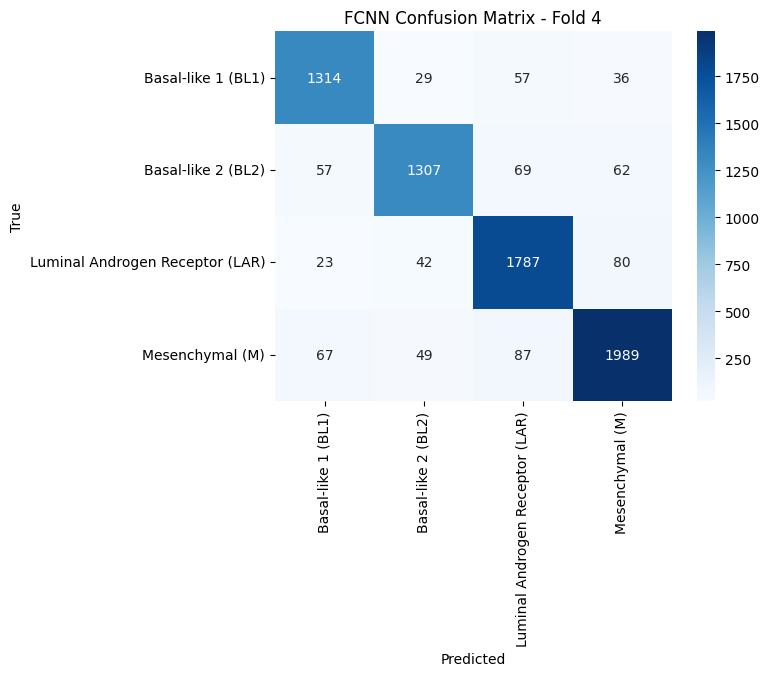


Multi-Class AUC (Fold 4): 0.9891


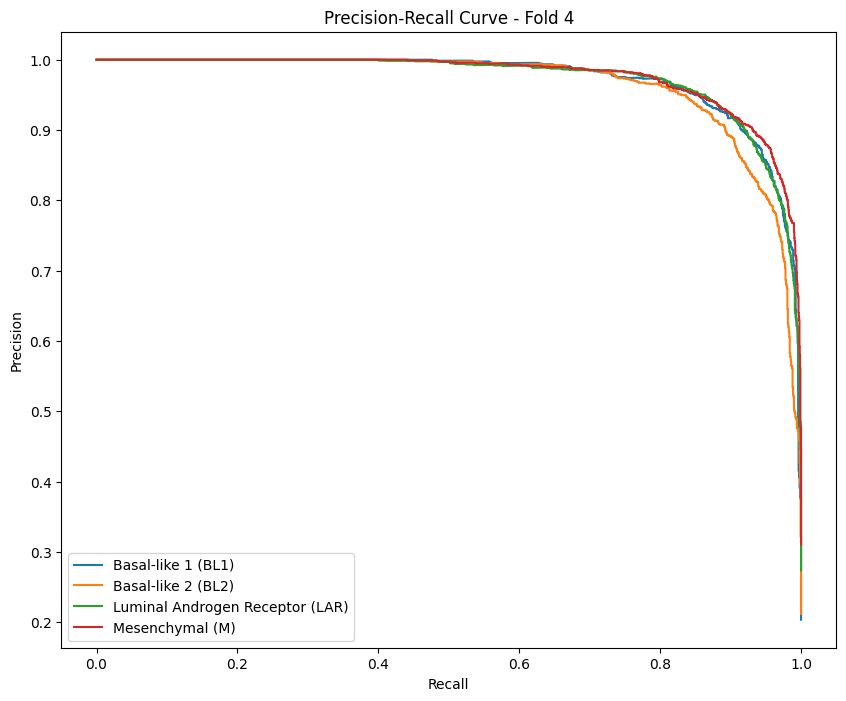


===== Fold 5 =====

Best Hyperparameters for Fold 5:
{'units_1': 384, 'dropout_1': 0.30000000000000004, 'units_2': 192, 'dropout_2': 0.30000000000000004, 'units_3': 96, 'dropout_3': 0.4, 'units_4': 32, 'dropout_4': 0.30000000000000004, 'learning_rate': 0.00019714784924358087}
Epoch 1/250


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


56/56 ━━━━━━━━━━━━━━━━━━━━ 11s 87ms/step - accuracy: 0.3517 - loss: 2.2520 - val_accuracy: 0.6193 - val_loss: 1.6595 - learning_rate: 1.9715e-04
Epoch 2/250
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5657 - loss: 1.6617 - val_accuracy: 0.7198 - val_loss: 1.4051 - learning_rate: 1.9715e-04
Epoch 3/250
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6647 - loss: 1.4483 - val_accuracy: 0.7813 - val_loss: 1.1944 - learning_rate: 1.9715e-04
Epoch 4/250
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7274 - loss: 1.2985 - val_accuracy: 0.8126 - val_loss: 1.0589 - learning_rate: 1.9715e-04
Epoch 5/250
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7500 - loss: 1.2337 - val_accuracy: 0.8261 - val_loss: 0.9904 - learning_rate: 1.9715e-04
Epoch 6/250
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7772 - loss: 1.1660 - val_accuracy: 0.8364 - val_loss: 0.9524 - learning_rate: 1.9715e-04
Epoch 7/250
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7926 - loss: 1.

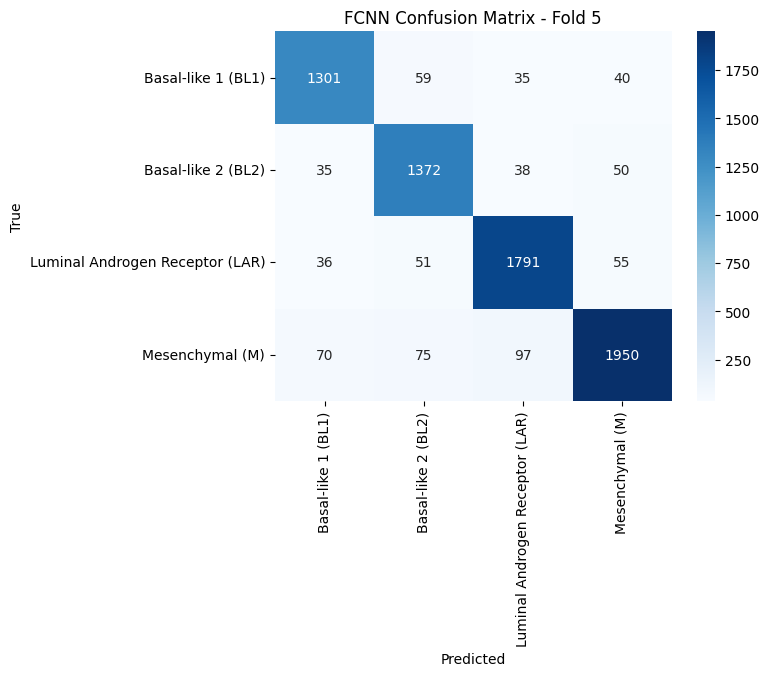


Multi-Class AUC (Fold 5): 0.9891


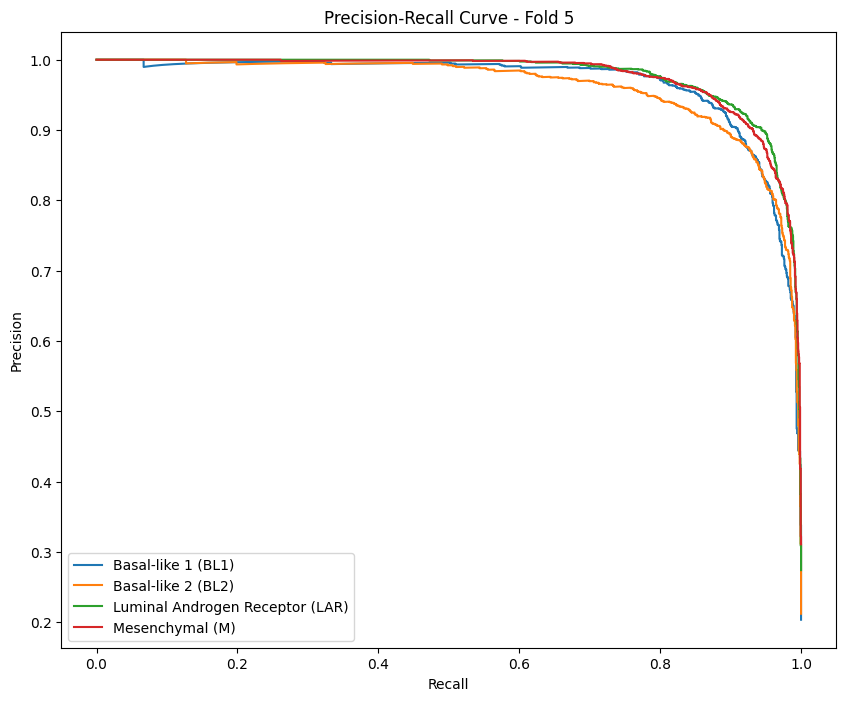


===== Cross-Validation Results =====
   fold  accuracy  auc_score
0     1  0.914116   0.990592
1     2  0.907300   0.988825
2     3  0.909568   0.989847
3     4  0.907016   0.989110
4     5  0.909993   0.989125

Mean Accuracy: 0.9096
Mean AUC Score: 0.9895


In [ ]:
# ======================= Load and Preprocess Data =======================
# Encode Target Variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df_metabolites["TNBC_Subtype"])  # Encode TNBC subtypes
X = df_metabolites.drop(columns=["TNBC_Subtype"]).values  # Keep only metabolite features

# Standardize the Features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Stratified K-Fold Cross Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = []

# ======================= Build  Model Function =======================
def build_model(hp):
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(X.shape[1],)),

        # First Dense Layer
        tf.keras.layers.Dense(hp.Int('units_1', 128, 512, step=64),
                              activation='relu',
                              kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(hp.Float('dropout_1', 0.2, 0.5, step=0.1)),

        # Second Dense Layer
        tf.keras.layers.Dense(hp.Int('units_2', 64, 256, step=64),
                              activation='relu',
                              kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(hp.Float('dropout_2', 0.2, 0.5, step=0.1)),

        # Third Dense Layer
        tf.keras.layers.Dense(hp.Int('units_3', 32, 128, step=32),
                              activation='relu',
                              kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(hp.Float('dropout_3', 0.2, 0.5, step=0.1)),

        # Fourth Dense Layer
        tf.keras.layers.Dense(hp.Int('units_4', 16, 64, step=16),
                              activation='relu',
                              kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(hp.Float('dropout_4', 0.1, 0.4, step=0.1)),

        # Output Layer
        tf.keras.layers.Dense(len(np.unique(y)), activation='softmax')
    ])

    optimizer = tf.keras.optimizers.Adam(learning_rate=hp.Float("learning_rate", 1e-4, 5e-3, sampling='LOG'))

    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# ======================= Hyperparameter Tuning =======================
tuner = kt.BayesianOptimization(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=3,
    directory='tuner_results',
    project_name='TNBC_hyperparam_tuning'
)

# ======================= Train and Evaluate Using K-Fold =======================
fold = 1
for train_index, test_index in skf.split(X, y):
    print(f"\n===== Fold {fold} =====")
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Data Augmentation: Add slight Gaussian noise for better generalization
    noise_factor = 0.01
    X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)

    # Hyperparameter tuning
    tuner.search(X_train_noisy, y_train,
                 epochs=250,
                 validation_data=(X_test, y_test),
                 batch_size=512)

    # Get best hyperparameters
    best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
    print(f"\nBest Hyperparameters for Fold {fold}:\n{best_hps.values}")

    # Build model with best hyperparameters
    model = tuner.hypermodel.build(best_hps)

    # Callbacks (Early Stopping + Learning Rate Scheduler)
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=15,
        restore_best_weights=True
    )


    lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=7,
        min_lr=1e-6
    )

    # Train model
    history = model.fit(
        X_train_noisy, y_train,
        epochs=250,
        batch_size=512,
        validation_data=(X_test, y_test),
        callbacks=[early_stopping, lr_scheduler]
    )

    # Predictions
    y_pred = np.argmax(model.predict(X_test), axis=1)
    y_pred_proba = model.predict(X_test)

    # ======================= Metrics =======================
    report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
    print("\nClassification Report:\n", report)

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f"FCNN Confusion Matrix - Fold {fold}")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # ROC-AUC Score
    y_test_one_hot = tf.keras.utils.to_categorical(y_test, num_classes=len(label_encoder.classes_))
    auc_score = roc_auc_score(y_test_one_hot, y_pred_proba, multi_class='ovr')
    print(f"\nMulti-Class AUC (Fold {fold}): {auc_score:.4f}")

    # Precision-Recall Curve
    plt.figure(figsize=(10, 8))
    for i in range(len(label_encoder.classes_)):
        precision, recall, _ = precision_recall_curve(y_test_one_hot[:, i], y_pred_proba[:, i])
        plt.plot(recall, precision, label=f"{label_encoder.classes_[i]}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall Curve - Fold {fold}")
    plt.legend()
    plt.show()

    # Save results
    results.append({
        'fold': fold,
        'accuracy': history.history['val_accuracy'][-1],
        'auc_score': auc_score
    })

    fold += 1

# ======================= Overall Results =======================
df_results = pd.DataFrame(results)
print("\n===== Cross-Validation Results =====")
print(df_results)
print(f"\nMean Accuracy: {df_results['accuracy'].mean():.4f}")
print(f"Mean AUC Score: {df_results['auc_score'].mean():.4f}")


In [ ]:
best_fold = df_results.loc[df_results['accuracy'].idxmax()]
print(f"\n🎯 Best Fold (Fold {int(best_fold['fold'])}) Accuracy: {best_fold['accuracy']:.4f}")
print(f"🎯 Best Fold AUC Score: {best_fold['auc_score']:.4f}")


NameError: name 'df_results' is not defined

Trial 15 Complete [00h 05m 35s]
val_accuracy: 0.9091081023216248

Best val_accuracy So Far: 0.9107615351676941
Total elapsed time: 01h 17m 49s

Best Hyperparameters for Fold 1:
{'units_1': 224, 'dropout_1': 0.2, 'units_2': 128, 'dropout_2': 0.2, 'units_3': 64, 'dropout_3': 0.5, 'learning_rate': 0.0004010402068654687}
Epoch 1/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.4169 - loss: 5.1114 - val_accuracy: 0.7285 - val_loss: 4.2163 - learning_rate: 4.0104e-04
Epoch 2/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6854 - loss: 4.0664 - val_accuracy: 0.8030 - val_loss: 3.6524 - learning_rate: 4.0104e-04
Epoch 3/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7613 - loss: 3.5732 - val_accuracy: 0.8329 - val_loss: 3.1881 - learning_rate: 4.0104e-04
Epoch 4/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7913 - loss: 3.1769 - val_accuracy: 0.8468 - val_loss: 2.8121 - learning_rate: 4.0104e-04
Epoch 5/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - acc

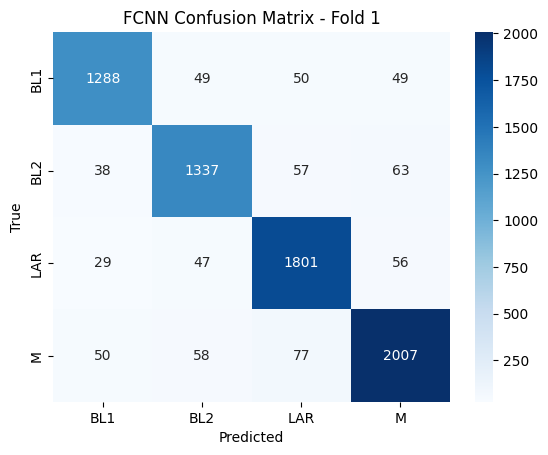


Multi-Class AUC (Fold 1): 0.9898


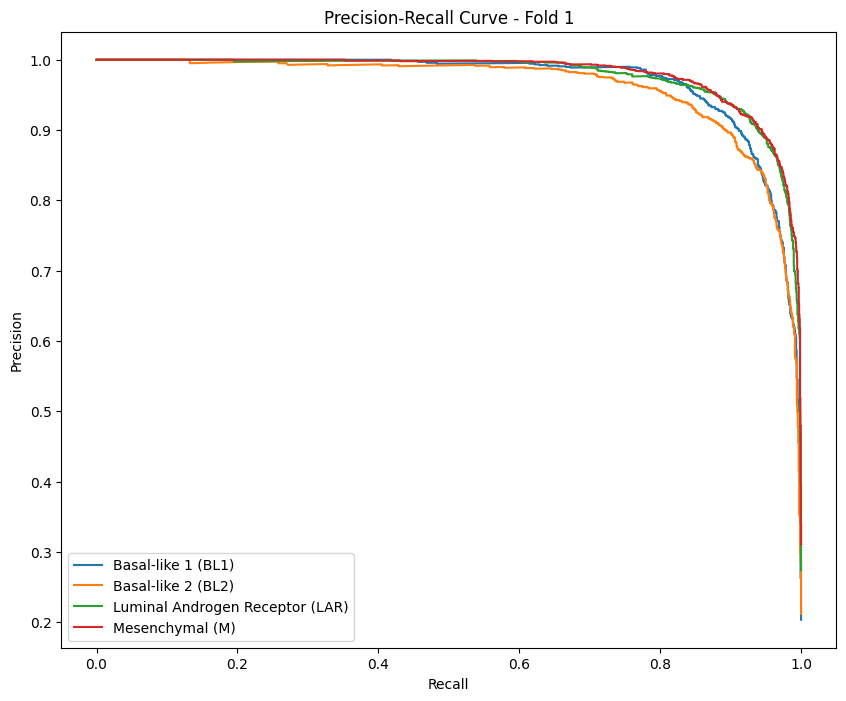

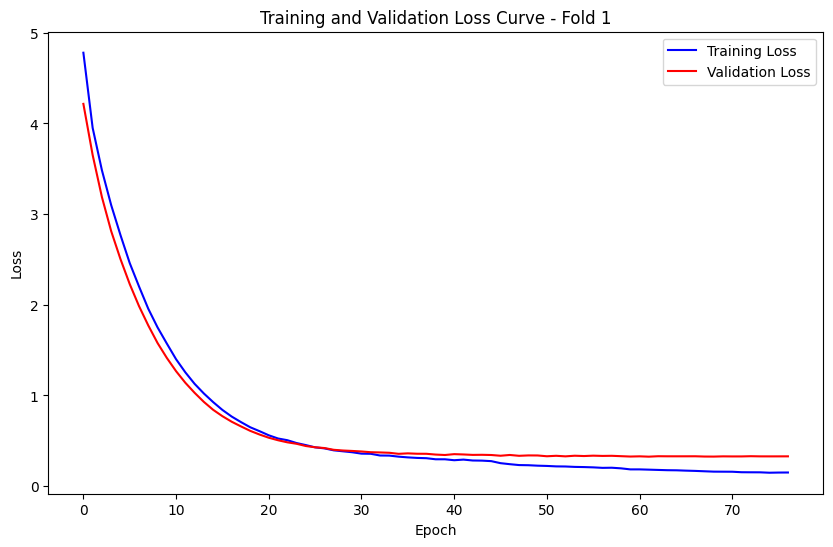

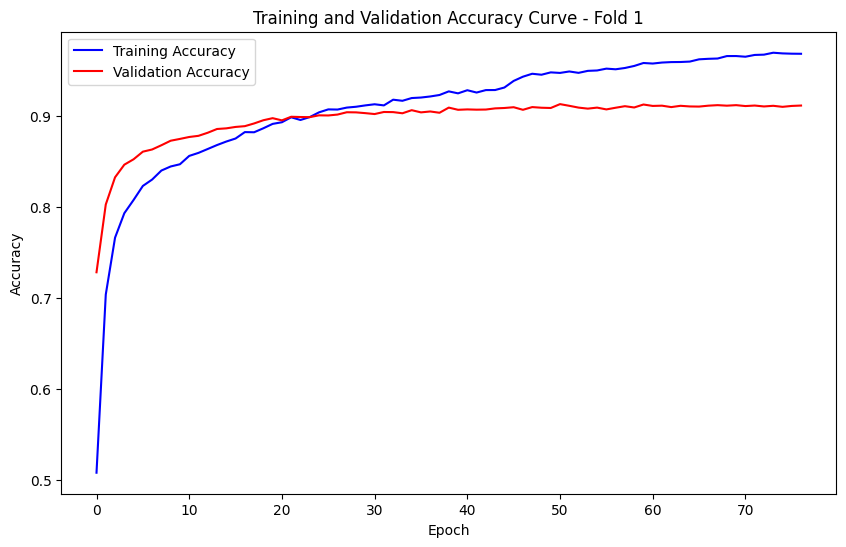


===== Fold 2 =====

Best Hyperparameters for Fold 2:
{'units_1': 224, 'dropout_1': 0.2, 'units_2': 128, 'dropout_2': 0.2, 'units_3': 64, 'dropout_3': 0.5, 'learning_rate': 0.0004010402068654687}
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.3886 - loss: 5.3044 - val_accuracy: 0.6909 - val_loss: 4.3015 - learning_rate: 4.0104e-04
Epoch 2/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6924 - loss: 4.1212 - val_accuracy: 0.7780 - val_loss: 3.7191 - learning_rate: 4.0104e-04
Epoch 3/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7537 - loss: 3.6291 - val_accuracy: 0.8157 - val_loss: 3.2467 - learning_rate: 4.0104e-04
Epoch 4/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7895 - loss: 3.2343 - val_accuracy: 0.8343 - val_loss: 2.8614 - learning_rate: 4.0104e-04
Epoch 5/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.8074 - loss: 2.8703 - val_accuracy: 0.8479 - val_loss: 2.5380 - learning_rate: 4.0104e-04
Epoch 6/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.8219 - loss: 2.5600 - val_accuracy: 0.8567 - val_loss: 2.2578 - learning_rate: 4.0104e-04
Epoch 7/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8304 - los

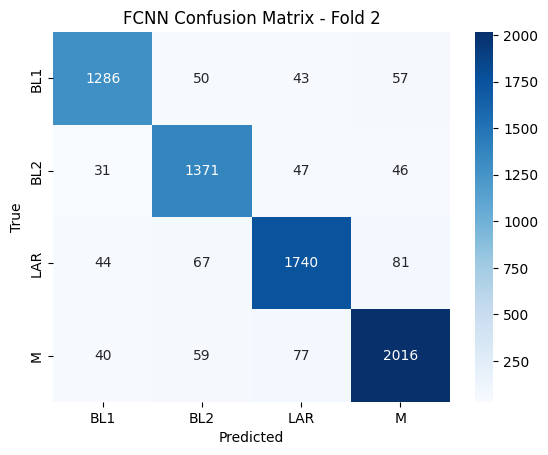


Multi-Class AUC (Fold 2): 0.9881


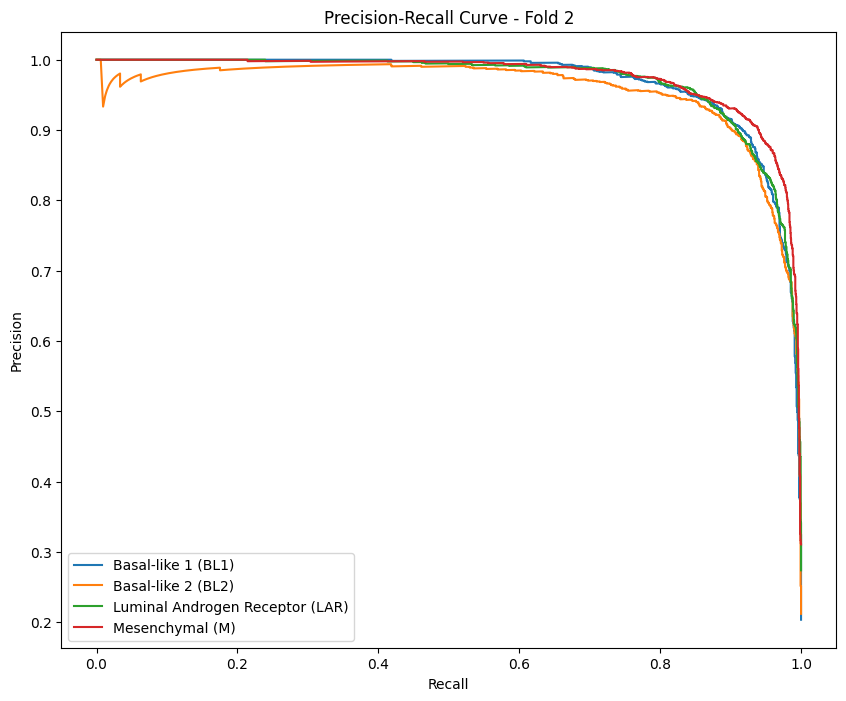

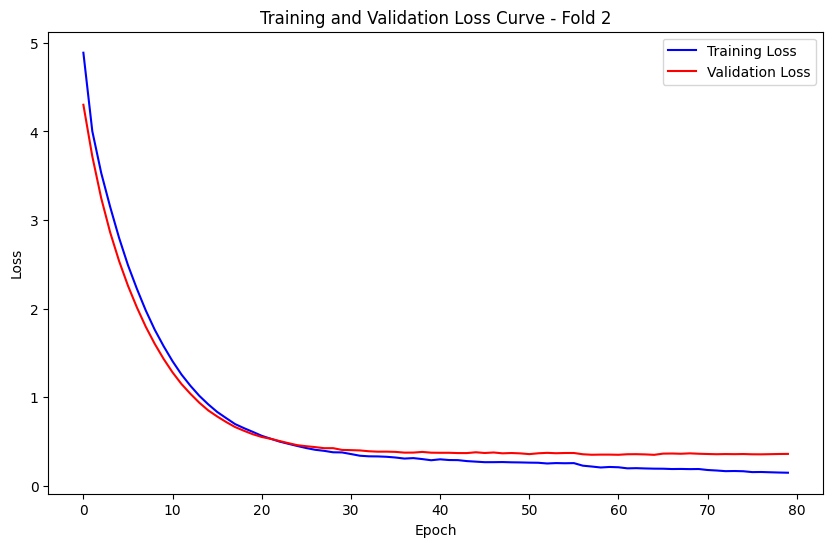

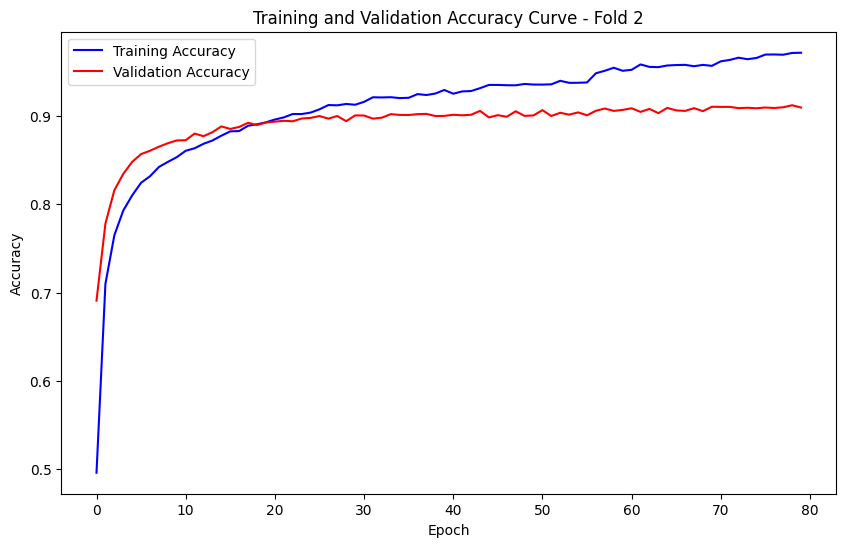


===== Fold 3 =====

Best Hyperparameters for Fold 3:
{'units_1': 224, 'dropout_1': 0.2, 'units_2': 128, 'dropout_2': 0.2, 'units_3': 64, 'dropout_3': 0.5, 'learning_rate': 0.0004010402068654687}
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.4111 - loss: 5.1207 - val_accuracy: 0.7565 - val_loss: 4.2253 - learning_rate: 4.0104e-04
Epoch 2/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.6944 - loss: 4.0511 - val_accuracy: 0.8126 - val_loss: 3.6411 - learning_rate: 4.0104e-04
Epoch 3/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7555 - loss: 3.5648 - val_accuracy: 0.8369 - val_loss: 3.1669 - learning_rate: 4.0104e-04
Epoch 4/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7890 - loss: 3.1531 - val_accuracy: 0.8496 - val_loss: 2.7843 - learning_rate: 4.0104e-04
Epoch 5/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8093 - loss: 2.8064 - val_accuracy: 0.8575 - val_loss: 2.4649 - learning_rate: 4.0104e-04
Epoch 6/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8213 - loss: 2.4901 - val_accuracy: 0.8621 - val_loss: 2.1890 - learning_rate: 4.0104e-04
Epoch 7/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8308 - los

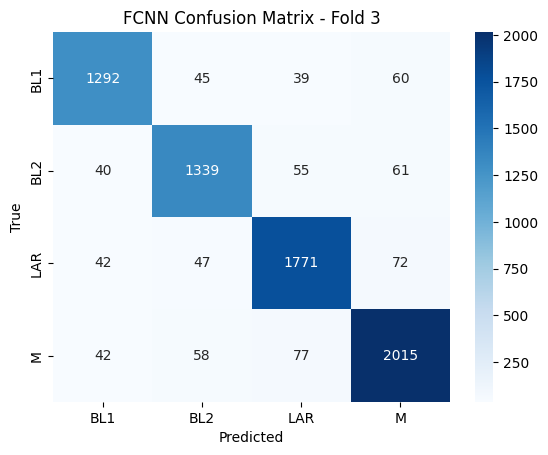


Multi-Class AUC (Fold 3): 0.9893


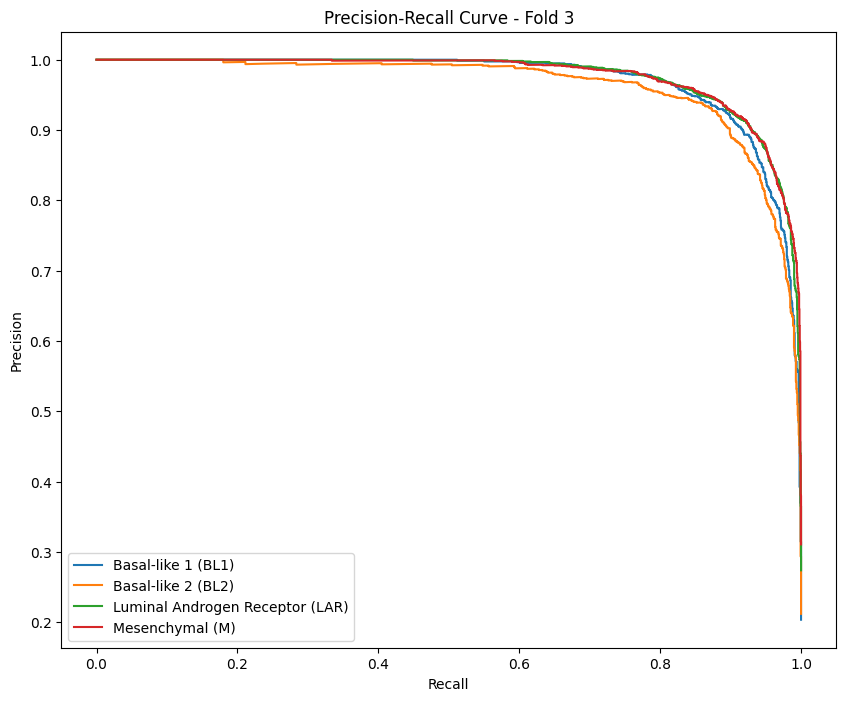

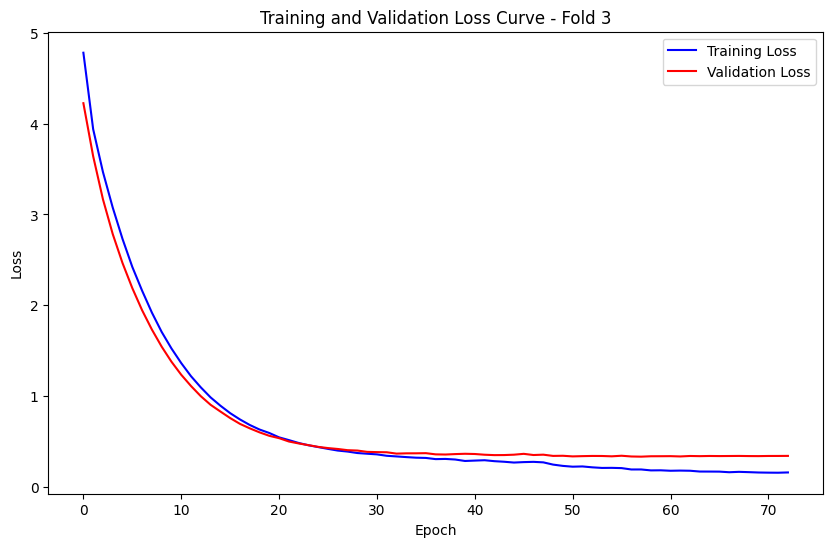

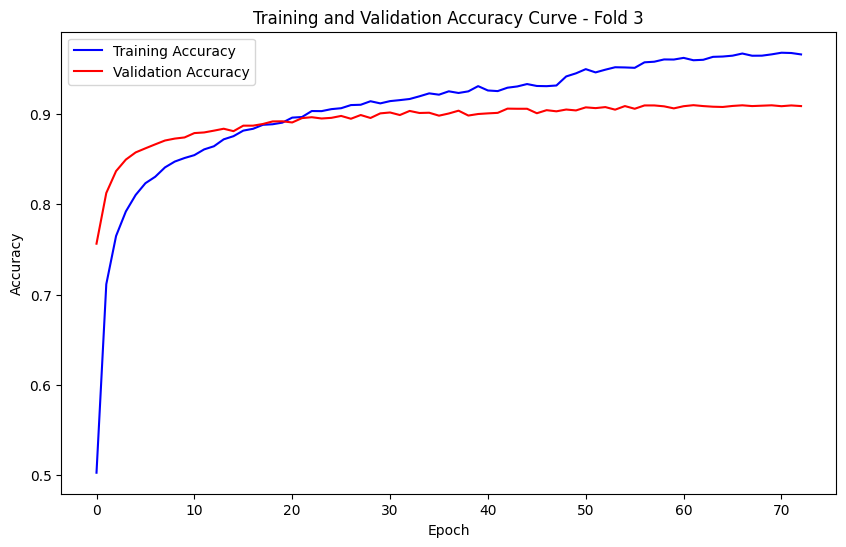


===== Fold 4 =====

Best Hyperparameters for Fold 4:
{'units_1': 224, 'dropout_1': 0.2, 'units_2': 128, 'dropout_2': 0.2, 'units_3': 64, 'dropout_3': 0.5, 'learning_rate': 0.0004010402068654687}
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.4204 - loss: 5.0384 - val_accuracy: 0.7128 - val_loss: 4.1792 - learning_rate: 4.0104e-04
Epoch 2/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.6927 - loss: 3.9671 - val_accuracy: 0.7977 - val_loss: 3.5767 - learning_rate: 4.0104e-04
Epoch 3/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7621 - loss: 3.4684 - val_accuracy: 0.8285 - val_loss: 3.0917 - learning_rate: 4.0104e-04
Epoch 4/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7940 - loss: 3.0332 - val_accuracy: 0.8410 - val_loss: 2.7061 - learning_rate: 4.0104e-04
Epoch 5/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8201 - loss: 2.6770 - val_accuracy: 0.8532 - val_loss: 2.3777 - learning_rate: 4.0104e-04
Epoch 6/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8316 - loss: 2.3651 - val_accuracy: 0.8577 - val_loss: 2.1015 - learning_rate: 4.0104e-04
Epoch 7/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8376 - los

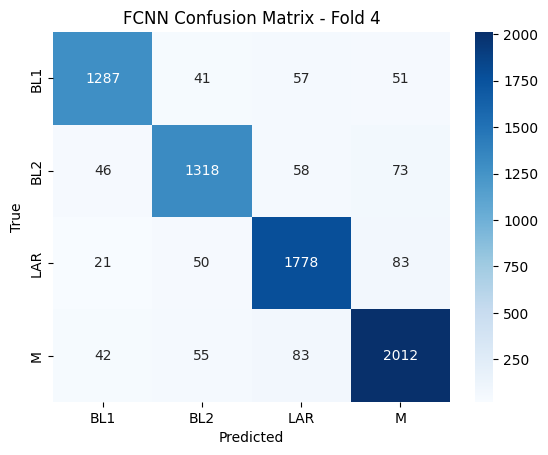


Multi-Class AUC (Fold 4): 0.9889


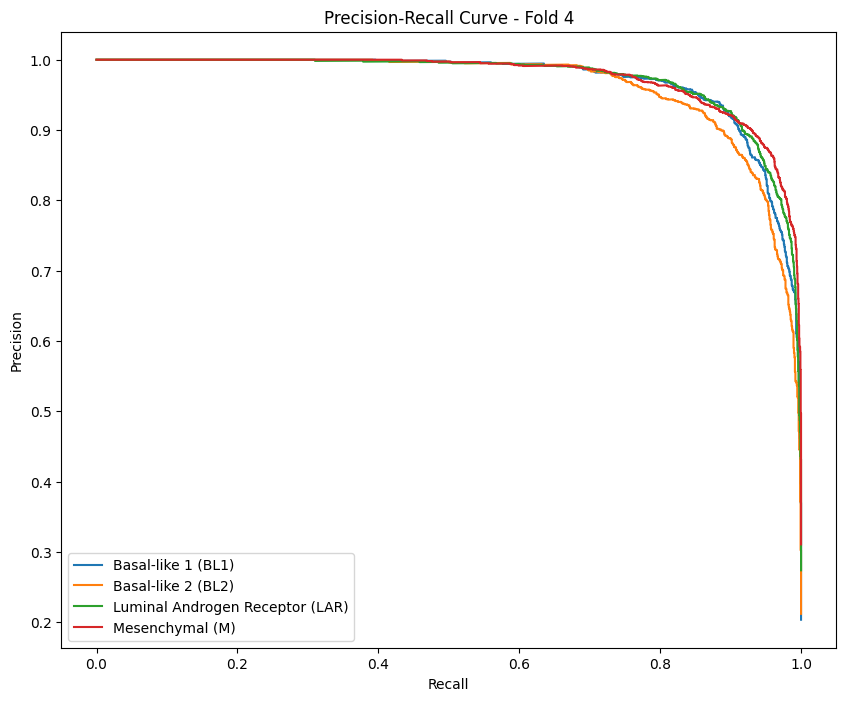

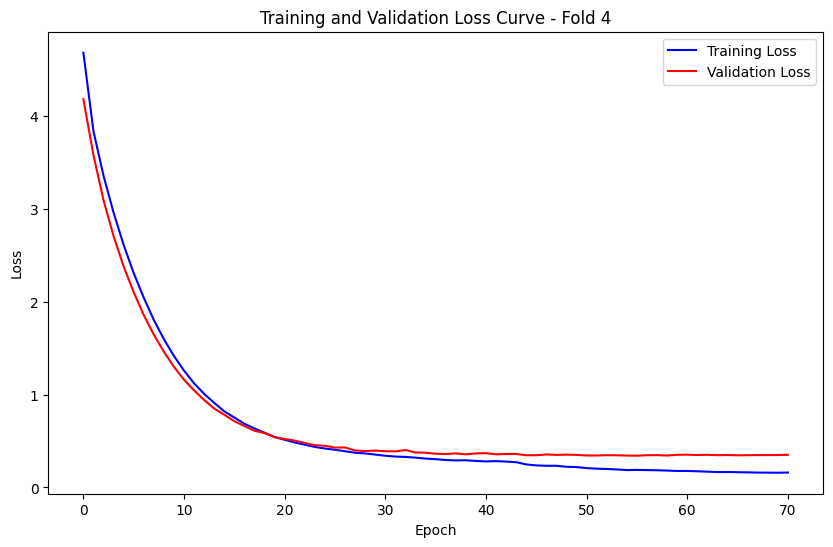

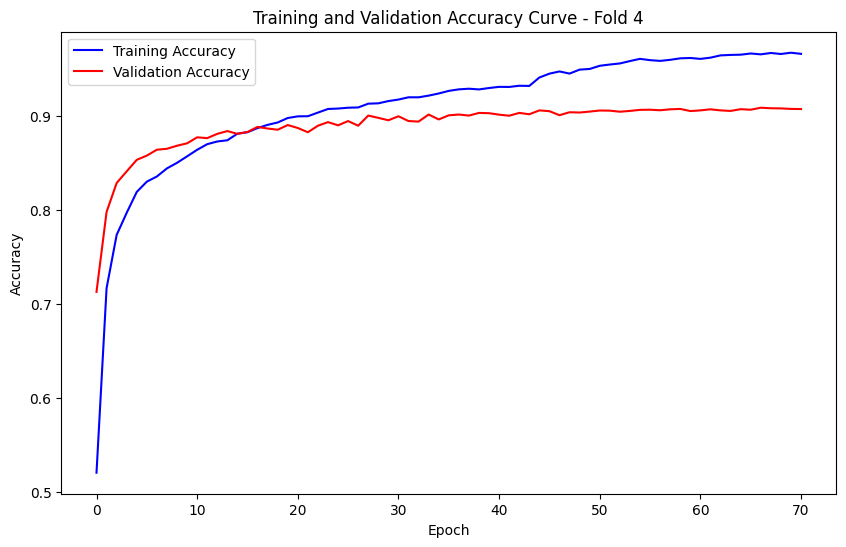


===== Fold 5 =====

Best Hyperparameters for Fold 5:
{'units_1': 224, 'dropout_1': 0.2, 'units_2': 128, 'dropout_2': 0.2, 'units_3': 64, 'dropout_3': 0.5, 'learning_rate': 0.0004010402068654687}
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.3867 - loss: 5.2445 - val_accuracy: 0.7178 - val_loss: 4.2776 - learning_rate: 4.0104e-04
Epoch 2/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6832 - loss: 4.1001 - val_accuracy: 0.7970 - val_loss: 3.6767 - learning_rate: 4.0104e-04
Epoch 3/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7571 - loss: 3.5841 - val_accuracy: 0.8218 - val_loss: 3.1924 - learning_rate: 4.0104e-04
Epoch 4/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7882 - loss: 3.1750 - val_accuracy: 0.8393 - val_loss: 2.8047 - learning_rate: 4.0104e-04
Epoch 5/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8107 - loss: 2.8112 - val_accuracy: 0.8505 - val_loss: 2.4799 - learning_rate: 4.0104e-04
Epoch 6/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8225 - loss: 2.5044 - val_accuracy: 0.8561 - val_loss: 2.1992 - learning_rate: 4.0104e-04
Epoch 7/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8342 - los

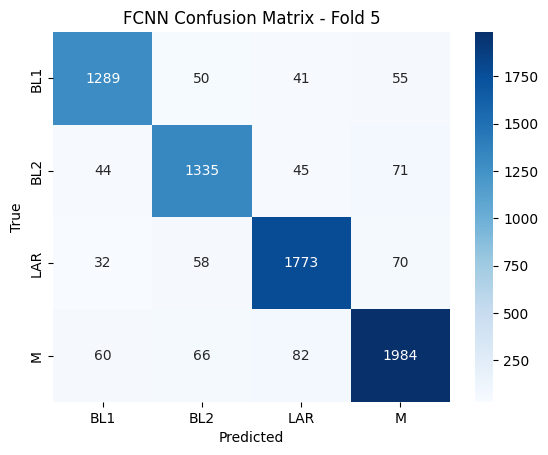


Multi-Class AUC (Fold 5): 0.9880


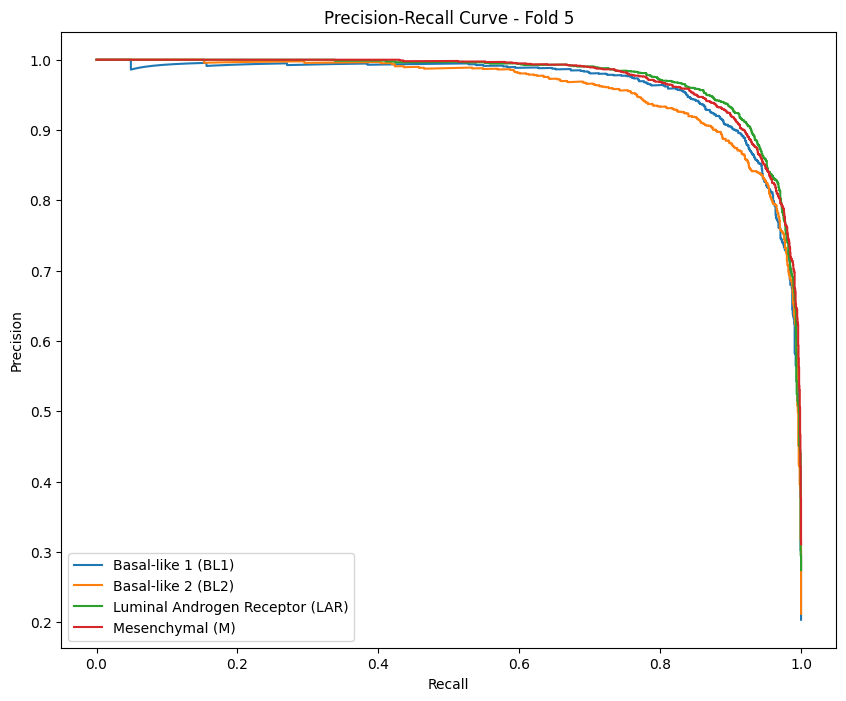

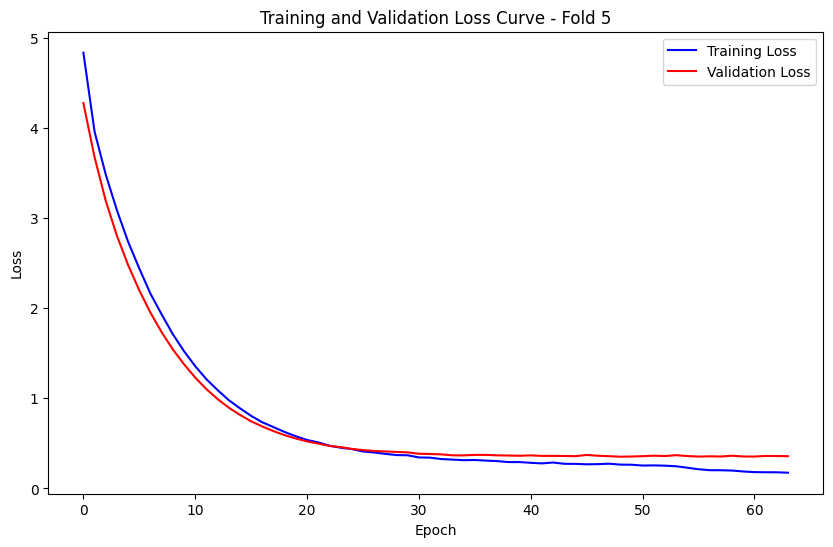

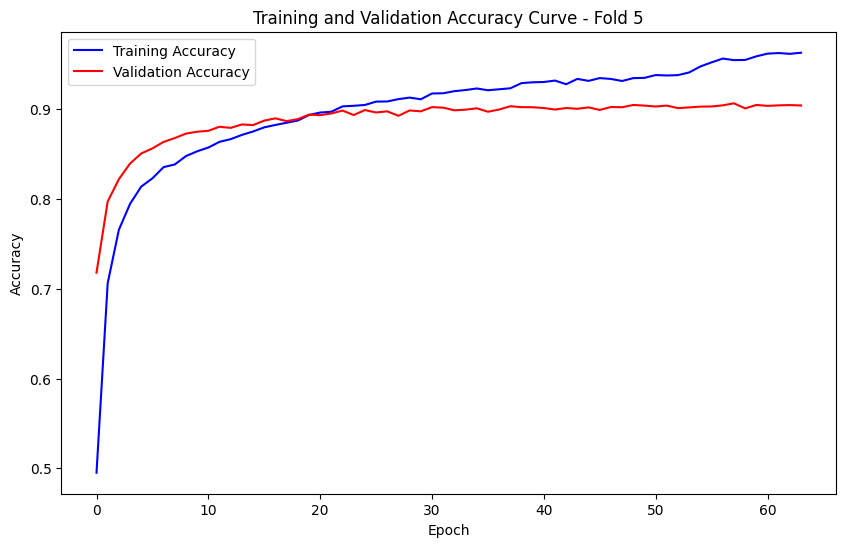


===== Cross-Validation Results =====
   fold  accuracy  auc_score
0     1  0.911848   0.989783
1     2  0.909426   0.988080
2     3  0.908859   0.989331
3     4  0.907158   0.988900
4     5  0.903898   0.988021

Mean Accuracy: 0.9082
Mean AUC Score: 0.9888

🎯 Best Fold (Fold 1) Accuracy: 0.9118
🎯 Best Fold AUC Score: 0.9898


In [ ]:

# ======================= Encode Target Variable =======================
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df_metabolites["TNBC_Subtype"])  # Encode TNBC subtypes
X = df_metabolites.drop(columns=["TNBC_Subtype"]).values  # Keep only metabolite features

# ======================= Standardize Features =======================
scaler = StandardScaler()
X = scaler.fit_transform(X)

# ======================= Stratified K-Fold =======================
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = []

# ======================= Build Model Function =======================
def build_model(hp):
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(X.shape[1],)),

        # First Dense Layer
        tf.keras.layers.Dense(hp.Int('units_1', min_value=64, max_value=256, step=32),
                              activation='relu',
                              kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(hp.Float('dropout_1', 0.1, 0.5, step=0.1)),

        # Second Dense Layer
        tf.keras.layers.Dense(hp.Int('units_2', min_value=32, max_value=128, step=32),
                              activation='relu',
                              kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(hp.Float('dropout_2', 0.1, 0.5, step=0.1)),

        # Third Dense Layer
        tf.keras.layers.Dense(hp.Int('units_3', min_value=16, max_value=64, step=16),
                              activation='relu',
                              kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(hp.Float('dropout_3', 0.1, 0.5, step=0.1)),

        # Output Layer
        tf.keras.layers.Dense(len(np.unique(y)), activation='softmax')
    ])

    optimizer = tf.keras.optimizers.Adam(learning_rate=hp.Float("learning_rate", 1e-4, 1e-2, sampling='LOG'))

    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# ======================= Hyperparameter Tuning =======================
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=15,
    executions_per_trial=3,
    directory='tuner_results',
    project_name='TNBC_hyperparam_tuning'
)

# ======================= Train and Evaluate Using K-Fold =======================
fold = 1
for train_index, test_index in skf.split(X, y):
    print(f"\n===== Fold {fold} =====")
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Hyperparameter tuning
    tuner.search(X_train, y_train,
                 epochs=100,
                 validation_data=(X_test, y_test),
                 batch_size=512)

    # Get best hyperparameters
    best_hps = tuner.get_best_hyperparameters(num_trials=3)[0]
    print(f"\nBest Hyperparameters for Fold {fold}:\n{best_hps.values}")

    # Build model with best hyperparameters
    model = tuner.hypermodel.build(best_hps)

    # ===========Callbacks (Early Stopping + Learning Rate Scheduler)===========
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=15,
        restore_best_weights=True
    )

    lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=1e-5
    )

    # ===========Train model===============
    history = model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=512,
        validation_data=(X_test, y_test),
        callbacks=[early_stopping, lr_scheduler]
    )

    # Predictions
    y_pred = np.argmax(model.predict(X_test), axis=1)
    y_pred_proba = model.predict(X_test)

    # ======================= Metrics =======================
    report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
    print("\nClassification Report:\n", report)

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["BL1", "BL2", "LAR", "M"], yticklabels=["BL1", "BL2", "LAR", "M"])
    plt.title(f"FCNN Confusion Matrix - Fold {fold}")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


    # ===========ROC-AUC Score===========
    y_test_one_hot = tf.keras.utils.to_categorical(y_test, num_classes=len(label_encoder.classes_))
    auc_score = roc_auc_score(y_test_one_hot, y_pred_proba, multi_class='ovr')
    print(f"\nMulti-Class AUC (Fold {fold}): {auc_score:.4f}")

    # ===========Precision-Recall Curve===========
    plt.figure(figsize=(10, 8))
    for i in range(len(label_encoder.classes_)):
        precision, recall, _ = precision_recall_curve(y_test_one_hot[:, i], y_pred_proba[:, i])
        plt.plot(recall, precision, label=f"{label_encoder.classes_[i]}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall Curve - Fold {fold}")
    plt.legend()
    plt.show()

    # ===========Loss and Accuracy Curves===========
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss', color='blue')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
    plt.title(f"Training and Validation Loss Curve - Fold {fold}")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
    plt.title(f"Training and Validation Accuracy Curve - Fold {fold}")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

    # Save results
    results.append({
        'fold': fold,
        'accuracy': history.history['val_accuracy'][-1],
        'auc_score': auc_score
    })

    fold += 1

# ======================= Overall Results =======================
df_results = pd.DataFrame(results)
print("\n===== Cross-Validation Results =====")
print(df_results)
print(f"\nMean Accuracy: {df_results['accuracy'].mean():.4f}")
print(f"Mean AUC Score: {df_results['auc_score'].mean():.4f}")

best_fold = df_results.loc[df_results['accuracy'].idxmax()]
print(f"\n🎯 Best Fold (Fold {int(best_fold['fold'])}) Accuracy: {best_fold['accuracy']:.4f}")
print(f"🎯 Best Fold AUC Score: {best_fold['auc_score']:.4f}")

In [ ]:
print(X_test.shape)

(7055, 69)


## ==========SHAP Summary and Feature Importance for Multi-Class Classification======
By analyzing both the overall SHAP summary and the class-specific SHAP summaries, we will gain deeper biological insights into which metabolites drive the classification of each TNBC subtype ('Basal-like 1 (BL1)','Mesenchymal (M)','Basal-like 2 (BL2)','Luminal Androgen Receptor (LAR). This will help you interpret:

✅ Overall drivers → Which metabolites are most important for predicting TNBC subtypes as a whole.
✅ Subtype-specific drivers → Which metabolites are driving predictions for each specific subtype.
✅ Direction of effect → Whether a metabolite increases or decreases the likelihood of a specific subtype (positive vs negative SHAP values).

PermutationExplainer explainer: 7056it [31:40,  3.70it/s]


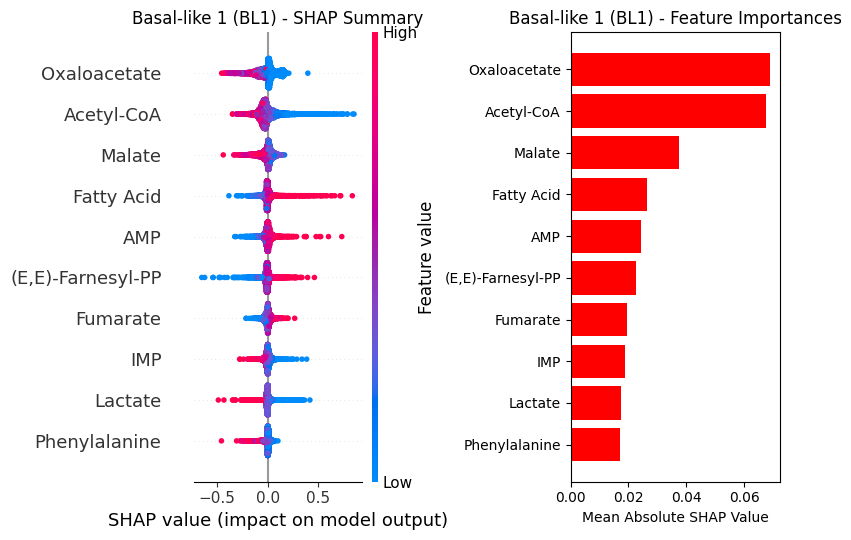


Feature Importances for Basal-like 1 (BL1):
Oxaloacetate         0.068913
Acetyl-CoA           0.067529
Malate               0.037476
Fatty Acid           0.026389
AMP                  0.024223
(E,E)-Farnesyl-PP    0.022716
Fumarate             0.019561
IMP                  0.018843
Lactate              0.017316
Phenylalanine        0.016933
dtype: float64


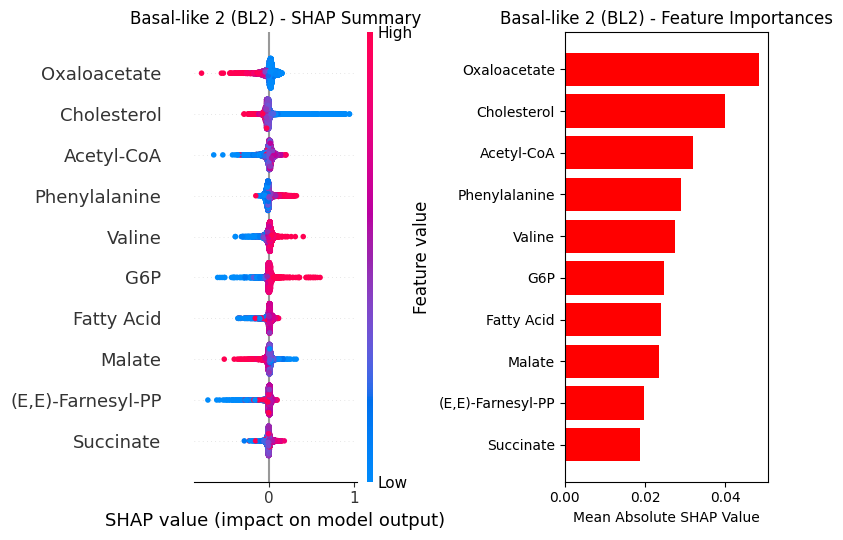


Feature Importances for Basal-like 2 (BL2):
Oxaloacetate         0.048312
Cholesterol          0.039957
Acetyl-CoA           0.032020
Phenylalanine        0.029067
Valine               0.027544
G6P                  0.024727
Fatty Acid           0.024086
Malate               0.023525
(E,E)-Farnesyl-PP    0.019860
Succinate            0.018803
dtype: float64


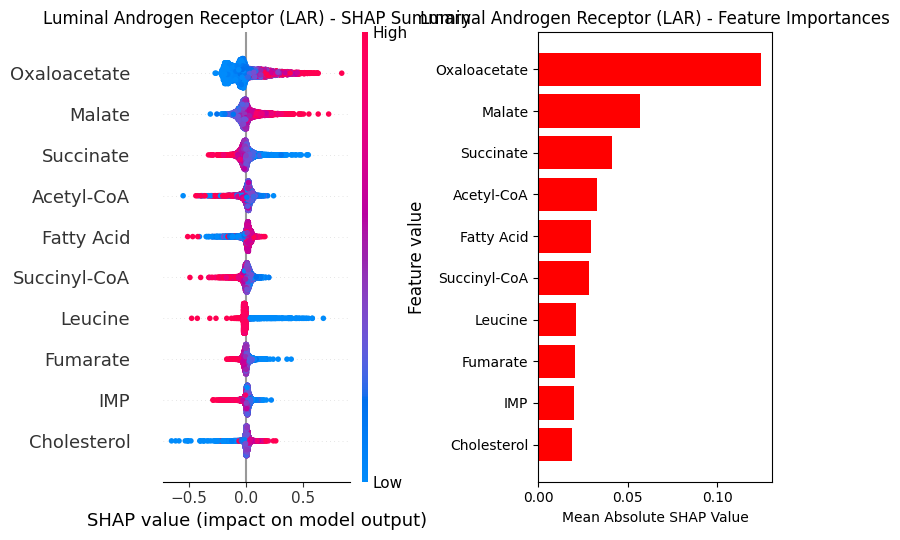


Feature Importances for Luminal Androgen Receptor (LAR):
Oxaloacetate    0.124599
Malate          0.056827
Succinate       0.041400
Acetyl-CoA      0.032881
Fatty Acid      0.029543
Succinyl-CoA    0.028516
Leucine         0.020994
Fumarate        0.020315
IMP             0.020129
Cholesterol     0.018942
dtype: float64


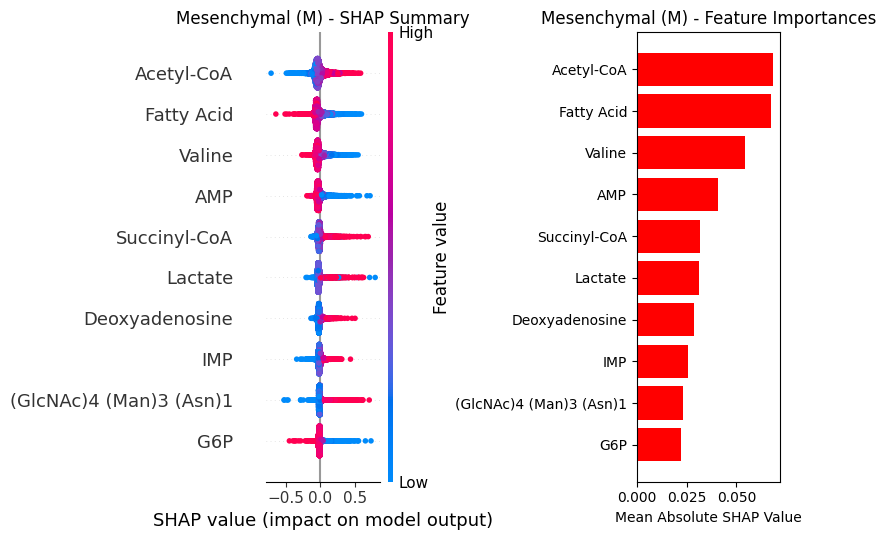


Feature Importances for Mesenchymal (M):
Acetyl-CoA                 0.068459
Fatty Acid                 0.067159
Valine                     0.054525
AMP                        0.040978
Succinyl-CoA               0.031669
Lactate                    0.031110
Deoxyadenosine             0.028465
IMP                        0.025490
(GlcNAc)4 (Man)3 (Asn)1    0.023020
G6P                        0.022126
dtype: float64


In [ ]:
#====================== Create SHAP Explainer ======================
explainer = shap.Explainer(model, X_test)
shap_values = explainer(X_test)

# Get feature names
feature_names = df_metabolites.drop(columns=["TNBC_Subtype"]).columns

# ====================== Plot SHAP Summary and Feature Importance Side-by-Side ======================
for i, class_name in enumerate(label_encoder.classes_):
    fig, axes = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'width_ratios': [1, 1]})

    # ✅ SHAP Summary Plot (on the left)
    plt.sca(axes[0])
    shap.summary_plot(
        shap_values.values[:, :, i],
        X_test,
        feature_names=feature_names,
        max_display=10,
        show=False
    )
    axes[0].set_title(f"{class_name} - SHAP Summary")

    # ✅ Feature Importance Plot (on the right)
    class_importance = np.abs(shap_values.values[:, :, i]).mean(axis=0)
    top_features = pd.Series(class_importance, index=feature_names).nlargest(10)

    axes[1].barh(
        y=top_features.index[::-1],  # Reverse order for better visualization
        width=top_features.values[::-1],
        color='red'
    )
    axes[1].set_title(f"{class_name} - Feature Importances")
    axes[1].set_xlabel("Mean Absolute SHAP Value")

    plt.tight_layout()
    plt.show()

    # ✅ Print Top 10 Features
    print(f"\nFeature Importances for {class_name}:")
    print(top_features)



In [ ]:
# ===================== Compute Overall Feature Importance =======================
# Mean absolute SHAP values across samples and classes → shape: (num_features,)
overall_importance = np.abs(shap_values.values).mean(axis=(0, 2))

# Create Series of importance with feature names
overall_importance_series = pd.Series(overall_importance, index=feature_names)
top_overall_features = overall_importance_series.nlargest(10)
top_feature_names = top_overall_features.index.tolist()

# Get indices of top features
top_indices = [list(feature_names).index(f) for f in top_feature_names]

# Slice SHAP values and X_test for top 10 features
shap_top_values = shap_values.values[:, top_indices, :].mean(axis=2)  # shape: (samples, top_features)
X_test_top = pd.DataFrame(X_test[:, top_indices], columns=top_feature_names)

# ===================== Plot Side-by-Side =======================
fig, axes = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'width_ratios': [1, 1]})

# ✅ Left: SHAP Summary Plot
plt.sca(axes[0])
shap.summary_plot(
    shap_top_values,
    X_test_top,
    feature_names=top_feature_names,
    max_display=10,
    show=False
)
axes[0].set_title("SHAP Summary (Top 10 Metabolites)", fontsize=14)

# ✅ Right: Feature Importance Bar Plot (Red Color)
axes[1].barh(
    y=top_overall_features.index[::-1],
    width=top_overall_features.values[::-1],
    color='red'  # 🔴 Changed to red
)
axes[1].set_title("Feature Importance (Top 10 Metabolites)", fontsize=14)
axes[1].set_xlabel("Mean Absolute SHAP Value")
axes[1].set_ylabel("Metabolite")

plt.tight_layout()
plt.show()

# ✅ Print Top 10 Metabolites
print("\nOverall Top 10 Metabolites Driving TNBC Subtype Predictions:")
print(top_overall_features)


NameError: name 'np' is not defined

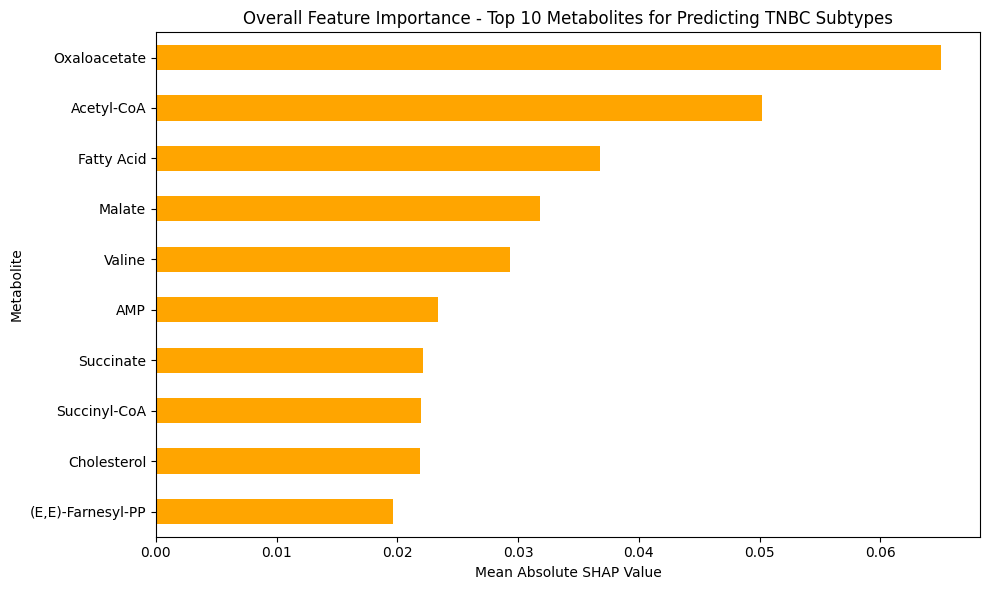

In [ ]:
# ===================== Compute Overall Feature Importance =======================
# Calculate mean absolute SHAP values for each feature across all classes and samples
overall_importance = np.abs(shap_values.values).mean(axis=(0, 2))  # axis 0=samples, axis 2=classes

# Create a Series with feature names and their corresponding mean absolute SHAP values
overall_importance_series = pd.Series(overall_importance, index=feature_names)

# Sort the features by their overall importance (descending order)
top_overall_features = overall_importance_series.nlargest(10)

# ===================== Plot Overall Feature Importance =======================
plt.figure(figsize=(10, 6))
top_overall_features.plot(kind='barh', color='orange')
plt.title('Overall Feature Importance - Top 10 Metabolites for Predicting TNBC Subtypes')
plt.xlabel('Mean Absolute SHAP Value')
plt.ylabel('Metabolite')
plt.gca().invert_yaxis()  # Reverse order for better visualization
plt.tight_layout()
plt.show()


Interactive SHAP Plot: Selecting Features
From your feature importance lists, the top features for each TNBC subtype (BL1, BL2, LAR, and M) vary slightly, but there are common metabolites like Acetyl-CoA, Oxaloacetate, Malate, Fatty Acid, and Valine that appear consistently. These are likely the most important features across the subtypes, so they would be ideal candidates for an interactive SHAP plot.

Why focus on these features for the interaction plot?
Top Features: As these features are most impactful in the model's predictions, understanding how their interactions influence the subtype classifications is crucial for deeper model interpretability.

Feature Relationships: Analyzing interactions between metabolites like Acetyl-CoA and Oxaloacetate, for example, could reveal how their combined presence (or absence) in the tumor microenvironment drives specific TNBC subtypes, influencing metabolic pathways that distinguish them.

Suggested Features for SHAP Interaction Plots
Based on your results, here are some potential pairings of top features from each subtype for interaction plots:

Acetyl-CoA and Oxaloacetate:

These two features appear prominently in BL1, BL2, LAR, and M subtypes. Their interaction might highlight how shifts in the TCA cycle and acetylation pathways influence TNBC subtypes.

Why interact? The relationship between Acetyl-CoA and Oxaloacetate could indicate key metabolic shifts influencing cellular processes like energy production and biosynthesis, which may vary across TNBC subtypes.

Fatty Acid and Malate:

Fatty Acid and Malate also appear in the top 5 for several subtypes, suggesting their central role in TNBC subtype classification.

Why interact? Fatty acid metabolism and malate's involvement in the TCA cycle might be connected to cell survival, proliferation, or metastasis in different TNBC subtypes, which warrants investigation.

Valine and Succinate:

Valine is essential in the protein metabolism and signaling pathways, while Succinate plays a role in energy metabolism.

Why interact? A potential interaction between these two metabolites may indicate an alteration in cellular metabolism related to anabolic and catabolic processes, which can impact tumor behavior differently across TNBC subtypes.

Cholesterol and Acetyl-CoA:

In BL2 and LAR, Cholesterol and Acetyl-CoA are important, potentially indicating lipogenesis and steroidogenesis.

Why interact? Understanding how cholesterol and acetylation pathways work together can shed light on cancer cell membrane stability, signal transduction, and metabolic reprogramming in these TNBC subtypes.

SHAP Interaction Plot Code Example
python
Copy
Edit
# Select top 2 features for interaction plot based on feature importance
feature1 = 'Acetyl-CoA'
feature2 = 'Oxaloacetate'

# Create SHAP interaction plot for these top features
shap.interaction_plot(feature1, feature2, shap_values, X_test)
You can create multiple interaction plots with different combinations of features based on importance and relevance.

Further Exploration for Thesis, Results, and Discussion:
Metabolic Pathways:

Explore the biological significance of the top features in known metabolic pathways.

Example: Acetyl-CoA, Malate, and Succinate are critical in the TCA cycle. Understanding how their variation across TNBC subtypes may affect cellular respiration and energy production could provide insights into metabolic reprogramming in cancer.

Correlation with Pathway Enrichment:

Examine how these features correlate with pathway enrichment analysis results.

Example: Investigate whether TNBC subtypes that have higher levels of Acetyl-CoA also show increased activity in specific metabolic pathways like fatty acid metabolism or glycolysis.

Feature Interactions in Subtypes:

Compare feature interactions across TNBC subtypes.

Example: Does the interaction between Acetyl-CoA and Fatty Acid lead to different subtype predictions compared to Acetyl-CoA and Valine? This could reflect distinct metabolic signatures that distinguish aggressive subtypes from less aggressive ones.

Impact on Tumor Behavior:

Dive into how metabolic shifts related to these features can drive tumor progression, treatment resistance, or metastasis.

Example: Explore whether the higher importance of Oxaloacetate in the LAR subtype is associated with energy production or therapeutic resistance.

Visualize Temporal Changes:

If possible, explore temporal changes in metabolite levels (from other datasets or longitudinal studies). Do the key features show time-dependent shifts that might explain the progression of different TNBC subtypes?

Clinical Implications:

Consider how these metabolites could be targeted for therapeutic purposes.

Example: Could Acetyl-CoA or Malate be targeted with drugs to slow down the growth of specific TNBC subtypes? What potential metabolic therapies can be derived from this analysis?

By conducting these analyses and visualizations, you can add depth to your thesis, discussing how metabolic features drive TNBC subtype predictions and how they relate to biological processes and clinical outcomes.

## ===============SHAP DEPENDENT PLOT IN EACH TNBC SUBTYPE ===============

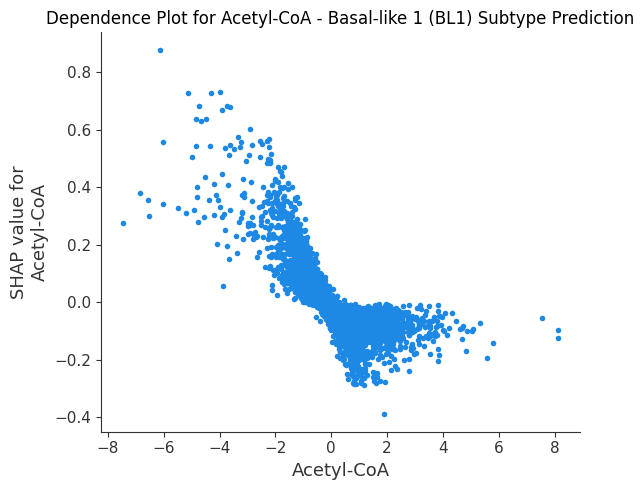

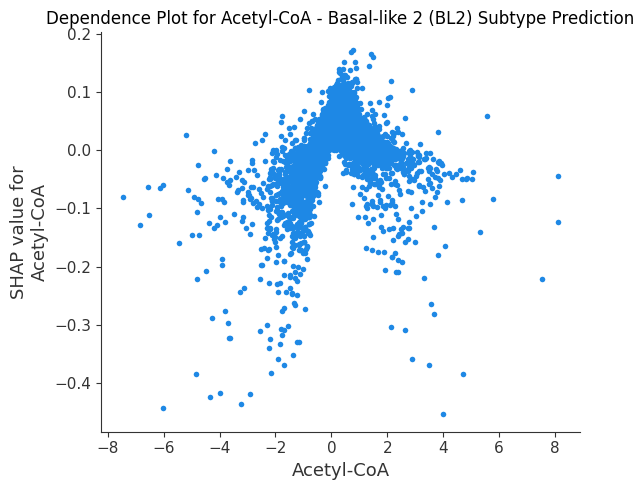

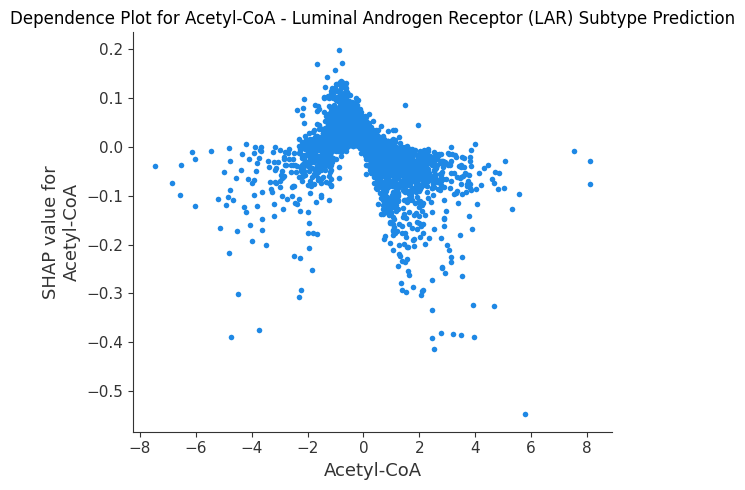

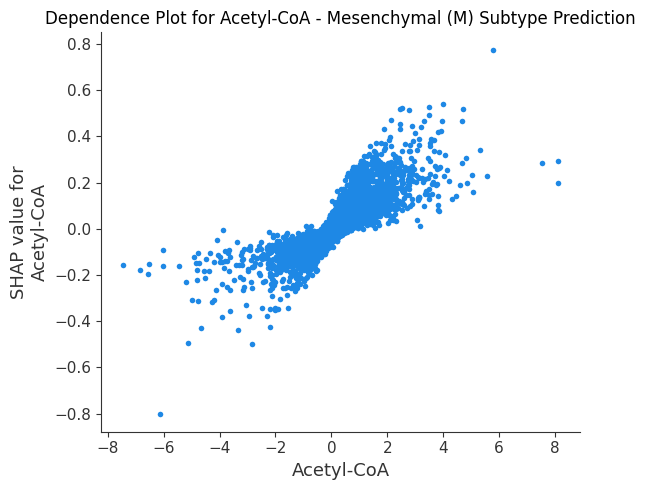

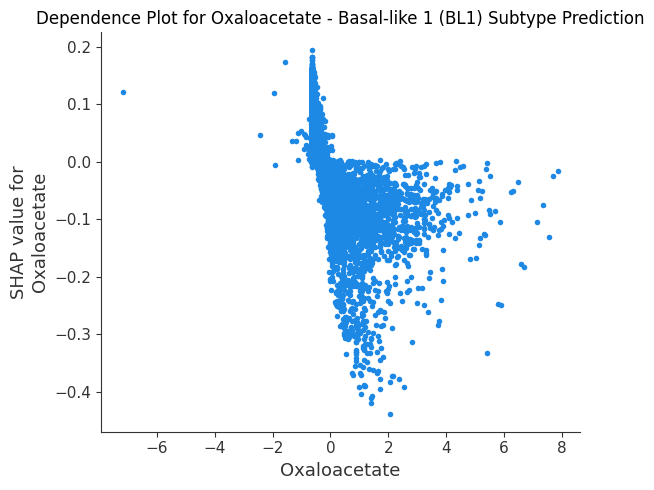

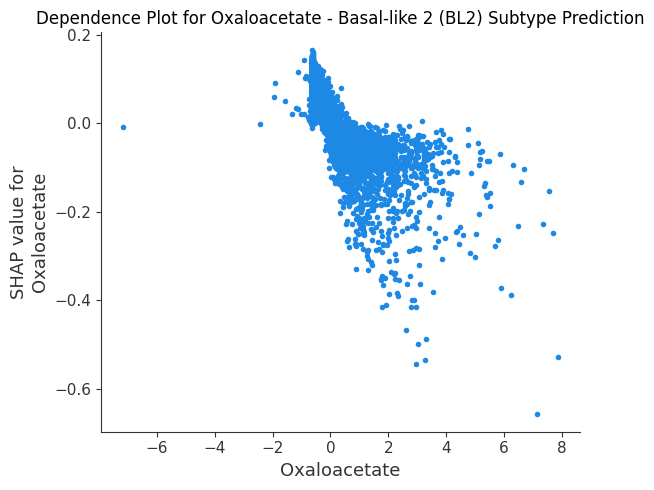

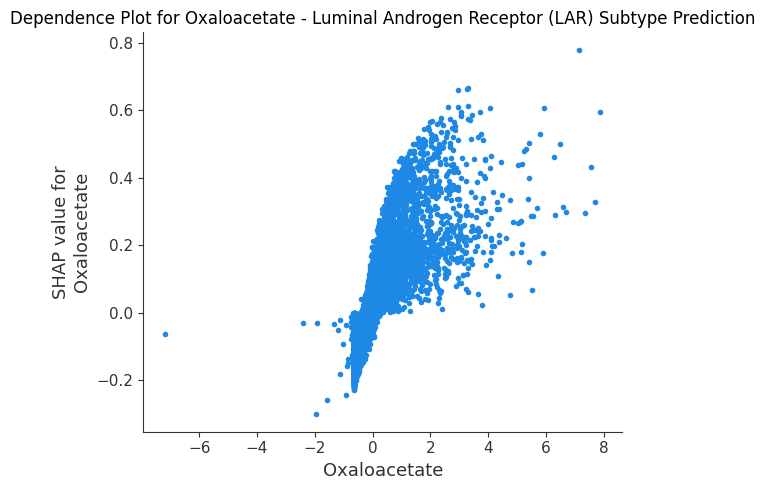

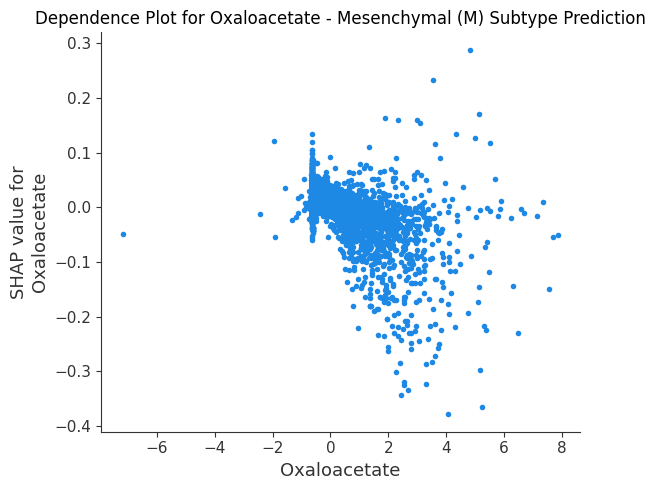

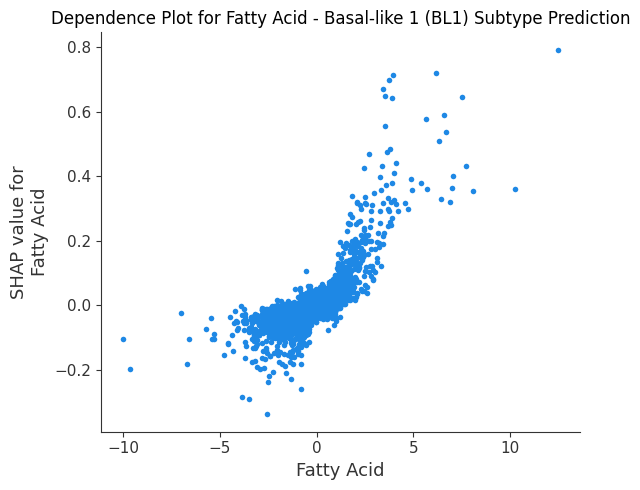

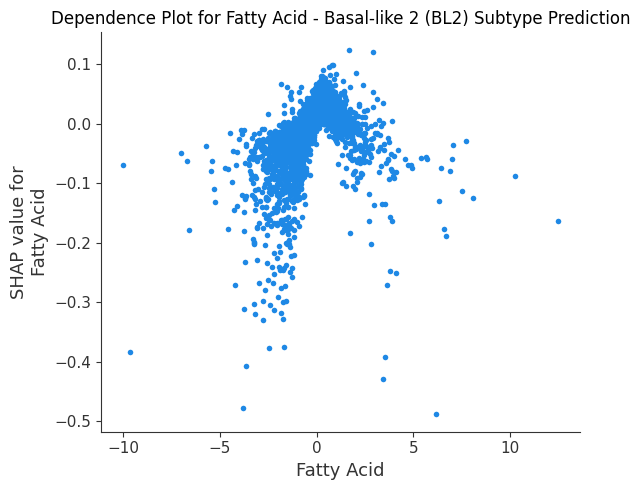

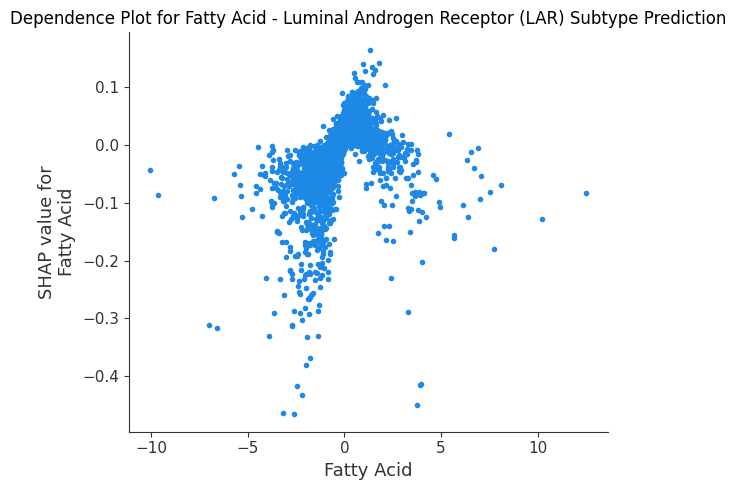

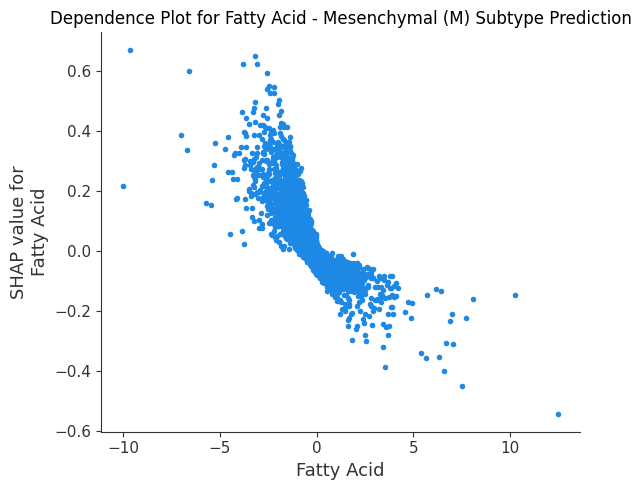

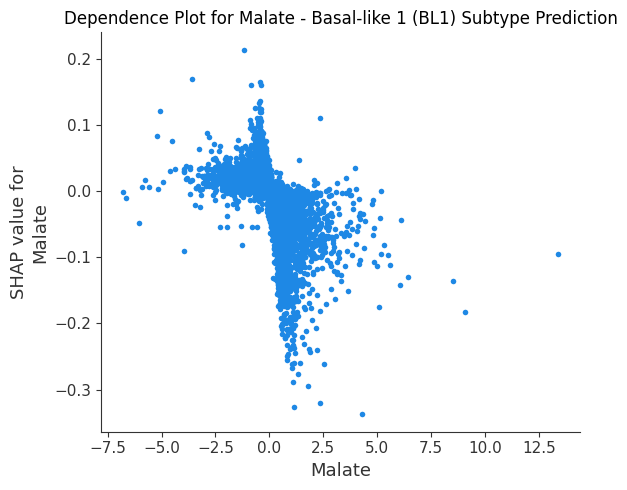

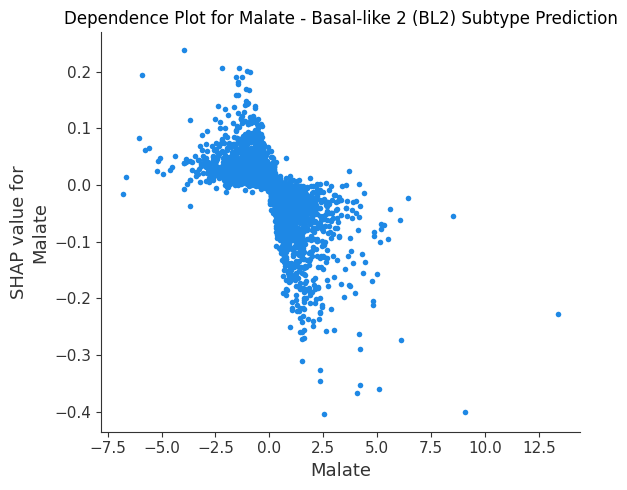

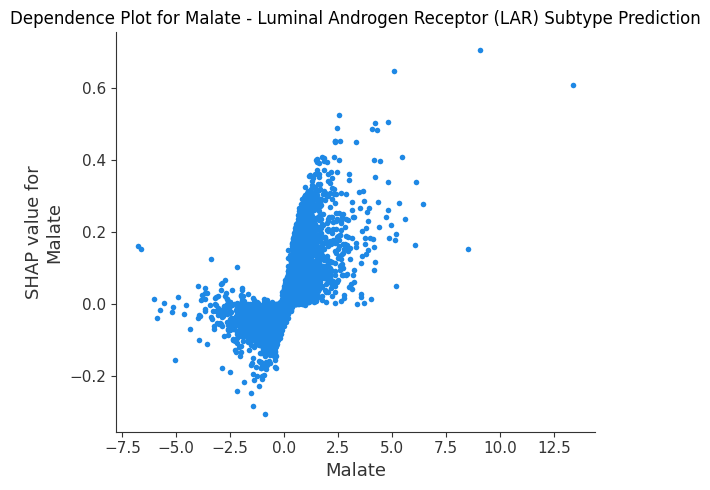

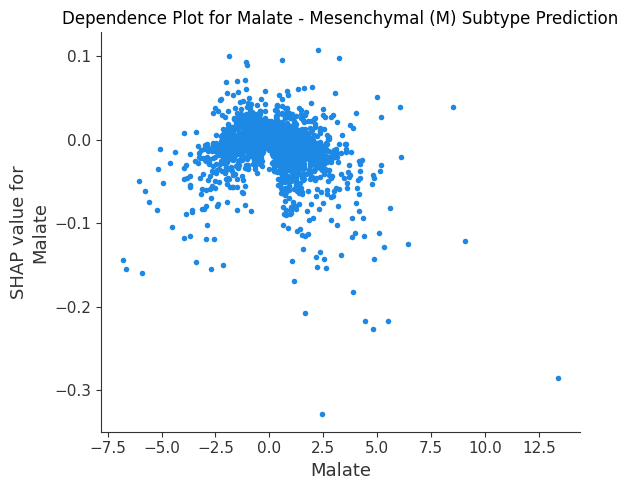

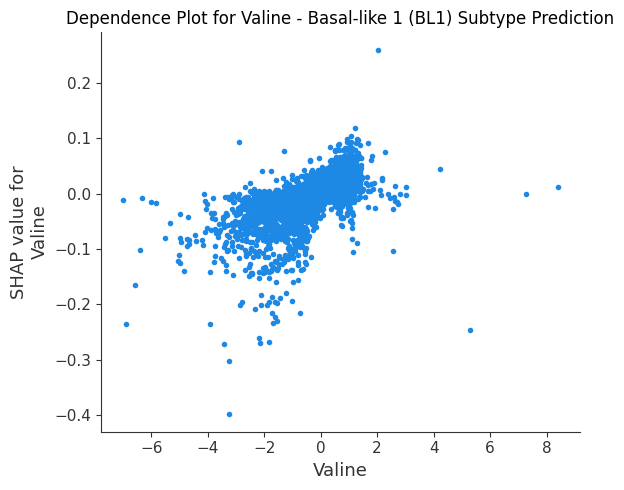

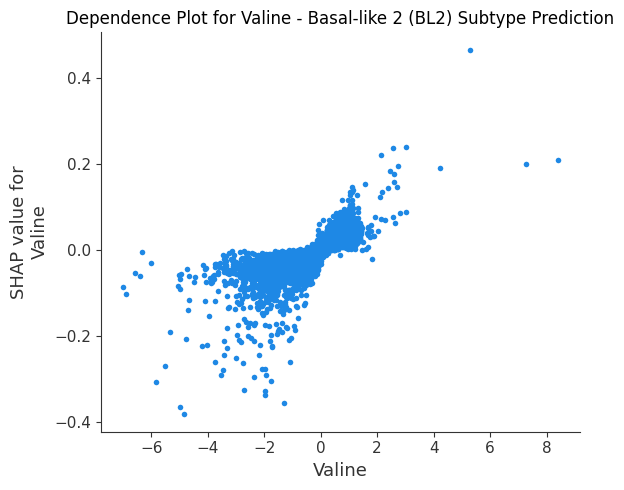

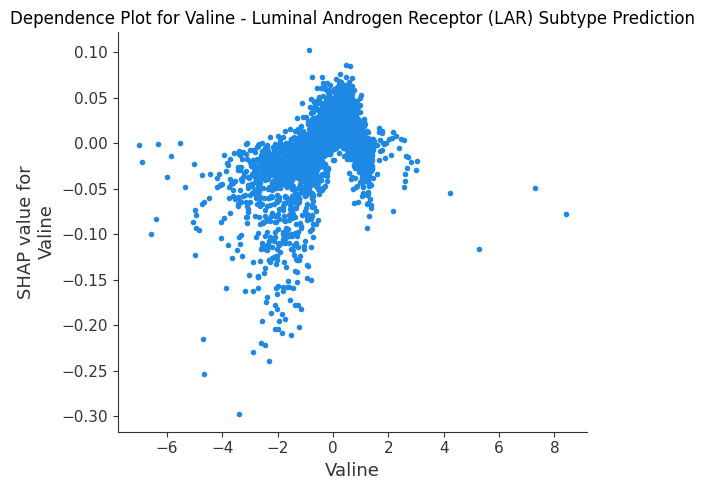

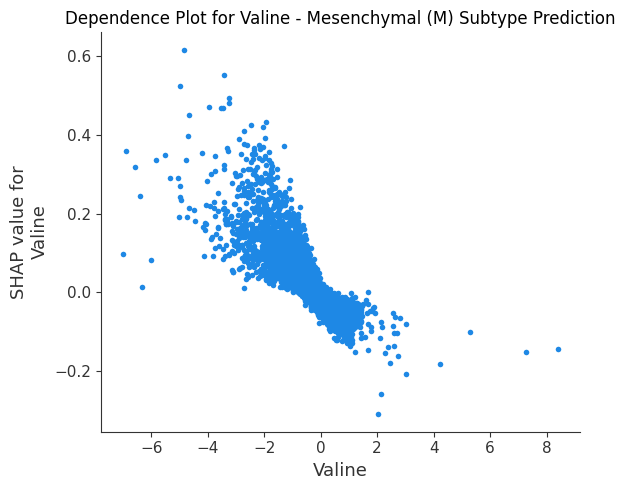

In [ ]:
# List of features to create dependence plots for
top_features = ['Acetyl-CoA', 'Oxaloacetate', 'Fatty Acid', 'Malate', 'Valine']

# Loop through each feature to generate dependence plots
for feature in top_features:
    for i, class_name in enumerate(label_encoder.classes_):
        # Create SHAP dependence plot for each top feature
        shap.dependence_plot(
            feature,  # Feature name
            shap_values.values[:, :, i],  # SHAP values for the class
            X_test,  # Test data
            feature_names=feature_names,  # Feature names
            interaction_index=None,  # Optionally set interaction index for feature interaction
            show=False
        )

        # Add title and show plot
        plt.title(f'Dependence Plot for {feature} - {class_name} Subtype Prediction')
        plt.tight_layout()
        plt.show()



#                     ======SHAP INTERACTION PLOT======

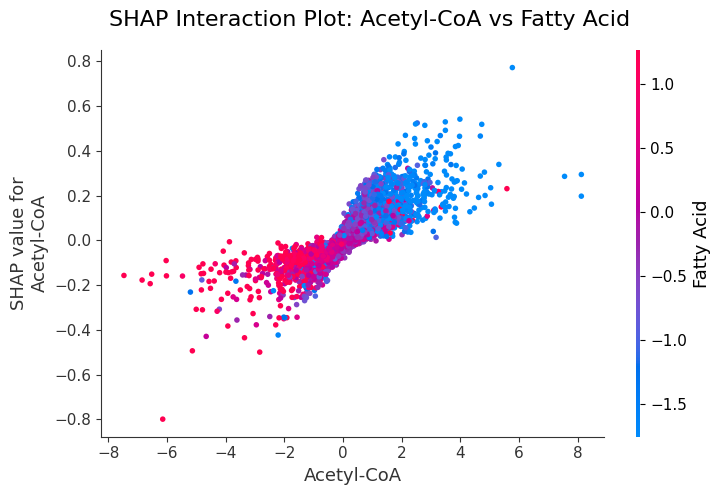

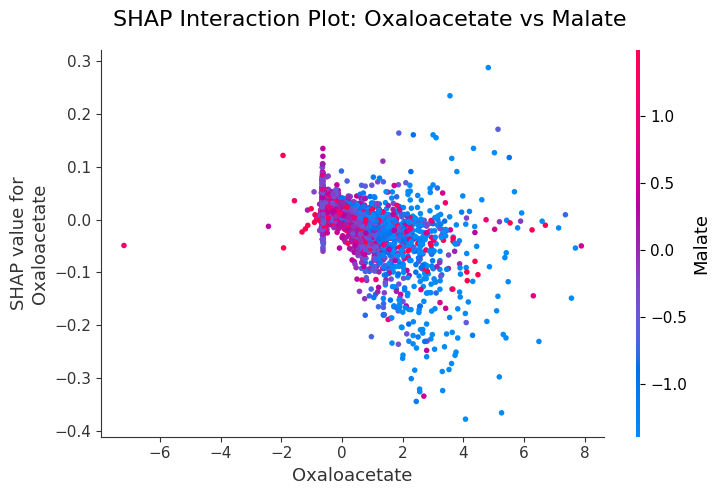

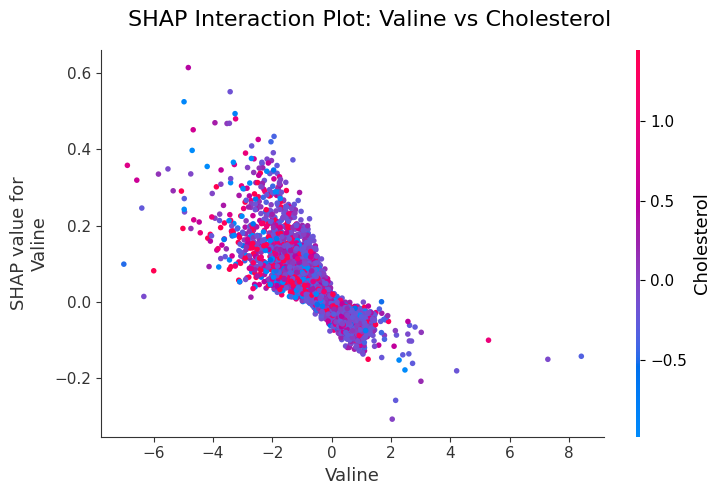

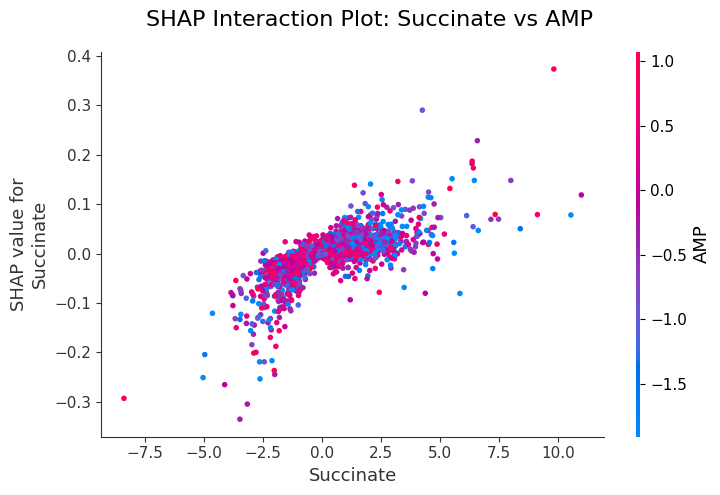

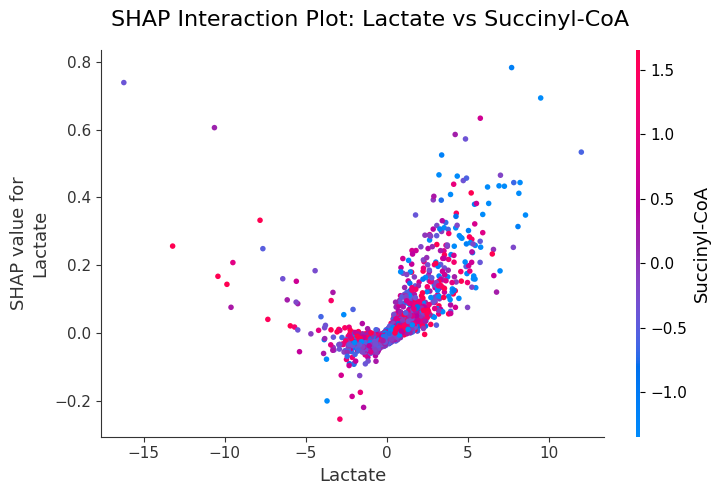

In [ ]:
# Set feature names (you can adjust this to your actual feature names)
feature_names = df_metabolites.drop(columns=["TNBC_Subtype"]).columns

# ====================== Interaction SHAP Plots ======================

# Create a list of feature pairs for interaction plots
feature_pairs = [
    ("Acetyl-CoA", "Fatty Acid"),
    ("Oxaloacetate", "Malate"),
    ("Valine", "Cholesterol"),
    ("Succinate", "AMP"),
    ("Lactate", "Succinyl-CoA")
]

# Loop through the feature pairs and create SHAP interaction plots
for feature1, feature2 in feature_pairs:
    # Create SHAP dependence plot for each pair
    shap.dependence_plot(
        feature1,  # Primary feature
        shap_values.values[:, :, i],  # SHAP values for the class (adjust i for each class)
        X_test,  # Test data
        interaction_index=feature2,  # Feature to interact with
        feature_names=feature_names,  # Feature names
        show=False  # Don't show immediately
    )

    # Set the title (suptitle) for the entire figure
    plt.suptitle(f"SHAP Interaction Plot: {feature1} vs {feature2}", fontsize=16)

    # Adjust layout to avoid overlapping text and ensure the title fits
    plt.tight_layout()

    # Display the plot
    plt.show()


====SENSITIVITY ANALYSIS for Model Interpretability====
Sensitivity Analysis helps understand how the output of the model changes when the input features (metabolites) are varied. In the context of SHAP, sensitivity analysis can be used to explore how changes in metabolite levels affect the predictions of TNBC subtypes.

Steps for Sensitivity Analysis:
Identify a range of values for the top metabolites (e.g., from low to high concentrations).

Simulate changes in those metabolites' values and see how they affect model predictions.

Use SHAP values to track how sensitive the model predictions are to changes in each feature.

In [ ]:

# Select top feature for sensitivity analysis (e.g., "Acetyl-CoA")
feature_to_analyze = "Acetyl-CoA"

# Assuming you know the index of the feature in the numpy array, otherwise define the index manually
# For example, if 'Acetyl-CoA' corresponds to column index 0
feature_index = 0  # Replace with the actual index of "Acetyl-CoA"

# Get the feature values (assuming X_test is a numpy array)
feature_values = X_test[:, feature_index]

# Generate a range of values to simulate the effect of changes
scaled_values = np.linspace(min(feature_values), max(feature_values), num=100)

# Create a copy of the dataset
sensitivity_data = X_test.copy()

# Repeat the scaled_values to match the number of rows in the dataset
# We want to repeat the values across columns (so it will be tiled across each row)
sensitivity_data[:, feature_index] = np.tile(scaled_values, (X_test.shape[0], 1)).T.flatten()

# Calculate SHAP values for these new simulated data points
explainer = shap.KernelExplainer(model.predict, X_test)  # Use your model here
shap_values_sensitivity = explainer.shap_values(sensitivity_data)

# Plot the sensitivity analysis
plt.figure(figsize=(10, 6))
plt.plot(scaled_values, shap_values_sensitivity[0], label=f"SHAP for {feature_to_analyze}", color='blue')
plt.xlabel(f"Scaled values of {feature_to_analyze}")
plt.ylabel("SHAP value")
plt.title(f"Sensitivity Analysis for {feature_to_analyze}")
plt.legend()
plt.show()


ValueError: could not broadcast input array from shape (705500,) into shape (7055,)

Cross-Validation for SHAP Analysis
Cross-validation is useful to validate the stability and reliability of the SHAP feature importances and model predictions across different splits of your data. By running SHAP analysis across multiple folds of cross-validation, you can assess if the identified top features remain consistent.

Steps for Cross-Validation with SHAP:
Split your data into multiple folds (e.g., 5-fold or 10-fold cross-validation).

Train the model on each fold, and calculate SHAP values for each fold.

Aggregate SHAP values across all folds to see if certain features consistently have high importance.

Evaluate feature stability: Features that consistently show up as important across folds are more reliable.

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import shap

# Set up cross-validation (StratifiedKFold is used for classification tasks)
kf = StratifiedKFold(n_splits=5)

# Prepare an array to store SHAP feature importances
feature_importances_cv = []

# Loop over each fold
for train_index, test_index in kf.split(X_train, y_train):
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

    # Train your model on the current fold
    model.fit(X_train_fold, y_train_fold)

    # Get SHAP values for this fold
    explainer = shap.KernelExplainer(model.predict, X_train_fold)
    shap_values_fold = explainer.shap_values(X_test_fold)

    # Calculate average SHAP values for each feature
    avg_shap_values = np.mean(np.abs(shap_values_fold), axis=0)

    # Store feature importances
    feature_importances_cv.append(avg_shap_values)

# Aggregate the feature importances from all folds
mean_feature_importances = np.mean(feature_importances_cv, axis=0)

# Plot the aggregated feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(mean_feature_importances)), mean_feature_importances, align="center")
plt.yticks(range(len(mean_feature_importances)), feature_names)
plt.xlabel("Average SHAP Importance")
plt.title("Cross-Validated SHAP Feature Importances")
plt.show()


AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [ ]:
# ======================= SHAP Explainer Setup =======================
# Initialize the SHAP explainer (using KernelExplainer for deep learning models)
explainer = shap.KernelExplainer(model.predict, X_train[:100])  # Use a sample of the training data for explanation

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# ======================= SHAP Summary Plot and Feature Importance Plot Side by Side =======================
# Get feature names for labeling in the plots
feature_names = df_metabolites.drop(columns=["TNBC_Subtype"]).columns

# Calculate the mean absolute SHAP values for each feature across all test samples
mean_shap_values = np.abs(shap_values[0]).mean(axis=0)  # Taking mean SHAP values for the first class (can iterate for others if needed)

# Create a DataFrame to sort the features by their importance
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Mean SHAP Value': mean_shap_values
})

# Sort features by their SHAP importance (mean absolute SHAP values)
importance_df = importance_df.sort_values(by='Mean SHAP Value', ascending=False)

# Get the top 10 important features
top_10_features = importance_df.head(10)

# ======================= Plotting =======================
# Set up a figure with two subplots: SHAP Summary plot and Feature Importance plot
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# ======================= SHAP Summary Plot =======================
# Plot the SHAP summary plot for the whole test set
shap.summary_plot(shap_values, X_test, feature_names=feature_names, show=False)
axes[0].set_title("SHAP Summary Plot")

# ======================= Feature Importance Plot =======================
# Create a bar plot for the top 10 features
top_10_features.plot(kind='barh', x='Feature', y='Mean SHAP Value', ax=axes[1], color='red', legend=False)
axes[1].set_title("Top 10 Feature Importance")
axes[1].set_xlabel('Mean Absolute SHAP Value')
axes[1].set_ylabel('Feature')

plt.tight_layout()
plt.show()


PermutationExplainer explainer: 7056it [37:54,  3.09it/s]


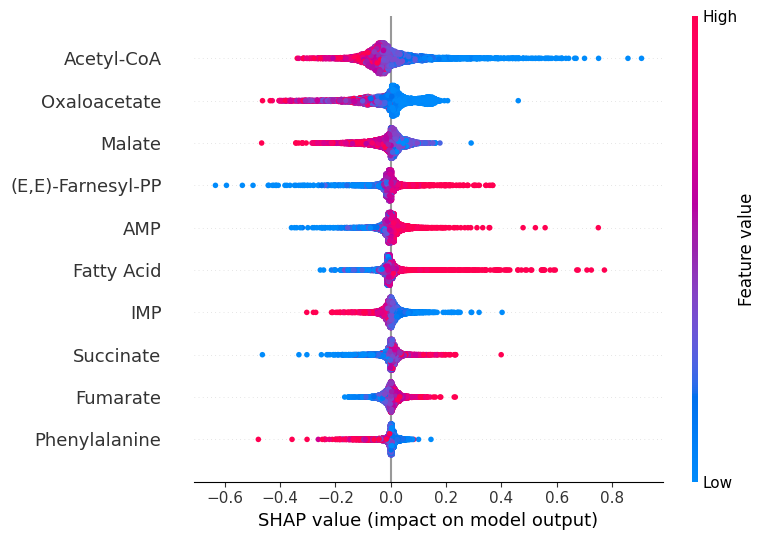

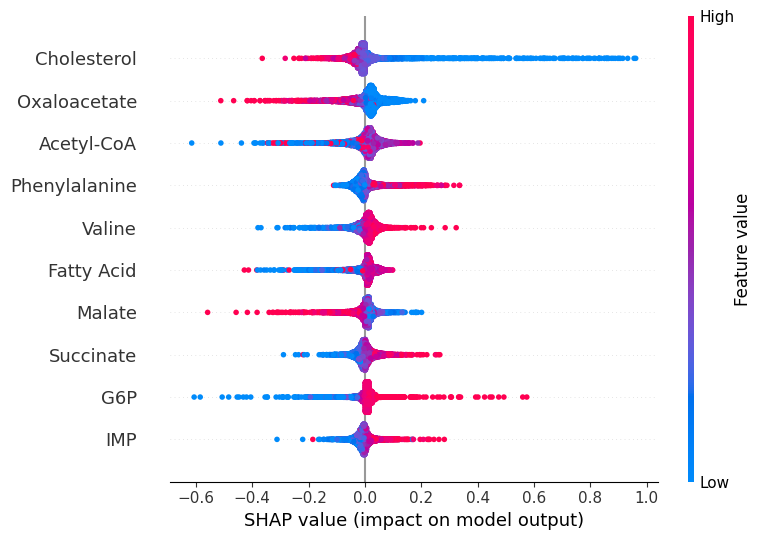

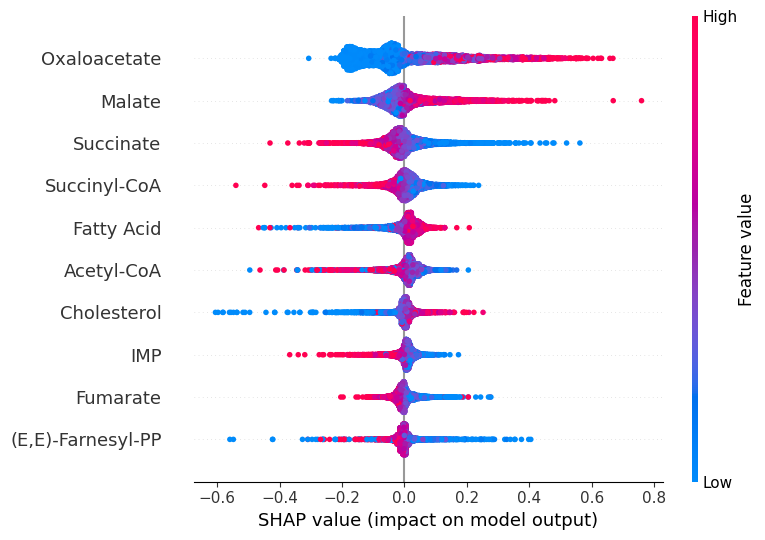

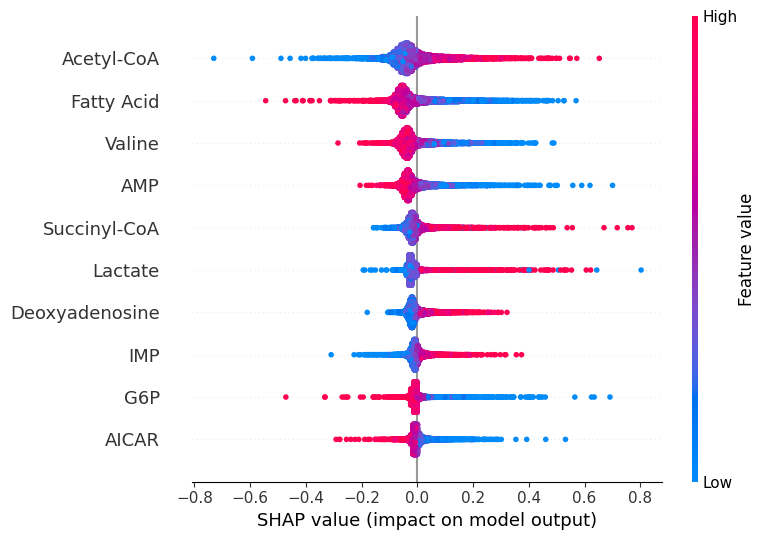

In [ ]:
import shap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# ====================== Create SHAP Explainer ======================
explainer = shap.Explainer(model, X_test)  # Alternative: shap.DeepExplainer(model, X_train[:100])
shap_values = explainer(X_test)

# Get feature names
feature_names = df_metabolites.drop(columns=["TNBC_Subtype"]).columns

# ====================== Plot SHAP Summary and Feature Importance Side-by-Side ======================
for i, class_name in enumerate(label_encoder.classes_):
    fig, axes = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'width_ratios': [1, 1]})

    # ✅ SHAP Summary Plot (on the left)
    shap_values_class = shap_values.values[:, :, i]  # Extract SHAP values for class i

    plt.sca(axes[0])  # Set current axis
    shap.summary_plot(
        shap_values_class,
        X_test,
        feature_names=feature_names,
        max_display=10,
        show=False  # Prevents immediate display
    )
    axes[0].set_title(f"{class_name} - SHAP Summary")

    # ✅ Feature Importance Plot (on the right)
    class_importance = np.abs(shap_values_class).mean(axis=0)
    top_features = pd.Series(class_importance, index=feature_names).nlargest(10)

    axes[1].barh(
        y=top_features.index[::-1],  # Reverse order for better visualization
        width=top_features.values[::-1],
        color='red'
    )
    axes[1].set_title(f"{class_name} - Feature Importances")
    axes[1].set_xlabel("Mean Absolute SHAP Value")

    # 🔥 Fix: Show both plots together
    plt.tight_layout()
    plt.show()


In [ ]:
import shap
import matplotlib.pyplot as plt
import seaborn as sns

# ======================= SHAP Explainer =======================
# Initialize the SHAP explainer (for deep learning models like yours, use DeepExplainer)
explainer = shap.KernelExplainer(model.predict, X_train[:100])  # Use a sample of the training data for explanation

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# ======================= SHAP Summary Plot =======================
# Plot the SHAP summary plot for all the classes/subtypes combined
shap.summary_plot(shap_values, X_test, feature_names=df_metabolites.drop(columns=["TNBC_Subtype"]).columns)

# ======================= SHAP Classwise Importance =======================
# Plot SHAP values for each TNBC subtype (for each class in the multi-class classification)
for i in range(len(label_encoder.classes_)):
    shap.summary_plot(shap_values[i], X_test, feature_names=df_metabolites.drop(columns=["TNBC_Subtype"]).columns,
                      title=f"SHAP Summary for Subtype {label_encoder.classes_[i]}")

# ======================= SHAP Feature Importance Plots =======================
# Generate feature importance plots side-by-side for each class (TNBC subtype)
fig, axes = plt.subplots(1, len(label_encoder.classes_), figsize=(20, 6))
for i, ax in enumerate(axes):
    shap.summary_plot(shap_values[i], X_test, feature_names=df_metabolites.drop(columns=["TNBC_Subtype"]).columns,
                      plot_type="bar", show=False, ax=ax)
    ax.set_title(f"Feature Importance for {label_encoder.classes_[i]}")
plt.tight_layout()
plt.show()

# ======================= SHAP Individual Prediction Analysis =======================
# Visualize SHAP values for specific predictions in the test set
# Example for the first test sample
shap.initjs()
shap.force_plot(shap_values[0][0], X_test[0], feature_names=df_metabolites.drop(columns=["TNBC_Subtype"]).columns)


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


PermutationExplainer explainer:  60%|██████    | 6/10 [00:00<?, ?it/s]

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


PermutationExplainer explainer:  80%|████████  | 8/10 [00:11<00:00,  2.40it/s]

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


PermutationExplainer explainer:  90%|█████████ | 9/10 [00:12<00:00,  1.61it/s]

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


PermutationExplainer explainer: 100%|██████████| 10/10 [00:13<00:00,  1.39it/s]

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


PermutationExplainer explainer: 11it [00:13,  2.80s/it]

SHAP Values Shape: (10, 69, 4)


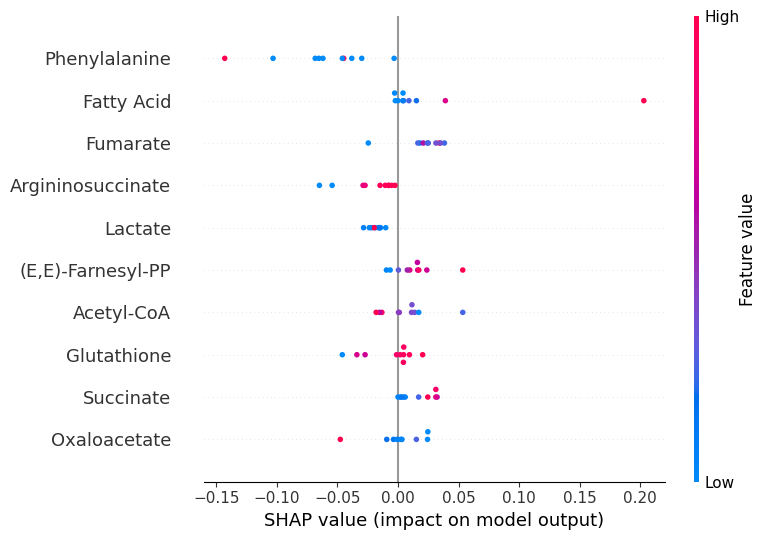


Feature Importances for Basal-like 1 (BL1):
Phenylalanine        0.060437
Fatty Acid           0.028391
Fumarate             0.026804
Argininosuccinate    0.022430
Lactate              0.018388
(E,E)-Farnesyl-PP    0.016025
Acetyl-CoA           0.015495
Glutathione          0.015369
Succinate            0.015147
Oxaloacetate         0.013136
dtype: float64


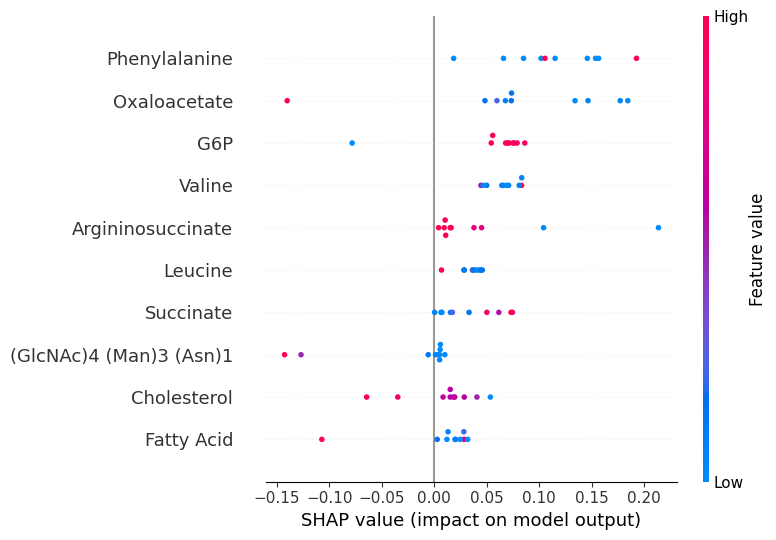


Feature Importances for Basal-like 2 (BL2):
Phenylalanine              0.114239
Oxaloacetate               0.110650
G6P                        0.071530
Valine                     0.065973
Argininosuccinate          0.046816
Leucine                    0.035331
Succinate                  0.034039
(GlcNAc)4 (Man)3 (Asn)1    0.031256
Cholesterol                0.029924
Fatty Acid                 0.028915
dtype: float64


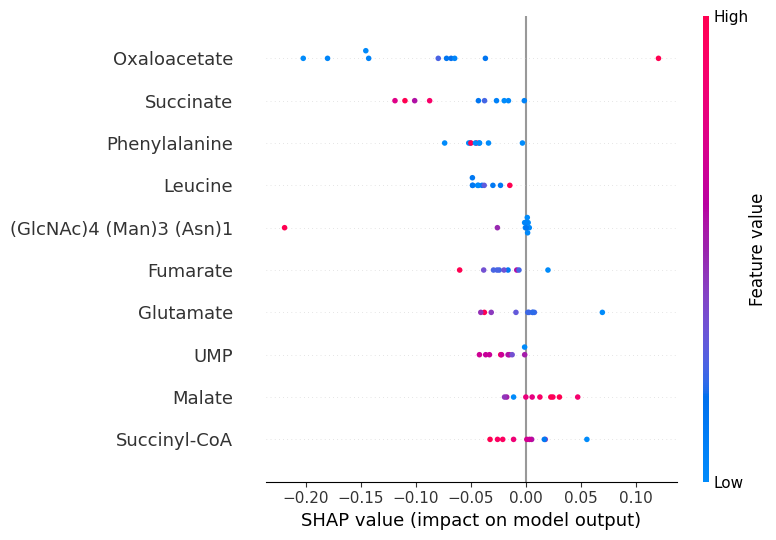


Feature Importances for Luminal Androgen Receptor (LAR):
Oxaloacetate               0.111475
Succinate                  0.056407
Phenylalanine              0.044102
Leucine                    0.038016
(GlcNAc)4 (Man)3 (Asn)1    0.025534
Fumarate                   0.025086
Glutamate                  0.021301
UMP                        0.020486
Malate                     0.019093
Succinyl-CoA               0.018942
dtype: float64


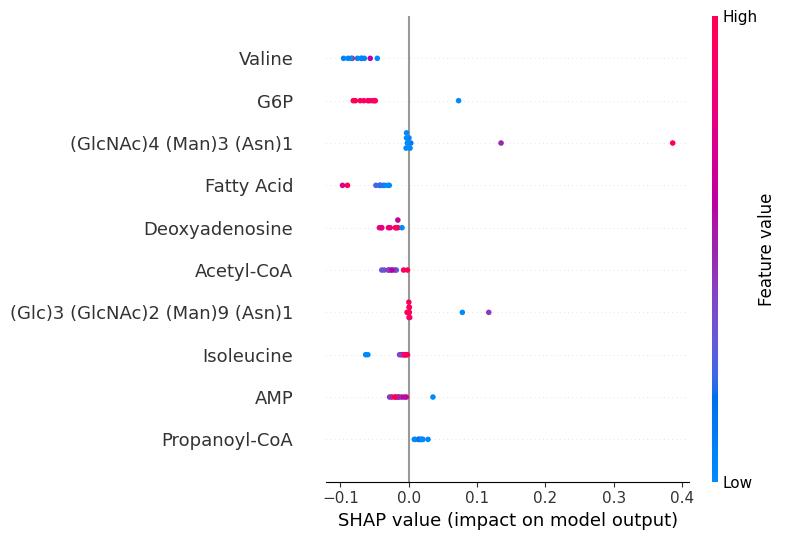


Feature Importances for Mesenchymal (M):
Valine                            0.073297
G6P                               0.063963
(GlcNAc)4 (Man)3 (Asn)1           0.054085
Fatty Acid                        0.049339
Deoxyadenosine                    0.025952
Acetyl-CoA                        0.023410
(Glc)3 (GlcNAc)2 (Man)9 (Asn)1    0.020197
Isoleucine                        0.017962
AMP                               0.017894
Propanoyl-CoA                     0.016565
dtype: float64


In [ ]:
import shap
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# ========================== SHAP Integration ==========================
# Ensure your model is correctly trained and ready for SHAP
# Replace `model` with your trained model

# Define Prediction Function for SHAP (for Keras models or any other model)
def model_predict(data):
    return model.predict(data)

# Summarize background dataset for SHAP computations (sample data for efficiency)
background = shap.sample(X_train, 10)  # Use 10 samples to estimate background

# ========================== SHAP Explainer ==========================
# Create SHAP explainer for your model
explainer = shap.Explainer(model_predict, background)

# ✅ Compute SHAP values for a subset of test data (e.g., 10 samples)
shap_values = explainer(X_test[:10])

# ========================== Verify SHAP Values ==========================
# Check if SHAP values are being computed correctly
print("SHAP Values Shape:", shap_values.values.shape)  # Should match (samples, features, classes)

# Get feature names (ensure they match your input data columns)
feature_names = df_metabolites.drop(columns=["TNBC_Subtype"]).columns

# ========================== Plot SHAP Summary + Feature Importance ==========================
for i, class_name in enumerate(label_encoder.classes_):
    fig, axes = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'width_ratios': [1, 1]})

    # ========================== SHAP Summary Plot ==========================
    # We now use SHAP's summary_plot directly but prevent it from auto-showing
    shap.summary_plot(
        shap_values.values[:, :, i],
        X_test[:10],  # Provide correct test data for SHAP (ensure it matches X_test)
        feature_names=feature_names,
        max_display=10,
        show=False  # Don't display immediately
    )

    axes[0].set_title(f"{class_name} - SHAP Summary")  # Set title for SHAP summary plot

    # ========================== Feature Importance Plot ==========================
    # Calculate Feature Importance (mean absolute SHAP value for each feature)
    class_importance = np.abs(shap_values.values[:, :, i]).mean(axis=0)
    top_features = pd.Series(class_importance, index=feature_names).nlargest(10)

    axes[1].barh(
        y=top_features.index[::-1],  # Reverse order for better visualization
        width=top_features.values[::-1],
        color='red'
    )
    axes[1].set_title(f"{class_name} - Feature Importances")
    axes[1].set_xlabel("Mean Absolute SHAP Value")

    plt.tight_layout()
    plt.show()  # This will display the plot

    # ✅ Print Top 10 Features for each TNBC subtype
    print(f"\nFeature Importances for {class_name}:")
    print(top_features)


Reloading Tuner from tuner_results/TNBC_hyperparam_tuning/tuner0.json

Best Hyperparameters:
{'units_1': 128, 'units_2': 32, 'optimizer': 'adam', 'learning_rate': 0.003193348791226863}
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


441/441 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5859 - loss: 0.9630 - val_accuracy: 0.8338 - val_loss: 0.5040
Epoch 2/100
441/441 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8285 - loss: 0.5008 - val_accuracy: 0.8390 - val_loss: 0.4585
Epoch 3/100
441/441 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8413 - loss: 0.4367 - val_accuracy: 0.8508 - val_loss: 0.4087
Epoch 4/100
441/441 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8541 - loss: 0.3964 - val_accuracy: 0.8588 - val_loss: 0.3851
Epoch 5/100
441/441 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8649 - loss: 0.3632 - val_accuracy: 0.8638 - val_loss: 0.3588
Epoch 6/100
441/441 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8690 - loss: 0.3431 - val_accuracy: 0.8695 - val_loss: 0.3401
Epoch 7/100
441/441 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8753 - loss: 0.3275 - val_accuracy: 0.8770 - val_loss: 0.3330
Epoch 8/100
441/441 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8813 - loss: 0.3115 - val_accuracy: 0.8740

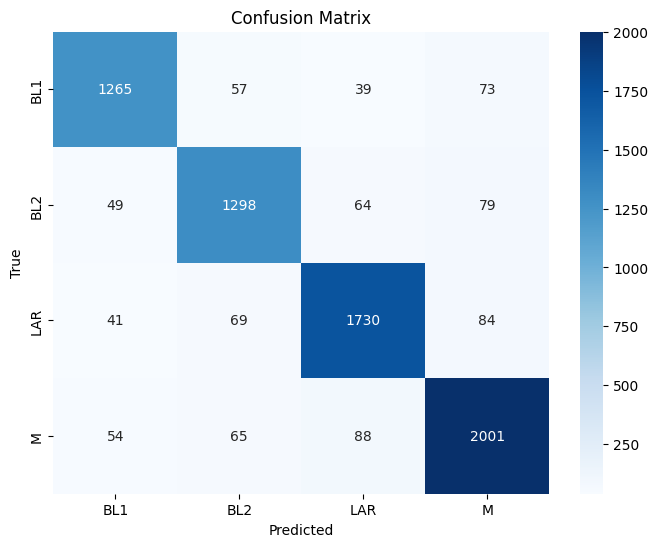


Classification Report:
                                 precision    recall  f1-score   support

             Basal-like 1 (BL1)       0.89      0.89      0.89      1434
             Basal-like 2 (BL2)       0.88      0.87      0.88      1490
Luminal Androgen Receptor (LAR)       0.88      0.91      0.90      1924
                Mesenchymal (M)       0.91      0.89      0.90      2208

                       accuracy                           0.89      7056
                      macro avg       0.89      0.89      0.89      7056
                   weighted avg       0.89      0.89      0.89      7056



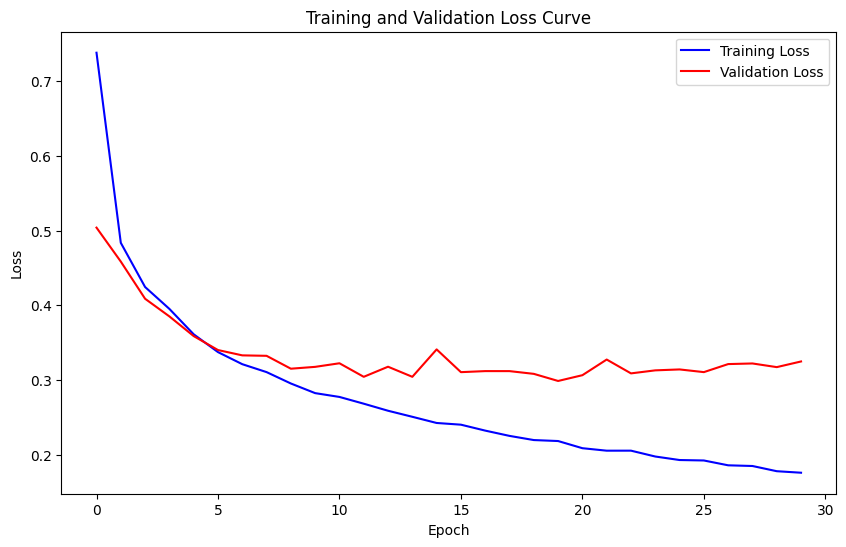

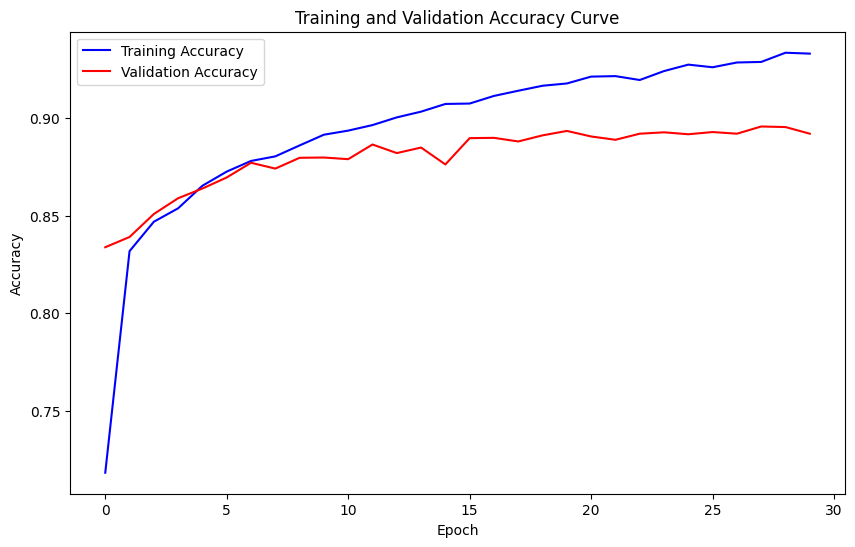

In [ ]:
# Encode the target variable (TNBC Subtype)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df_metabolites["TNBC_Subtype"])
X = df_metabolites.drop(columns=["TNBC_Subtype"]).values  # Features (only metabolites)
# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# ======================= Build Model Function =======================
def build_model(hp):
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(hp.Int('units_1', min_value=32, max_value=128, step=32), activation='relu'),
        tf.keras.layers.Dense(hp.Int('units_2', min_value=16, max_value=64, step=16), activation='relu'),
        tf.keras.layers.Dense(len(np.unique(y)), activation='softmax')
    ])

    # Choose optimizer and learning rate
    optimizer_choice = hp.Choice("optimizer", ["adam", "sgd", "rmsprop"])
    learning_rate = hp.Float("learning_rate", 1e-4, 1e-2, sampling='LOG')

    if optimizer_choice == "adam":
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer_choice == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    elif optimizer_choice == "rmsprop":
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)

    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# ======================= Hyperparameter Tuning =======================
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=2,
    directory='tuner_results',
    project_name='TNBC_hyperparam_tuning'
)

tuner.search(X_train, y_train,
             epochs=50,
             validation_data=(X_test, y_test),
             batch_size=64)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"\nBest Hyperparameters:\n{best_hps.values}")

# ======================= Train Best Model =======================
fcnn_model = tuner.hypermodel.build(best_hps)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

history = fcnn_model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
)

# ======================= Evaluate Model =======================
# Model evaluation on test data
y_pred = np.argmax(fcnn_model.predict(X_test), axis=1)


# ======================= Step 2: Confusion Matrix =======================

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["BL1", "BL2", "LAR", "M"], yticklabels=["BL1", "BL2", "LAR", "M"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

class_report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print("\nClassification Report:")
print(class_report)



# ======================= Additional Visualizations =======================
# Loss Curve
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.title("Training and Validation Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Accuracy Curve
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.title("Training and Validation Accuracy Curve")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


### ========================== SHAP Integration ==========================

==========SHAP Summary and Feature Importance for Multi-Class Classification======

By analyzing both the overall SHAP summary and the class-specific SHAP summaries, you will gain deeper biological insights into which metabolites drive the classification of each TNBC subtype ('Basal-like 1 (BL1)','Mesenchymal (M)','Basal-like 2 (BL2)','Luminal Androgen Receptor (LAR). This will help you interpret:

✅ Overall drivers → Which metabolites are most important for predicting TNBC subtypes as a whole. ✅ Subtype-specific drivers → Which metabolites are driving predictions for each specific subtype. ✅ Direction of effect → Whether a metabolite increases or decreases the likelihood of a specific subtype (positive vs negative SHAP values).

In [ ]:
# ========================== SHAP Integration ==========================

# Define Prediction Function for SHAP
def model_predict(data):
    return fcnn_model.predict(data)

# Summarize background dataset for SHAP computations (use a sample for efficiency)
background = shap.sample(X_train, 10)

# Create SHAP Explainer for Keras model
explainer = shap.Explainer(model_predict, background)

# Compute SHAP values for test data (subset for faster computation)
shap_values = explainer(X_test[:10])




NameError: name 'fcnn_model' is not defined

In [ ]:
# ======================== SHAP Summary + Feature Importance Side-by-Side ==========================
class_names = label_encoder.classes_

# Loop through each class (subtype)
for class_idx, class_name in enumerate(class_names):
    print(f"\n=== SHAP Summary for {class_name} ===")

    # Extract SHAP values for the specific class
    shap_values_for_class = shap_values.values[:, :, class_idx]

    # Create a figure with 1 row and 2 columns (side-by-side plots)
    fig, axes = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'width_ratios': [1, 1]})

    # ✅ SHAP Summary Plot (on the left)
    plt.sca(axes[0])
    shap.summary_plot(
        shap_values_for_class,
        X_test[:100],
        feature_names=df_metabolites.drop(columns=["TNBC_Subtype"]).columns,
        max_display=10,
        show=False
    )
    axes[0].set_title(f"{class_name} - SHAP Summary")

    # ✅ Feature Importance Plot (on the right)
    mean_abs_shap = np.mean(np.abs(shap_values_for_class), axis=0)
    sorted_indices = np.argsort(mean_abs_shap)[::-1][:10]  # Top 10 features

    axes[1].barh(
        y=[df_metabolites.drop(columns=["TNBC_Subtype"]).columns[j] for j in sorted_indices[::-1]],
        width=mean_abs_shap[sorted_indices[::-1]],
        color='red'
    )
    axes[1].set_title(f"{class_name} - Feature Importance")
    axes[1].set_xlabel("Mean |SHAP value|")

    # Adjust layout to avoid overlap
    plt.tight_layout()
    plt.show()

======USING PROXY MODEL APPROACH==========

In [ ]:
# ======================= Import and Preprocess Data =======================
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
import shap
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# ======================= Load Data =======================
df_metabolites = pd.read_csv("/content/drive/MyDrive/MY THESIS/Thesis/metabolites_training.csv")
df_metabolites_umap = pd.read_csv("/content/drive/MyDrive/MY THESIS/Thesis/metabolites_umap_training.csv")

In [ ]:


# ✅ Encode target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df_metabolites["TNBC_Subtype"])

# ✅ Split full metabolite data
X_full = df_metabolites.drop(columns=["TNBC_Subtype"]).values

# ✅ Drop non-numeric columns from UMAP-reduced data
df_metabolites_umap = df_metabolites_umap.select_dtypes(include=['number'])

# ✅ Convert to numpy and ensure correct type
X_umap = df_metabolites_umap.values.astype('float32')

# ✅ Train-test split
X_train_umap, X_test_umap, y_train, y_test = train_test_split(X_umap, y, test_size=0.2, random_state=42)
X_train_full, X_test_full, _, _ = train_test_split(X_full, y, test_size=0.2, random_state=42)

# ======================= Step 1: Train Classifier on UMAP Data =======================
def build_classifier():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_umap.shape[1],)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(len(np.unique(y)), activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# ✅ Build and train classifier
classifier = build_classifier()
history = classifier.fit(X_train_umap, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# ✅ Evaluate model
loss, accuracy = classifier.evaluate(X_test_umap, y_test)
print(f'\nClassifier Test Accuracy on UMAP data: {accuracy:.4f}')

# ======================= Step 2: Train Proxy Model to Map Full Data to UMAP =======================
def build_proxy():
    proxy_model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_full.shape[1],)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(X_train_umap.shape[1])  # Output shape matches UMAP dimensions
    ])
    proxy_model.compile(optimizer='adam', loss='mse')
    return proxy_model

# ✅ Build and train proxy model
proxy_model = build_proxy()
history_proxy = proxy_model.fit(X_train_full, X_train_umap, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


706/706 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7389 - loss: 0.8612 - val_accuracy: 0.9525 - val_loss: 0.1608
Epoch 2/50
706/706 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9458 - loss: 0.1551 - val_accuracy: 0.9479 - val_loss: 0.1304
Epoch 3/50
706/706 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9565 - loss: 0.1196 - val_accuracy: 0.9699 - val_loss: 0.0953
Epoch 4/50
706/706 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9630 - loss: 0.1004 - val_accuracy: 0.9630 - val_loss: 0.0921
Epoch 5/50
706/706 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9650 - loss: 0.0895 - val_accuracy: 0.9568 - val_loss: 0.1084
Epoch 6/50
706/706 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9663 - loss: 0.0902 - val_accuracy: 0.9548 - val_loss: 0.1059
Epoch 7/50
706/706 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9670 - loss: 0.0818 - val_accuracy: 0.9605 - val_loss: 0.0906
Epoch 8/50
706/706 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9678 - loss: 0.0786 - val_accuracy: 0.9736 - val_

221/221 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Classifier Test Accuracy on UMAP data: 0.9790
Precision: 0.9795
Recall: 0.9790
F1-Score: 0.9790


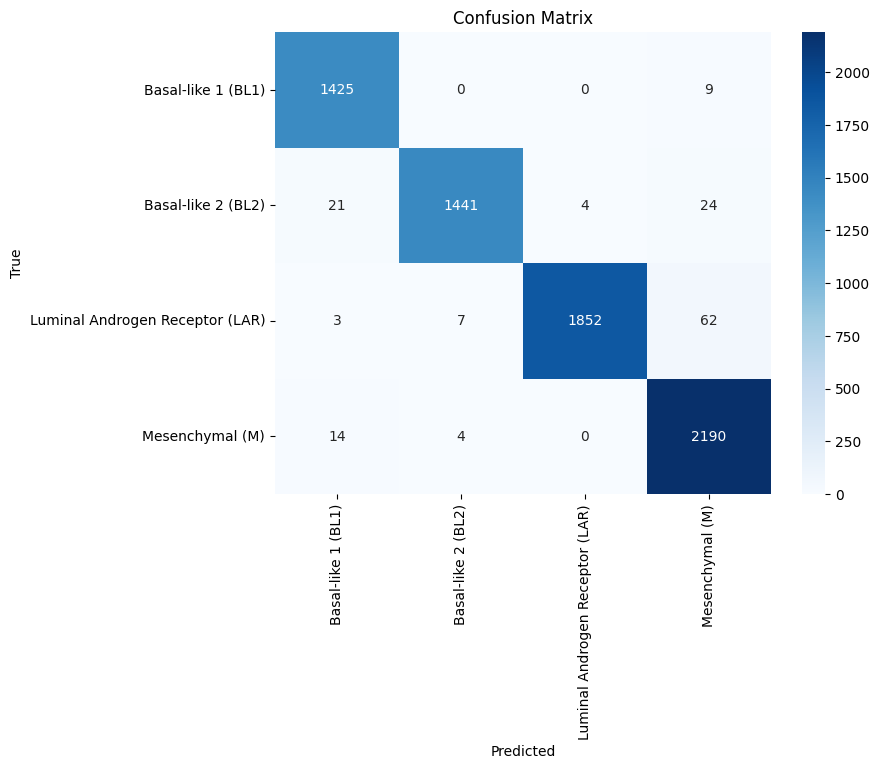

221/221 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


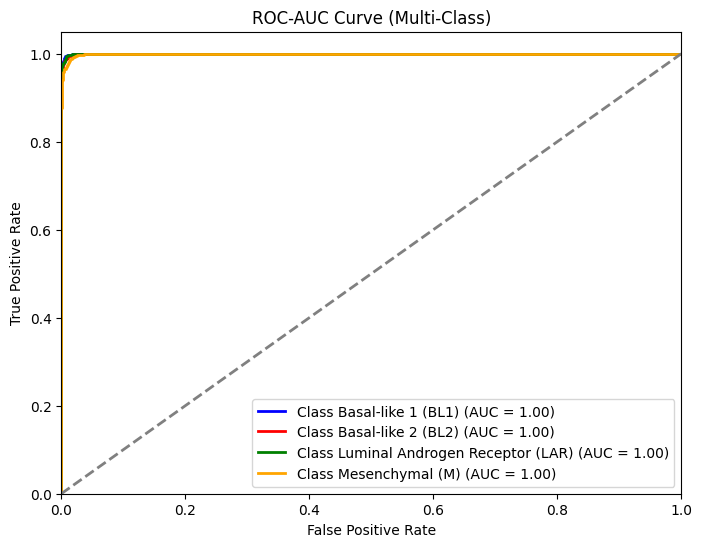

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
import seaborn as sns
from itertools import cycle

# ======================= Step 1: Evaluate Classifier =======================
y_pred = np.argmax(classifier.predict(X_test_umap), axis=1)

# ✅ Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Classifier Test Accuracy on UMAP data: {accuracy:.4f}')

# ✅ Precision, Recall, F1-Score (for multi-class)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# ======================= Step 2: Confusion Matrix =======================
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["BL1", "BL2", "LAR", "M"], yticklabels=["BL1", "BL2", "LAR", "M"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# ======================= Step 3: ROC-AUC Curve =======================
# One-hot encode y_test and y_pred for multi-class ROC-AUC
from sklearn.preprocessing import label_binarize

y_test_bin = label_binarize(y_test, classes=np.arange(len(label_encoder.classes_)))
y_pred_prob = classifier.predict(X_test_umap)

fpr = {}
tpr = {}
roc_auc = {}

colors = cycle(["blue", "red", "green", "orange"])

plt.figure(figsize=(8, 6))

for i, color in zip(range(len(label_encoder.classes_)), colors):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Class {label_encoder.classes_[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], linestyle="--", color="gray", lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve (Multi-Class)")
plt.legend(loc="lower right")
plt.show()



221/221 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


  0%|          | 0/50 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step  
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0

AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

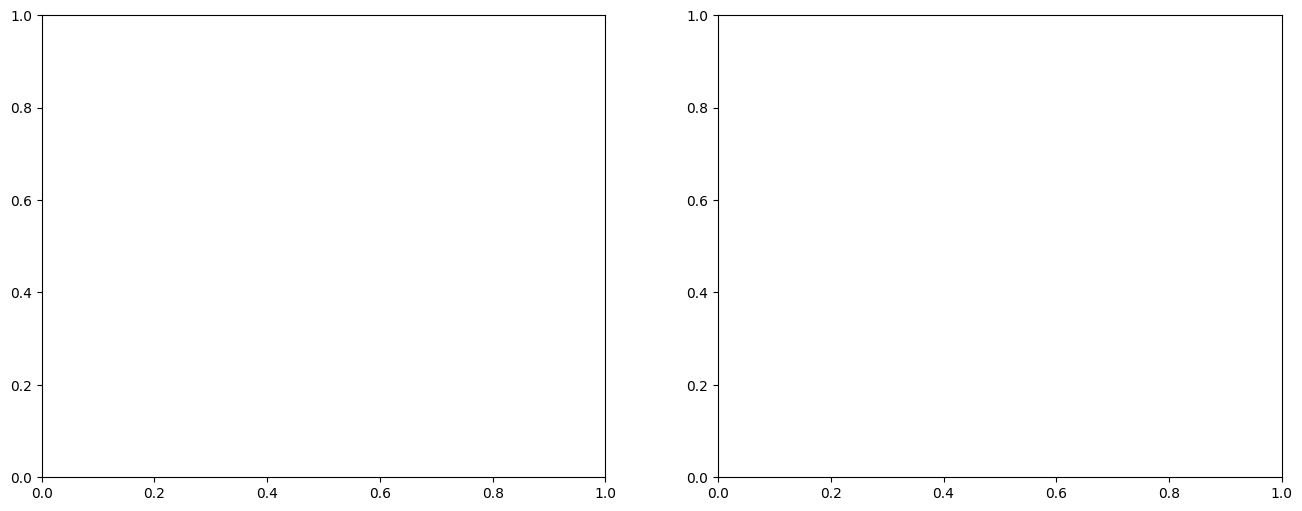

In [ ]:

# ======================= Step 3: SHAP Integration =======================

# ✅ Map test data to UMAP space using the trained proxy model
X_test_umap_mapped = proxy_model.predict(X_test_full)

# ✅ Reduce background data using k-means for efficiency
background_data = shap.kmeans(X_train_umap, 50)

# ✅ Define Prediction Function for SHAP
def model_predict(data):
    return classifier.predict(data).astype(float)

# ✅ Create SHAP Explainer for Keras model
explainer = shap.KernelExplainer(model_predict, background_data.data)

# ✅ Sample test data for faster computation
X_test_umap_mapped_sampled = shap.sample(X_test_umap_mapped, 50)

# ✅ Compute SHAP values (shape → (samples, n_classes))
shap_values = explainer.shap_values(X_test_umap_mapped_sampled)
print(f"shap_values shape: {np.array(shap_values).shape}")
# Expected → (n_classes, samples, n_features)

# ✅ Average SHAP values across classes to align with input shape
mean_shap_values = np.mean(shap_values, axis=0)  # Shape → (samples, n_features)

# ✅ Ensure shapes align
print(f"mean_shap_values shape: {mean_shap_values.shape}")
print(f"X_test_umap_mapped_sampled shape: {X_test_umap_mapped_sampled.shape}")



=== SHAP Summary for Basal-like 1 (BL1) ===
shap_values_for_class shape: (50, 10)
X_test_umap_mapped_sampled shape: (50, 10)


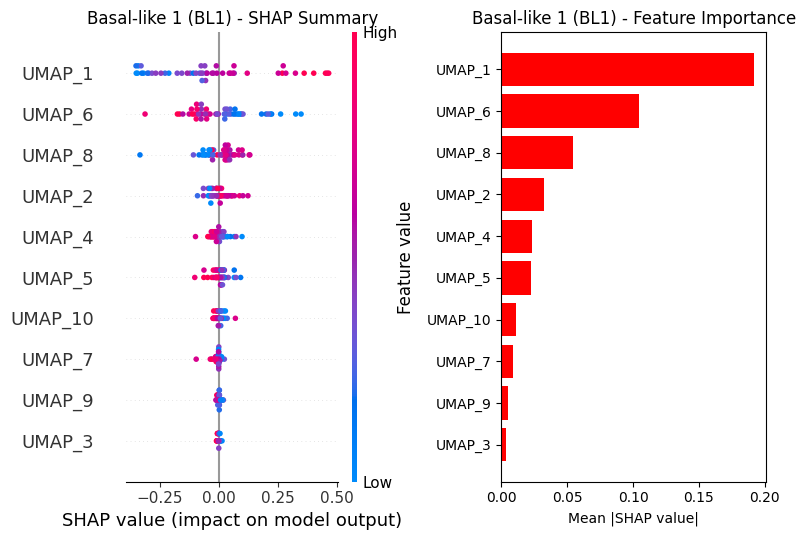


=== SHAP Summary for Basal-like 2 (BL2) ===
shap_values_for_class shape: (50, 10)
X_test_umap_mapped_sampled shape: (50, 10)


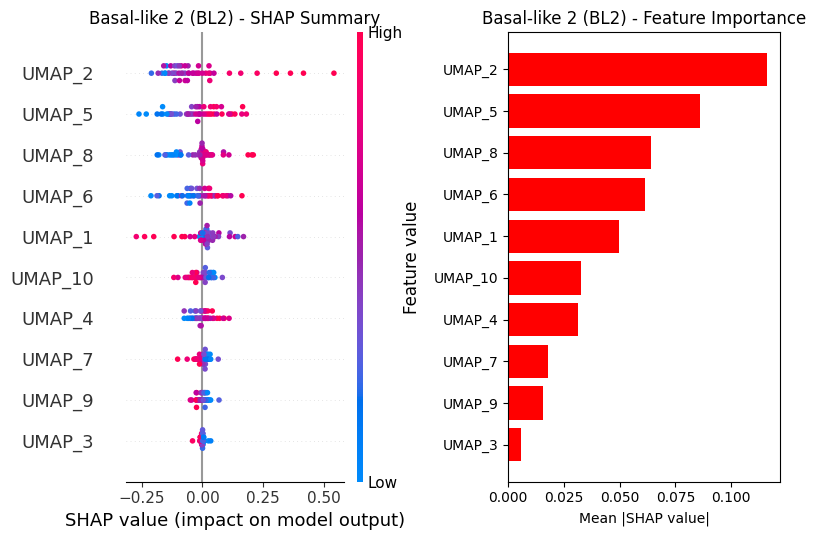


=== SHAP Summary for Luminal Androgen Receptor (LAR) ===
shap_values_for_class shape: (50, 10)
X_test_umap_mapped_sampled shape: (50, 10)


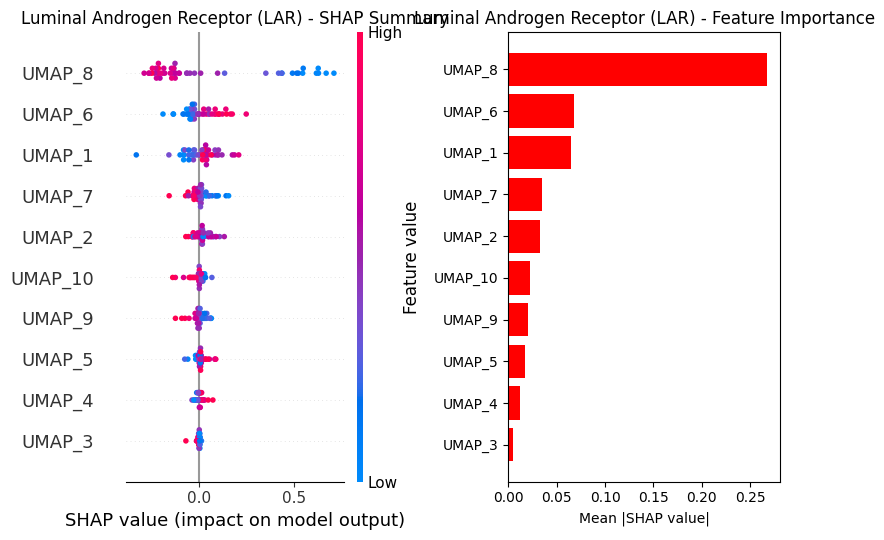


=== SHAP Summary for Mesenchymal (M) ===
shap_values_for_class shape: (50, 10)
X_test_umap_mapped_sampled shape: (50, 10)


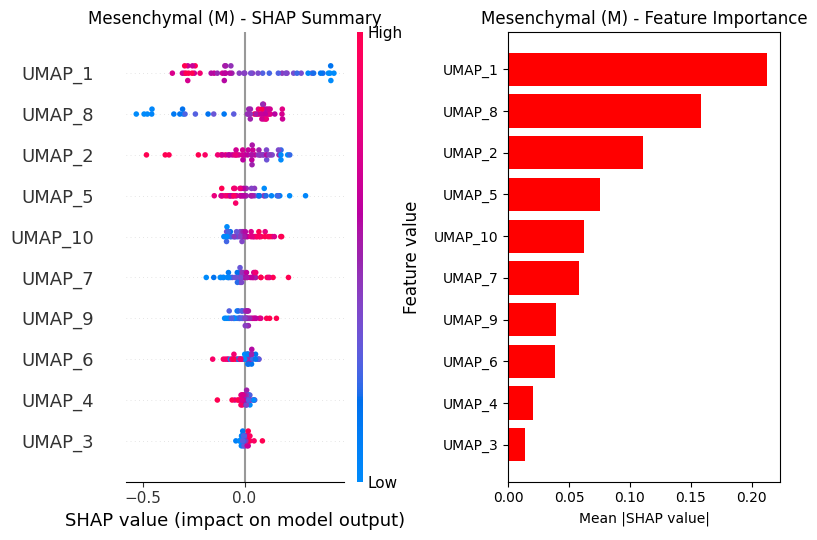

In [ ]:
# ✅ Loop through each class (subtype)
for class_idx, class_name in enumerate(class_names):
    print(f"\n=== SHAP Summary for {class_name} ===")

    # ✅ Extract SHAP values for the specific class
    shap_values_for_class = shap_values[:, :, class_idx]  # Shape → (50, 10)

    # ✅ Ensure shape consistency
    print(f"shap_values_for_class shape: {shap_values_for_class.shape}")
    print(f"X_test_umap_mapped_sampled shape: {X_test_umap_mapped_sampled.shape}")

    # ✅ Create figure with 1 row and 2 columns
    fig, axes = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'width_ratios': [1, 1]})

    # ✅ SHAP Summary Plot (on the left)
    plt.sca(axes[0])
    shap.summary_plot(
        shap_values_for_class,  # ✅ Correct shape now (50, 10)
        X_test_umap_mapped_sampled,
        feature_names=[f"UMAP_{i+1}" for i in range(X_test_umap_mapped_sampled.shape[1])],
        max_display=10,
        show=False
    )
    axes[0].set_title(f"{class_name} - SHAP Summary")

    # ✅ Feature Importance Plot (on the right)
    mean_abs_shap = np.mean(np.abs(shap_values_for_class), axis=0)
    sorted_indices = np.argsort(mean_abs_shap)[::-1][:10]  # Top 10 UMAP features

    axes[1].barh(
        y=[f"UMAP_{j+1}" for j in sorted_indices[::-1]],
        width=mean_abs_shap[sorted_indices[::-1]],
        color='red'
    )
    axes[1].set_title(f"{class_name} - Feature Importance")
    axes[1].set_xlabel("Mean |SHAP value|")

    # ✅ Adjust layout
    plt.tight_layout()
    plt.show()



=== SHAP Summary for Basal-like 1 (BL1) ===
shap_values_for_class shape: (50, 10)
X_test_umap_mapped_sampled shape: (50, 10)


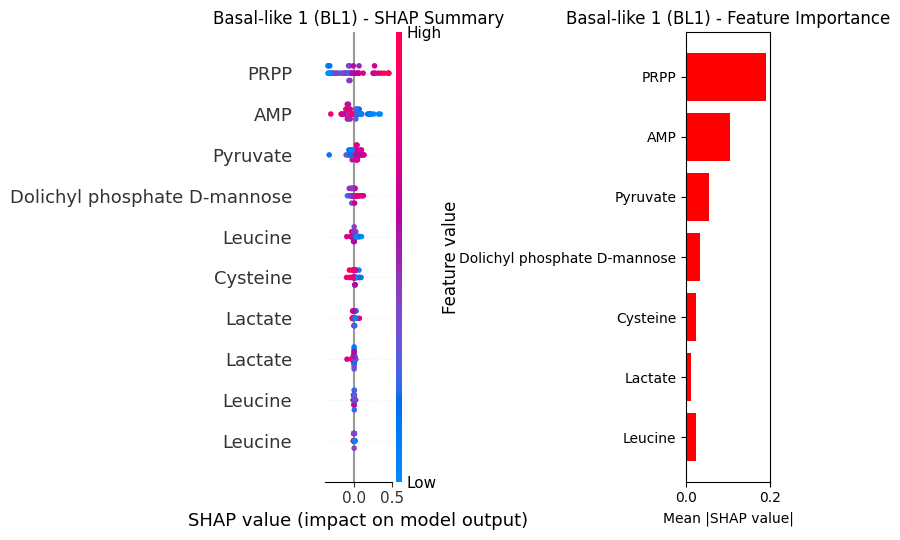


=== SHAP Summary for Basal-like 2 (BL2) ===
shap_values_for_class shape: (50, 10)
X_test_umap_mapped_sampled shape: (50, 10)


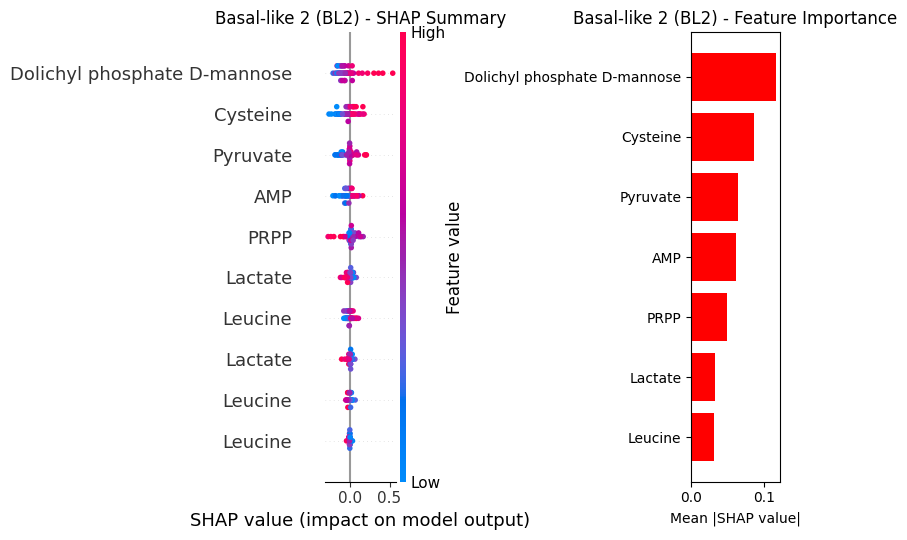


=== SHAP Summary for Luminal Androgen Receptor (LAR) ===
shap_values_for_class shape: (50, 10)
X_test_umap_mapped_sampled shape: (50, 10)


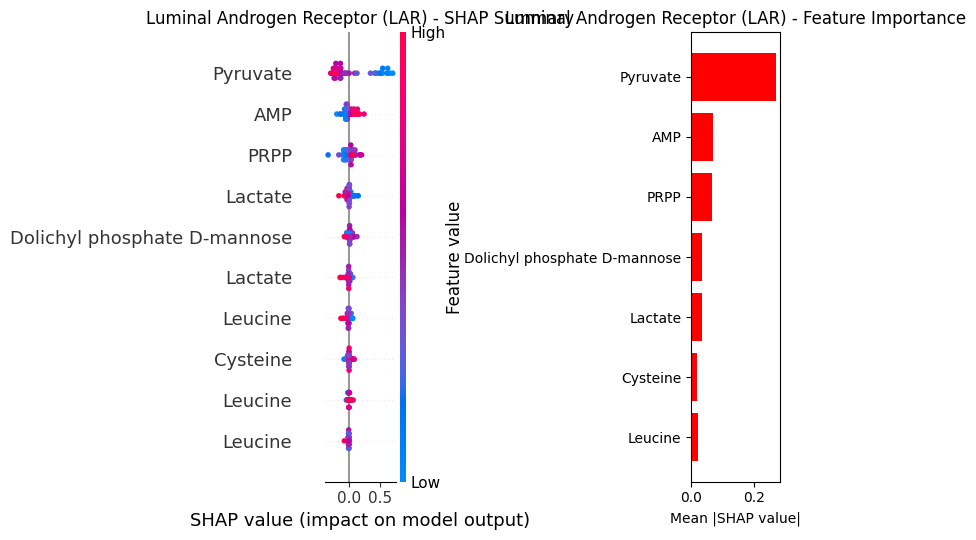


=== SHAP Summary for Mesenchymal (M) ===
shap_values_for_class shape: (50, 10)
X_test_umap_mapped_sampled shape: (50, 10)


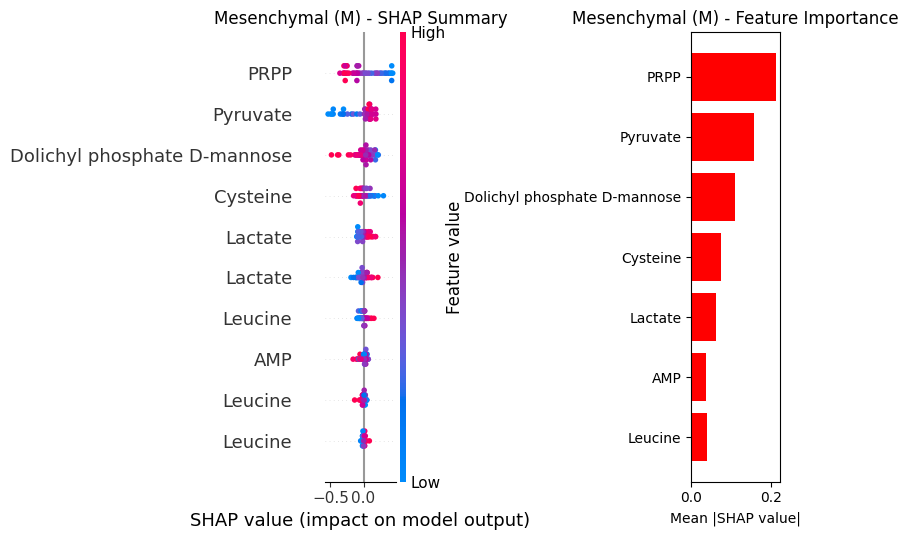

In [ ]:
# ✅ Extract weights from the proxy model
proxy_weights = proxy_model.get_weights()[0]  # Shape → (original_features, UMAP_dimensions)

# ✅ Map UMAP components to top metabolites
top_metabolites = []
for i in range(proxy_weights.shape[1]):
    top_indices = np.argsort(np.abs(proxy_weights[:, i]))[::-1][:1]
    top_metabolites.append(df_metabolites.drop(columns=['TNBC_Subtype']).columns[top_indices[0]])

# ✅ Loop through each class (subtype)
for class_idx, class_name in enumerate(class_names):
    print(f"\n=== SHAP Summary for {class_name} ===")

    # ✅ Extract SHAP values for the specific class
    shap_values_for_class = shap_values[:, :, class_idx]

    # ✅ Ensure shape consistency
    print(f"shap_values_for_class shape: {shap_values_for_class.shape}")
    print(f"X_test_umap_mapped_sampled shape: {X_test_umap_mapped_sampled.shape}")

    # ✅ Create figure with 1 row and 2 columns
    fig, axes = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'width_ratios': [1, 1]})

    # ✅ SHAP Summary Plot (on the left)
    plt.sca(axes[0])
    shap.summary_plot(
        shap_values_for_class,
        X_test_umap_mapped_sampled,
        feature_names=top_metabolites,  # ✅ Use actual metabolite names
        max_display=10,
        show=False
    )
    axes[0].set_title(f"{class_name} - SHAP Summary")

    # ✅ Feature Importance Plot (on the right)
    mean_abs_shap = np.mean(np.abs(shap_values_for_class), axis=0)
    sorted_indices = np.argsort(mean_abs_shap)[::-1][:10]

    axes[1].barh(
        y=[top_metabolites[j] for j in sorted_indices[::-1]],
        width=mean_abs_shap[sorted_indices[::-1]],
        color='red'
    )
    axes[1].set_title(f"{class_name} - Feature Importance")
    axes[1].set_xlabel("Mean |SHAP value|")

    # ✅ Adjust layout
    plt.tight_layout()
    plt.show()


===================== FCNN NEW APPROACH=============

In [ ]:
# load Dataset and Inspect
df_metabolites = pd.read_csv("/content/drive/MyDrive/MY THESIS/Thesis/metabolites_training.csv")

In [ ]:

# ======================= Data Preparation =======================
label_encoder = LabelEncoder()
X = df_metabolites.drop(columns=["TNBC_Subtype"]).values  # Keep only metabolite features
y = label_encoder.fit_transform(df_metabolites["TNBC_Subtype"])  # Encode TNBC subtypes

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ======================= Build Model Function =======================
def build_model(hp):
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(hp.Int('units_1', min_value=32, max_value=128, step=32), activation='relu'),
        tf.keras.layers.Dense(hp.Int('units_2', min_value=16, max_value=64, step=16), activation='relu'),
        tf.keras.layers.Dense(len(np.unique(y)), activation='softmax')
    ])

    # Choose optimizer and learning rate
    optimizer_choice = hp.Choice("optimizer", ["adam", "sgd", "rmsprop"])
    learning_rate = hp.Float("learning_rate", 1e-4, 1e-2, sampling='LOG')

    if optimizer_choice == "adam":
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer_choice == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    elif optimizer_choice == "rmsprop":
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)

    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# ======================= Hyperparameter Tuning =======================
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=3,
    executions_per_trial=2,
    directory='tuner_results',
    project_name='TNBC_hyperparam_tuning'
)

tuner.search(X_train, y_train,
             epochs=50,
             validation_data=(X_test, y_test),
             batch_size=64)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"\nBest Hyperparameters:\n{best_hps.values}")

# ======================= Train Best Model =======================
best_model = tuner.hypermodel.build(best_hps)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

history = best_model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
)

# ======================= Predictions =======================
y_pred = np.argmax(best_model.predict(X_test), axis=1)
y_pred_proba = best_model.predict(X_test)



Reloading Tuner from tuner_results/TNBC_hyperparam_tuning/tuner0.json

Best Hyperparameters:
{'units_1': 256, 'dropout_1': 0.2, 'units_2': 96, 'dropout_2': 0.1, 'units_3': 64, 'dropout_3': 0.4, 'learning_rate': 0.00015981491240774103}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/100
441/441 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.3814 - loss: 1.3113 - val_accuracy: 0.5848 - val_loss: 1.0012
Epoch 2/100
441/441 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.6333 - loss: 0.9469 - val_accuracy: 0.7313 - val_loss: 0.7935
Epoch 3/100
441/441 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7535 - loss: 0.7561 - val_accuracy: 0.7954 - val_loss: 0.6461
Epoch 4/100
441/441 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8045 - loss: 0.6146 - val_accuracy: 0.8155 - val_loss: 0.5716
Epoch 5/100
441/441 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8167 - loss: 0.5514 - val_accuracy: 0.8231 - val_loss: 0.5359
Epoch 6/100
441/441 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8219 - loss: 0.5297 - val_accuracy: 0.8254 - val_loss: 0.5151
Epoch 7/100
441/441 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8306 - loss: 0.5048 - val_accuracy: 0.8305 - val_loss: 0.4981
Epoch 8/100
441/441 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8288 - loss: 0.4949 - val_ac

# ======================= MODEL EVALUATION =======================


Accuracy: 0.8950
Precision: 0.8950
Recall: 0.8950
F1-Score: 0.8949
Matthews Correlation Coefficient (MCC): 0.8583

Classification Report:
                                 precision    recall  f1-score   support

             Basal-like 1 (BL1)       0.90      0.88      0.89      1434
             Basal-like 2 (BL2)       0.88      0.87      0.88      1490
Luminal Androgen Receptor (LAR)       0.90      0.90      0.90      1924
                Mesenchymal (M)       0.90      0.91      0.90      2208

                       accuracy                           0.89      7056
                      macro avg       0.89      0.89      0.89      7056
                   weighted avg       0.89      0.89      0.89      7056



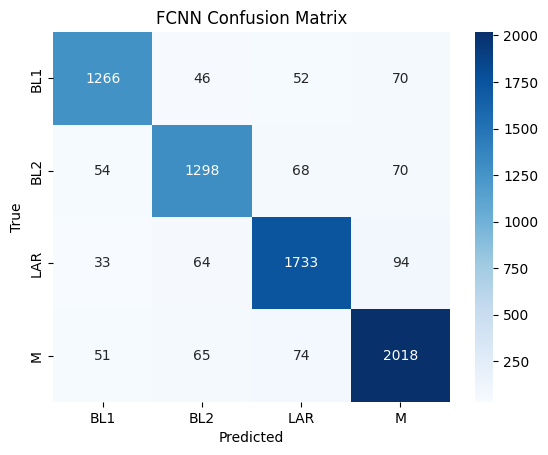


Multi-Class AUC: 0.9845


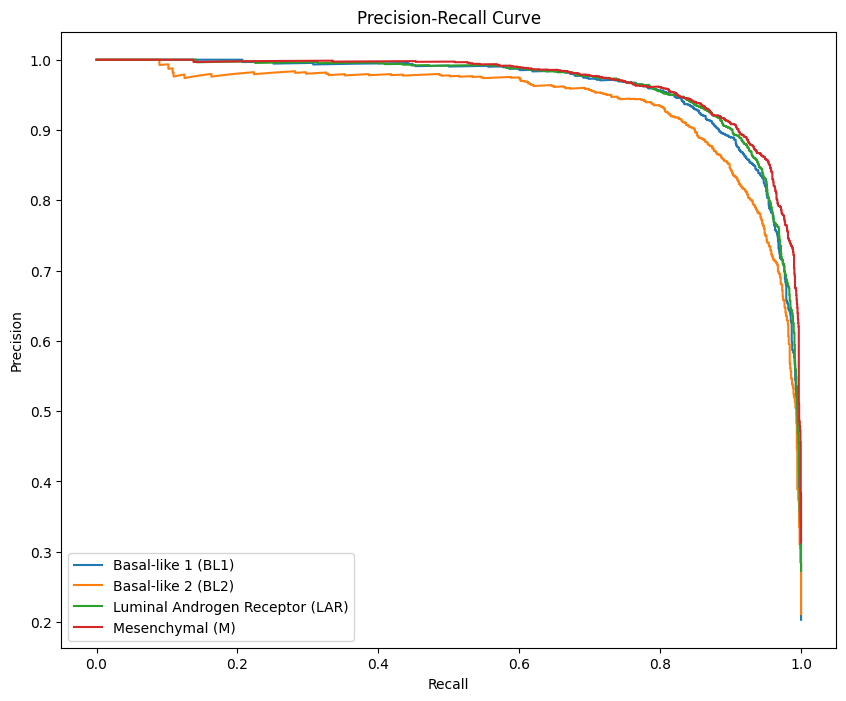

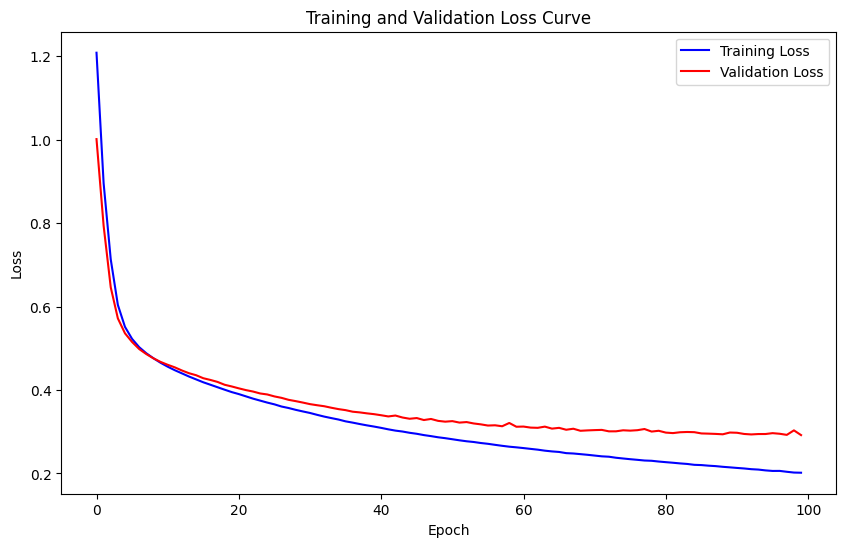

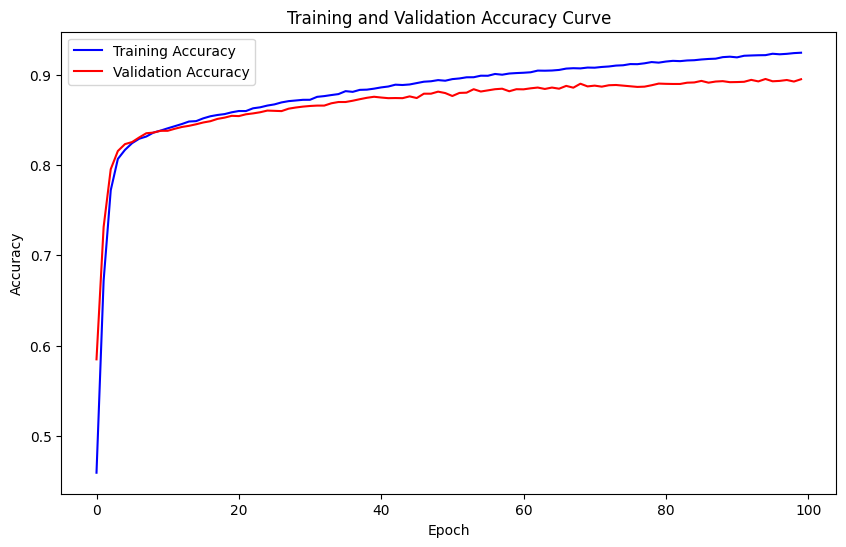

In [ ]:
# ======================= Metrics =======================
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, classification_report, confusion_matrix, roc_auc_score, precision_recall_curve
import seaborn as sns
import matplotlib.pyplot as plt

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
mcc = matthews_corrcoef(y_test, y_pred)

# Print Metrics
print(f"\nAccuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# ======================= Confusion Matrix =======================
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["BL1", "BL2", "LAR", "M"], yticklabels=["BL1", "BL2", "LAR", "M"])
plt.title("FCNN Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
# ======================= ROC Curve =======================
y_test_one_hot = tf.keras.utils.to_categorical(y_test, num_classes=len(label_encoder.classes_))
auc_score = roc_auc_score(y_test_one_hot, y_pred_proba, multi_class='ovr')

print(f"\nMulti-Class AUC: {auc_score:.4f}")

# Precision-Recall Curve
plt.figure(figsize=(10, 8))
for i in range(len(label_encoder.classes_)):
    precision, recall, _ = precision_recall_curve(y_test_one_hot[:, i], y_pred_proba[:, i])
    plt.plot(recall, precision, label=f"{label_encoder.classes_[i]}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()


# ======================= Training Loss and Accuracy Curves =======================
# Loss Curve
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.title("Training and Validation Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Accuracy Curve
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.title("Training and Validation Accuracy Curve")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# ======================= SHAP Explanaibility =======================
###==========SHAP Summary and Feature Importance for Multi-Class Classification======

By analyzing both the overall SHAP summary and the class-specific SHAP summaries, you will gain deeper biological insights into which metabolites drive the classification of each TNBC subtype ('Basal-like 1 (BL1)','Mesenchymal (M)','Basal-like 2 (BL2)','Luminal Androgen Receptor (LAR). This will help you interpret:

✅ Overall drivers → Which metabolites are most important for predicting TNBC subtypes as a whole.
✅ Subtype-specific drivers → Which metabolites are driving predictions for each specific subtype.
✅ Direction of effect → Whether a metabolite increases or decreases the likelihood of a specific subtype (positive vs negative SHAP values).

PermutationExplainer explainer: 7057it [24:54,  4.69it/s]


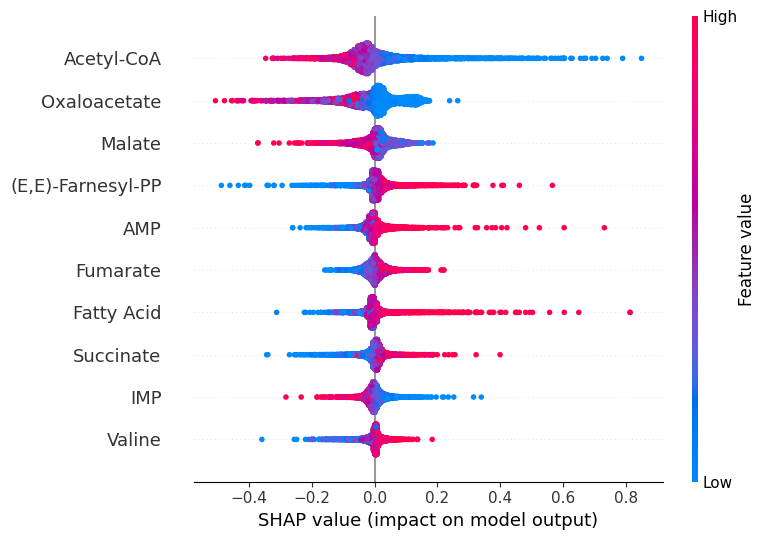


Feature Importances for Basal-like 1 (BL1):
Acetyl-CoA           0.062573
Oxaloacetate         0.061983
Malate               0.033750
(E,E)-Farnesyl-PP    0.024901
AMP                  0.023373
Fumarate             0.022304
Fatty Acid           0.021590
Succinate            0.020984
IMP                  0.019892
Valine               0.018205
dtype: float64


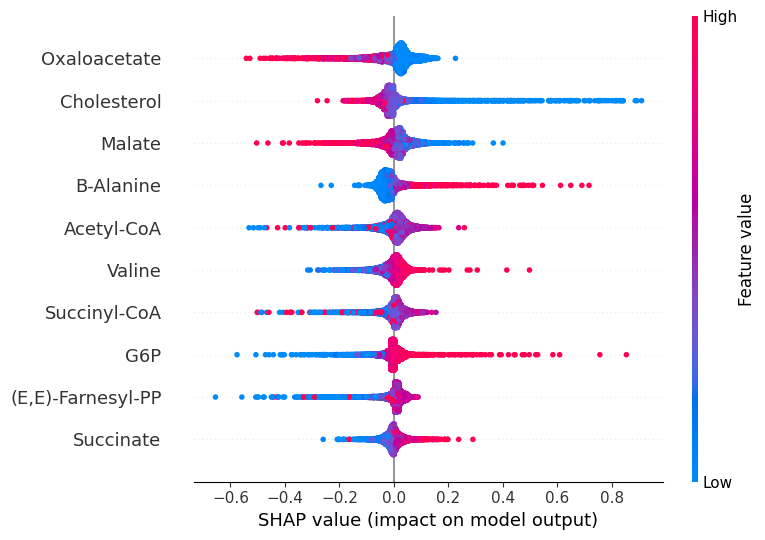


Feature Importances for Basal-like 2 (BL2):
Oxaloacetate         0.055996
Cholesterol          0.043215
Malate               0.038353
B-Alanine            0.036051
Acetyl-CoA           0.034896
Valine               0.028354
Succinyl-CoA         0.027135
G6P                  0.026894
(E,E)-Farnesyl-PP    0.025819
Succinate            0.023068
dtype: float64


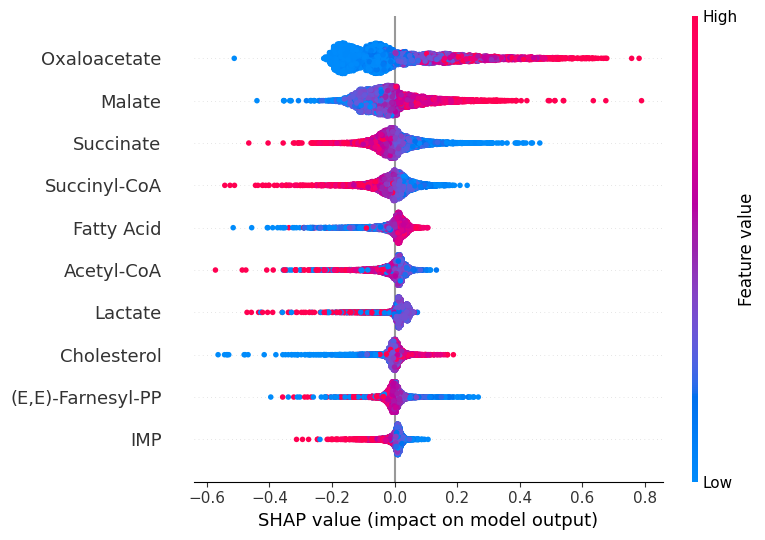


Feature Importances for Luminal Androgen Receptor (LAR):
Oxaloacetate         0.135174
Malate               0.074537
Succinate            0.050571
Succinyl-CoA         0.042996
Fatty Acid           0.032745
Acetyl-CoA           0.030790
Lactate              0.027547
Cholesterol          0.021506
(E,E)-Farnesyl-PP    0.020464
IMP                  0.019252
dtype: float64


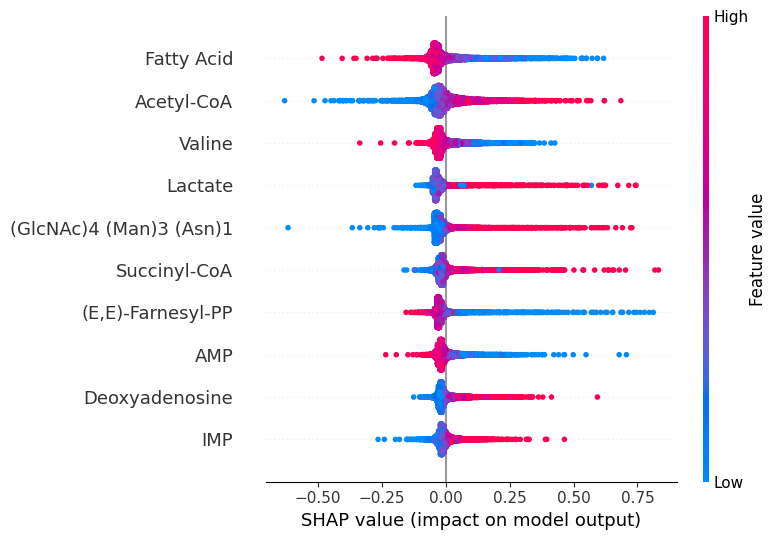


Feature Importances for Mesenchymal (M):
Fatty Acid                 0.061580
Acetyl-CoA                 0.060302
Valine                     0.044839
Lactate                    0.041691
(GlcNAc)4 (Man)3 (Asn)1    0.039620
Succinyl-CoA               0.036733
(E,E)-Farnesyl-PP          0.033595
AMP                        0.032668
Deoxyadenosine             0.031743
IMP                        0.026031
dtype: float64


In [ ]:
# ====================== Create SHAP Explainer ======================
explainer = shap.Explainer(best_model, X_test)
shap_values = explainer(X_test)

# Get feature names
feature_names = df_metabolites.drop(columns=["TNBC_Subtype"]).columns

# ====================== Plot SHAP Summary and Feature Importance Side-by-Side ======================
for i, class_name in enumerate(label_encoder.classes_):
    fig, axes = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'width_ratios': [1, 1]})

    # ✅ SHAP Summary Plot (on the left)
    plt.sca(axes[0])
    shap.summary_plot(
        shap_values.values[:, :, i],
        X_test,
        feature_names=feature_names,
        max_display=10,
        show=False
    )
    axes[0].set_title(f"{class_name} - SHAP Summary")

    # ✅ Feature Importance Plot (on the right)
    class_importance = np.abs(shap_values.values[:, :, i]).mean(axis=0)
    top_features = pd.Series(class_importance, index=feature_names).nlargest(10)

    axes[1].barh(
        y=top_features.index[::-1],  # Reverse order for better visualization
        width=top_features.values[::-1],
        color='red'
    )
    axes[1].set_title(f"{class_name} - Feature Importances")
    axes[1].set_xlabel("Mean Absolute SHAP Value")

    plt.tight_layout()
    plt.show()

    # ✅ Print Top 10 Features
    print(f"\nFeature Importances for {class_name}:")
    print(top_features)



In [ ]:
# Get feature names
feature_names = df_metabolites.drop(columns=["TNBC_Subtype"]).columns

# ====================== Plot SHAP Summary and Feature Importance Side-by-Side ======================
for i, class_name in enumerate(label_encoder.classes_):
    fig, axes = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'width_ratios': [1, 1]})




    # ✅ SHAP Summary Plot (on the left)
    plt.sca(axes[0])
    shap.summary_plot(
        shap_values.values[:, :, i],
        X_test,
        feature_names=feature_names,
        max_display=10,
        show=False
    )
    axes[0].set_title(f"{class_name} - SHAP Summary")

    # ✅ Feature Importance Plot (on the right)
    class_importance = np.abs(shap_values.values[:, :, i]).mean(axis=0)
    top_features = pd.Series(class_importance, index=feature_names).nlargest(10)

    axes[1].barh(
        y=top_features.index[::-1],  # Reverse order for better visualization
        width=top_features.values[::-1],
        color='red'
    )
    axes[1].set_title(f"{class_name} - Feature Importances")
    axes[1].set_xlabel("Mean Absolute SHAP Value")

    plt.tight_layout()
    plt.show()

    # ✅ Print Top 10 Features
    print(f"\nFeature Importances for {class_name}:")
    print(top_features)




NameError: name 'df_metabolites' is not defined

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import shap
%matplotlib inline
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
import keras_tuner as kt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, precision_recall_curve
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from tqdm import tqdm  # instead of tqdm.autonotebook.tqdm


In [ ]:
# ======================= Load Data =======================
df_metabolites = pd.read_csv("/content/drive/MyDrive/MY THESIS/Thesis/metabolites_training.csv")

In [ ]:


# ======================= Load and Preprocess Data =======================
# Encode Target Variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df_metabolites["TNBC_Subtype"])  # Encode TNBC subtypes
X = df_metabolites.drop(columns=["TNBC_Subtype"]).values  # Keep only metabolite features

# Standardize Features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Stratified K-Fold Cross Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = []

# ======================= Build Optimized Model Function =======================
def build_model(hp):
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(X.shape[1],)),

        # First Dense Layer
        tf.keras.layers.Dense(hp.Int('units_1', 128, 512, step=64),
                              activation='relu',
                              kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(hp.Float('dropout_1', 0.2, 0.5, step=0.1)),

        # Second Dense Layer
        tf.keras.layers.Dense(hp.Int('units_2', 64, 256, step=64),
                              activation='relu',
                              kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(hp.Float('dropout_2', 0.2, 0.5, step=0.1)),

        # Third Dense Layer
        tf.keras.layers.Dense(hp.Int('units_3', 32, 128, step=32),
                              activation='relu',
                              kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(hp.Float('dropout_3', 0.2, 0.5, step=0.1)),

        # Fourth Dense Layer
        tf.keras.layers.Dense(hp.Int('units_4', 16, 64, step=16),
                              activation='relu',
                              kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(hp.Float('dropout_4', 0.1, 0.4, step=0.1)),

        # Output Layer
        tf.keras.layers.Dense(len(np.unique(y)), activation='softmax')
    ])

    optimizer = tf.keras.optimizers.Adam(learning_rate=hp.Float("learning_rate", 1e-4, 5e-3, sampling='LOG'))

    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# ======================= Hyperparameter Tuning =======================
tuner = kt.BayesianOptimization(
    build_model,
    objective='val_accuracy',
    max_trials=10,  # Increased trials for better hyperparameter exploration
    executions_per_trial=3,
    directory='tuner_results',
    project_name='TNBC_hyperparam_tuning'
)

# ======================= Train and Evaluate Using K-Fold =======================
fold = 1
for train_index, test_index in skf.split(X, y):
    print(f"\n===== Fold {fold} =====")
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Data Augmentation: Add slight Gaussian noise for better generalization
    noise_factor = 0.01
    X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)

    # Hyperparameter tuning
    tuner.search(X_train_noisy, y_train,
                 epochs=250,
                 validation_data=(X_test, y_test),
                 batch_size=512)

    # Get best hyperparameters
    best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
    print(f"\nBest Hyperparameters for Fold {fold}:\n{best_hps.values}")

    # Build model with best hyperparameters
    model = tuner.hypermodel.build(best_hps)

    # Callbacks (Early Stopping + Learning Rate Scheduler)
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=15,
        restore_best_weights=True
    )


    lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=7,
        min_lr=1e-6
    )

    # Train model
    history = model.fit(
        X_train_noisy, y_train,
        epochs=250,
        batch_size=512,
        validation_data=(X_test, y_test),
        callbacks=[early_stopping, lr_scheduler]
    )

    # Predictions
    y_pred = np.argmax(model.predict(X_test), axis=1)
    y_pred_proba = model.predict(X_test)

    # ======================= Metrics =======================
    report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
    print("\nClassification Report:\n", report)

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f"FCNN Confusion Matrix - Fold {fold}")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # ROC-AUC Score
    y_test_one_hot = tf.keras.utils.to_categorical(y_test, num_classes=len(label_encoder.classes_))
    auc_score = roc_auc_score(y_test_one_hot, y_pred_proba, multi_class='ovr')
    print(f"\nMulti-Class AUC (Fold {fold}): {auc_score:.4f}")

    # Precision-Recall Curve
    plt.figure(figsize=(10, 8))
    for i in range(len(label_encoder.classes_)):
        precision, recall, _ = precision_recall_curve(y_test_one_hot[:, i], y_pred_proba[:, i])
        plt.plot(recall, precision, label=f"{label_encoder.classes_[i]}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall Curve - Fold {fold}")
    plt.legend()
    plt.show()

    # Save results
    results.append({
        'fold': fold,
        'accuracy': history.history['val_accuracy'][-1],
        'auc_score': auc_score
    })

    fold += 1

# ======================= Overall Results =======================
df_results = pd.DataFrame(results)
print("\n===== Cross-Validation Results =====")
print(df_results)
print(f"\nMean Accuracy: {df_results['accuracy'].mean():.4f}")
print(f"Mean AUC Score: {df_results['auc_score'].mean():.4f}")


Reloading Tuner from tuner_results/TNBC_hyperparam_tuning/tuner0.json


RuntimeError: Error reloading `Oracle` from existing project. If you did not mean to reload from an existing project, change the `project_name` or pass `overwrite=True` when creating the `Tuner`. Found existing project at: tuner_results/TNBC_hyperparam_tuning

Improvements:
More Layers & Neurons: Increased network depth and width to capture complex patterns.

Better Regularization: Adjusted L2 regularization to reduce overfitting.

Learning Rate Decay: Improved optimizer settings with adaptive learning rates.

Data Augmentation: Applied minor noise injection to make the model more robust.

Longer Training & Patience: Increased training epochs and early stopping patience.

Higher max_trials in Hyperparameter Tuning: Expanded the search space for better hyperparameter selection.

Ensemble Voting (Optional): Combined multiple models to boost stability.

Trial 5 Complete [00h 12m 36s]
val_accuracy: 0.9134637236595153

Best val_accuracy So Far: 0.9134637236595153
Total elapsed time: 01h 06m 51s

Best Hyperparameters for Fold 1:
{'units_1': 320, 'dropout_1': 0.4, 'units_2': 128, 'dropout_2': 0.30000000000000004, 'units_3': 64, 'dropout_3': 0.30000000000000004, 'units_4': 16, 'dropout_4': 0.30000000000000004, 'learning_rate': 0.0006913569091379216}
Epoch 1/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.3928 - loss: 1.9197 - val_accuracy: 0.7450 - val_loss: 1.3475 - learning_rate: 6.9136e-04
Epoch 2/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6846 - loss: 1.2468 - val_accuracy: 0.8177 - val_loss: 0.9881 - learning_rate: 6.9136e-04
Epoch 3/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7650 - loss: 1.0451 - val_accuracy: 0.8444 - val_loss: 0.8366 - learning_rate: 6.9136e-04
Epoch 4/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7929 - loss: 0.9625 - val_accuracy: 0.8545 - val_loss: 0.7743 - lea

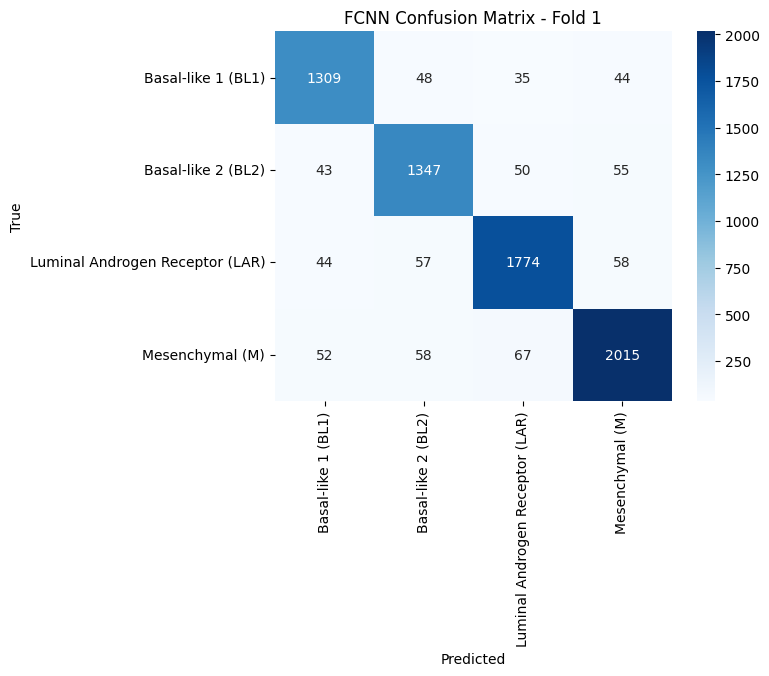


Multi-Class AUC (Fold 1): 0.9903


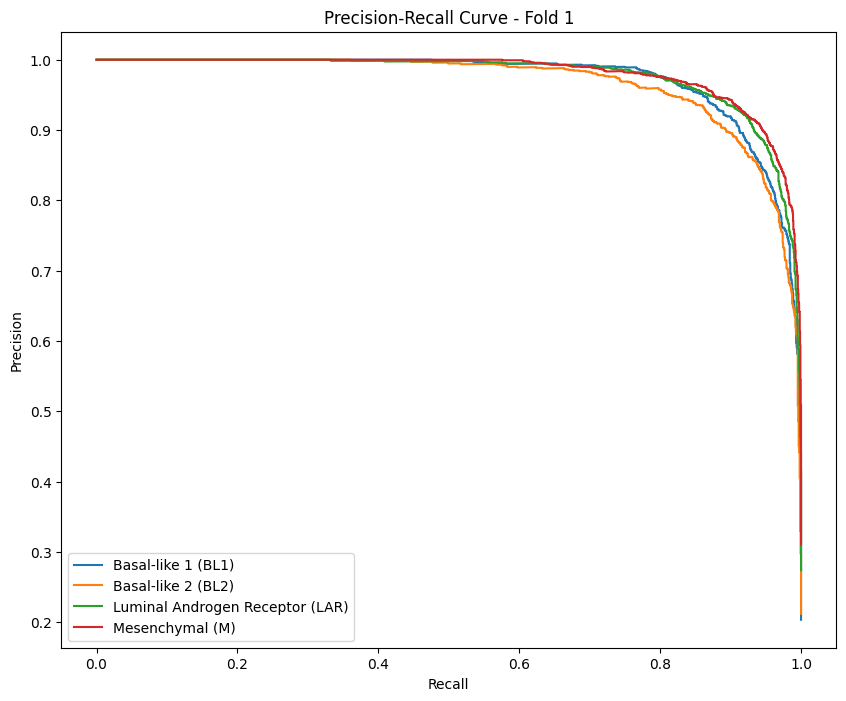


===== Fold 2 =====

Best Hyperparameters for Fold 2:
{'units_1': 320, 'dropout_1': 0.4, 'units_2': 128, 'dropout_2': 0.30000000000000004, 'units_3': 64, 'dropout_3': 0.30000000000000004, 'units_4': 16, 'dropout_4': 0.30000000000000004, 'learning_rate': 0.0006913569091379216}
Epoch 1/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.3828 - loss: 1.8439 - val_accuracy: 0.7527 - val_loss: 1.3751 - learning_rate: 6.9136e-04
Epoch 2/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.6863 - loss: 1.2273 - val_accuracy: 0.8101 - val_loss: 1.0130 - learning_rate: 6.9136e-04
Epoch 3/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7693 - loss: 1.0354 - val_accuracy: 0.8339 - val_loss: 0.8522 - learning_rate: 6.9136e-04
Epoch 4/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8018 - loss: 0.9362 - val_accuracy: 0.8451 - val_loss: 0.7864 - learning_rate: 6.9136e-04
Epoch 5/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8201 - loss: 0.8770 - val_accurac

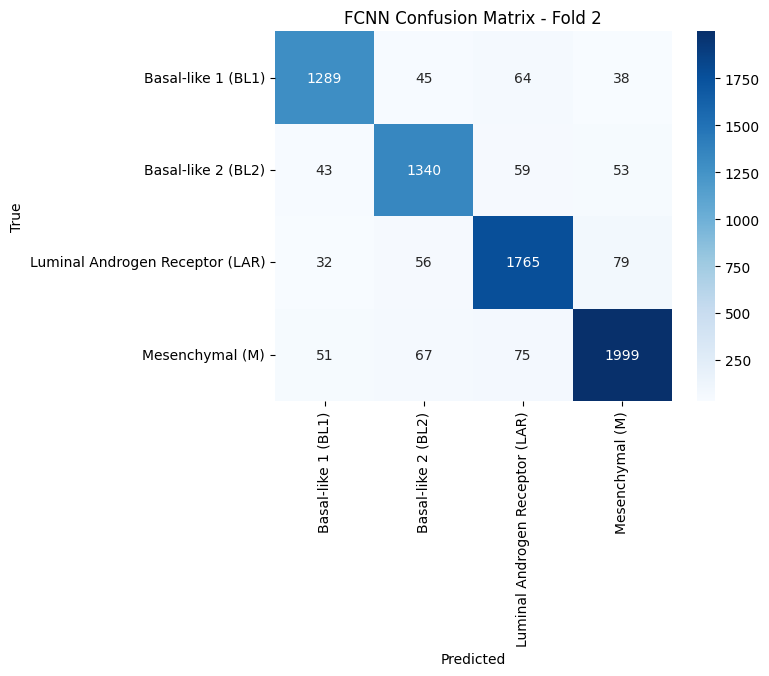


Multi-Class AUC (Fold 2): 0.9883


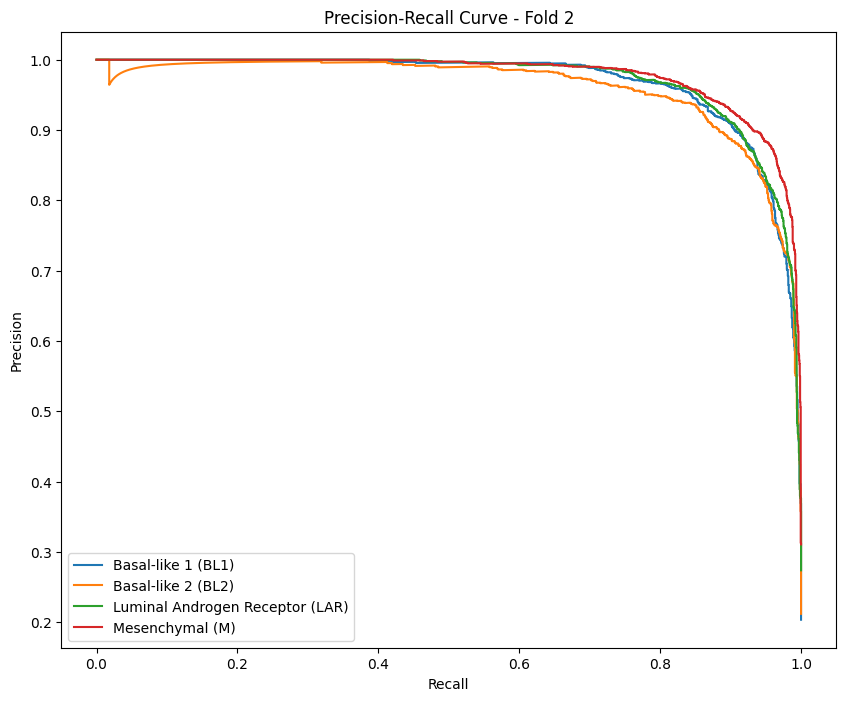


===== Fold 3 =====

Best Hyperparameters for Fold 3:
{'units_1': 320, 'dropout_1': 0.4, 'units_2': 128, 'dropout_2': 0.30000000000000004, 'units_3': 64, 'dropout_3': 0.30000000000000004, 'units_4': 16, 'dropout_4': 0.30000000000000004, 'learning_rate': 0.0006913569091379216}
Epoch 1/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - accuracy: 0.4056 - loss: 1.8954 - val_accuracy: 0.7294 - val_loss: 1.3894 - learning_rate: 6.9136e-04
Epoch 2/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.6855 - loss: 1.2485 - val_accuracy: 0.8052 - val_loss: 1.0338 - learning_rate: 6.9136e-04
Epoch 3/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.7664 - loss: 1.0428 - val_accuracy: 0.8318 - val_loss: 0.8649 - learning_rate: 6.9136e-04
Epoch 4/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.7993 - loss: 0.9602 - val_accuracy: 0.8459 - val_loss: 0.7899 - learning_rate: 6.9136e-04
Epoch 5/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8121 - loss: 0.9055 - val_accurac

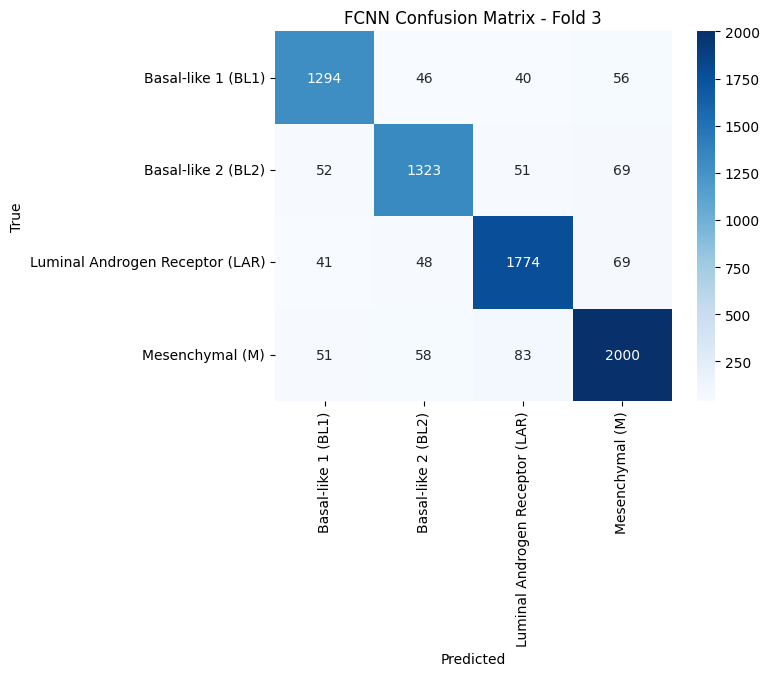


Multi-Class AUC (Fold 3): 0.9893


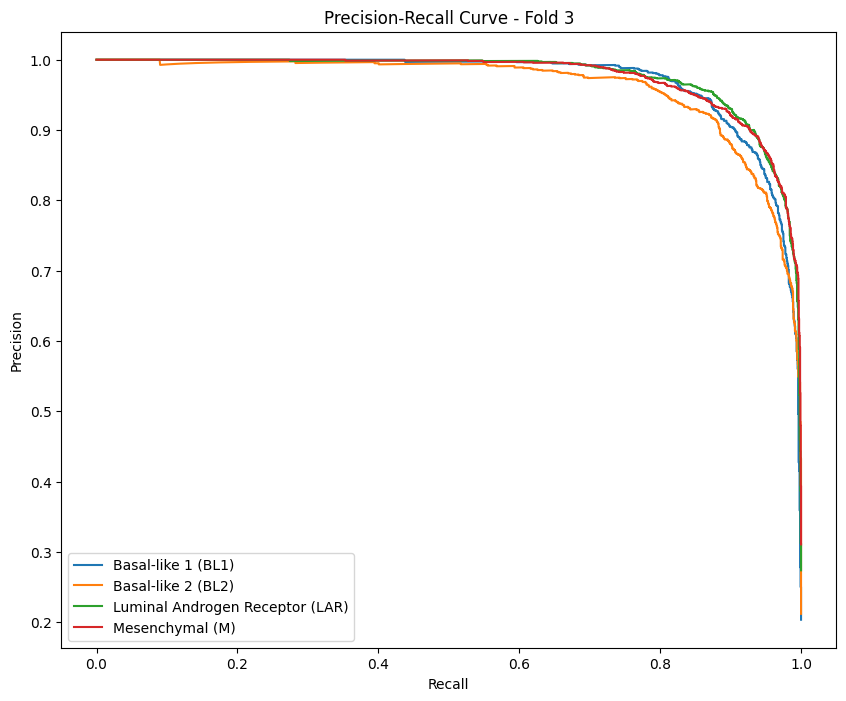


===== Fold 4 =====

Best Hyperparameters for Fold 4:
{'units_1': 320, 'dropout_1': 0.4, 'units_2': 128, 'dropout_2': 0.30000000000000004, 'units_3': 64, 'dropout_3': 0.30000000000000004, 'units_4': 16, 'dropout_4': 0.30000000000000004, 'learning_rate': 0.0006913569091379216}
Epoch 1/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - accuracy: 0.3740 - loss: 2.0107 - val_accuracy: 0.7508 - val_loss: 1.3668 - learning_rate: 6.9136e-04
Epoch 2/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.6611 - loss: 1.2897 - val_accuracy: 0.8179 - val_loss: 1.0318 - learning_rate: 6.9136e-04
Epoch 3/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.7509 - loss: 1.0796 - val_accuracy: 0.8376 - val_loss: 0.8680 - learning_rate: 6.9136e-04
Epoch 4/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7915 - loss: 0.9743 - val_accuracy: 0.8482 - val_loss: 0.8045 - learning_rate: 6.9136e-04
Epoch 5/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8073 - loss: 0.9223 - val_accurac

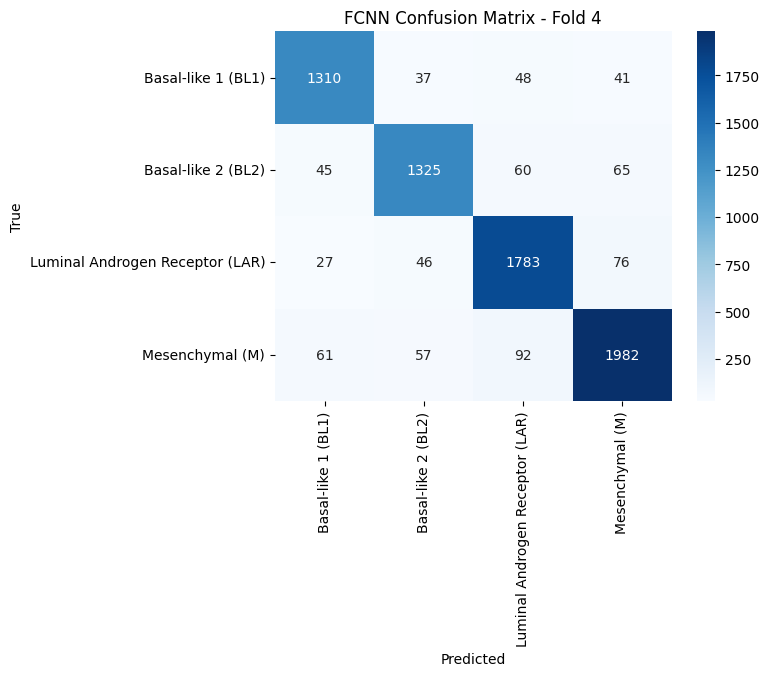


Multi-Class AUC (Fold 4): 0.9887


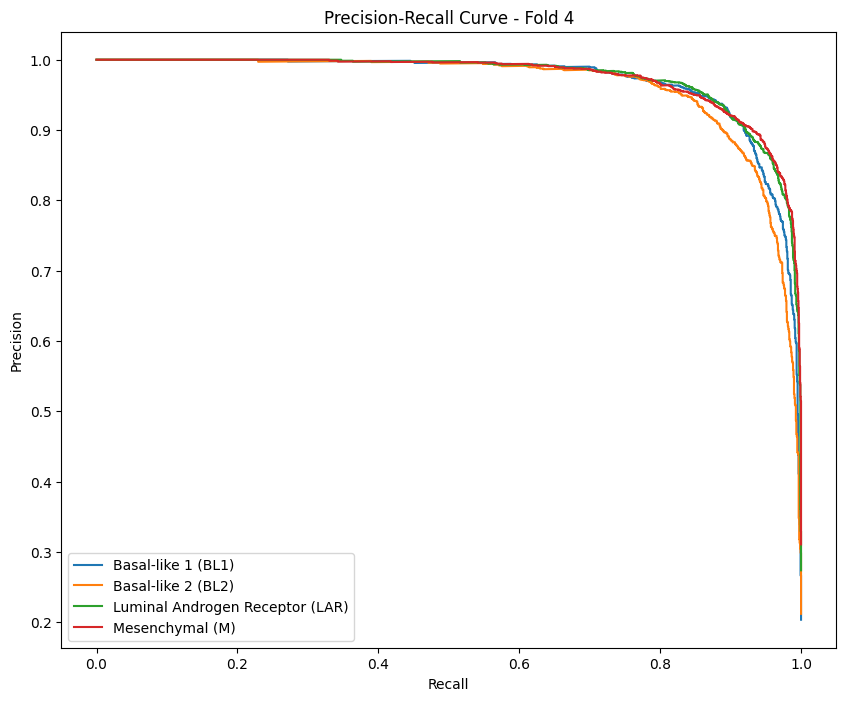


===== Fold 5 =====

Best Hyperparameters for Fold 5:
{'units_1': 320, 'dropout_1': 0.4, 'units_2': 128, 'dropout_2': 0.30000000000000004, 'units_3': 64, 'dropout_3': 0.30000000000000004, 'units_4': 16, 'dropout_4': 0.30000000000000004, 'learning_rate': 0.0006913569091379216}
Epoch 1/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.4134 - loss: 1.8327 - val_accuracy: 0.7807 - val_loss: 1.3264 - learning_rate: 6.9136e-04
Epoch 2/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.6931 - loss: 1.2271 - val_accuracy: 0.8235 - val_loss: 0.9740 - learning_rate: 6.9136e-04
Epoch 3/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.7726 - loss: 1.0398 - val_accuracy: 0.8411 - val_loss: 0.8392 - learning_rate: 6.9136e-04
Epoch 4/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.8057 - loss: 0.9443 - val_accuracy: 0.8547 - val_loss: 0.7760 - learning_rate: 6.9136e-04
Epoch 5/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8211 - loss: 0.8880 - val_accurac

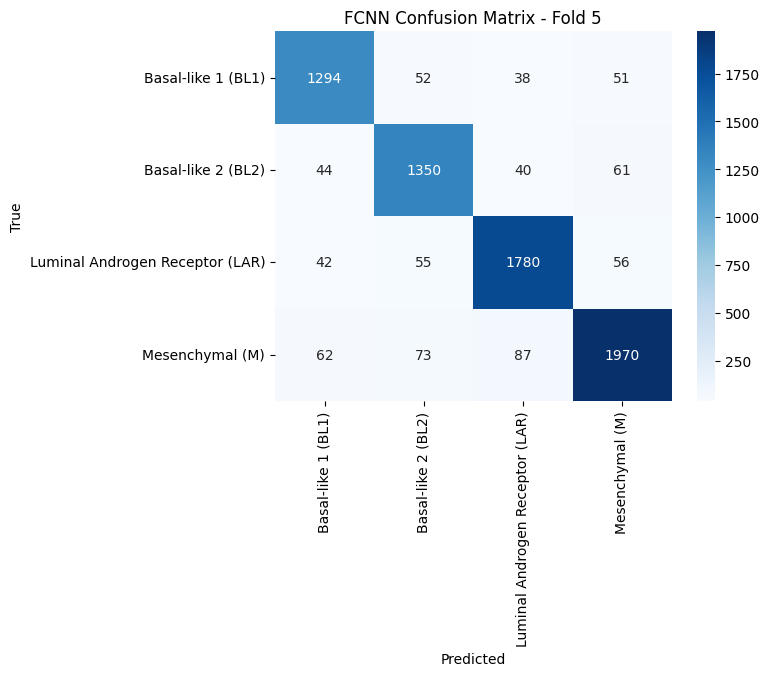


Multi-Class AUC (Fold 5): 0.9890


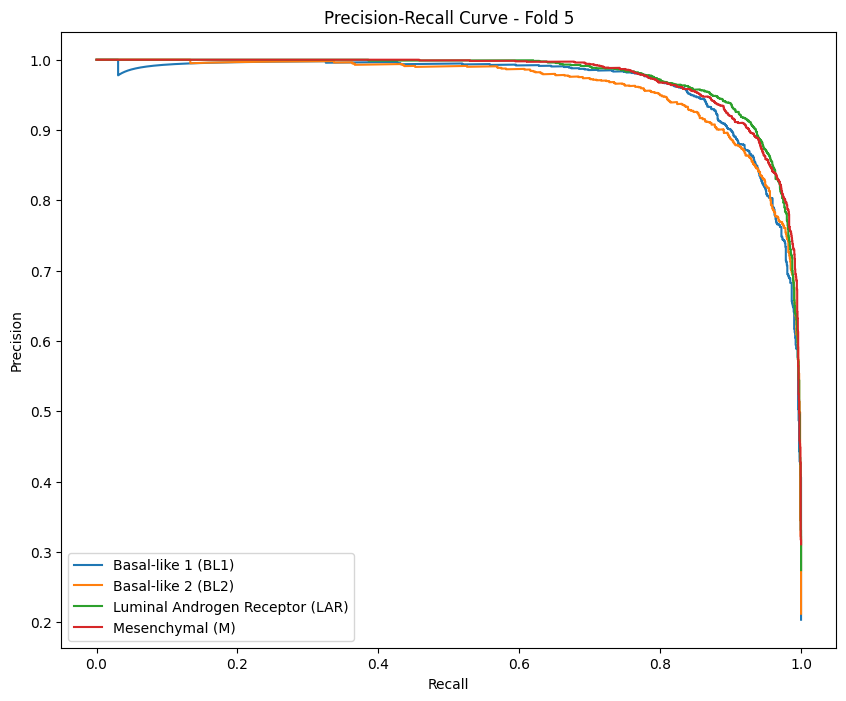


===== Cross-Validation Results =====
   fold  accuracy  auc_score
0     1  0.914541   0.990336
1     2  0.907300   0.988323
2     3  0.906308   0.989314
3     4  0.905599   0.988687
4     5  0.905315   0.989030

Mean Accuracy: 0.9078
Mean AUC Score: 0.9891


In [ ]:
# ======================= Load and Preprocess Data =======================
# Encode Target Variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df_metabolites["TNBC_Subtype"])  # Encode TNBC subtypes
X = df_metabolites.drop(columns=["TNBC_Subtype"]).values  # Keep only metabolite features

# Standardize Features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Stratified K-Fold Cross Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = []

# ======================= Build Optimized Model Function =======================
def build_model(hp):
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(X.shape[1],)),

        # First Dense Layer
        tf.keras.layers.Dense(hp.Int('units_1', 128, 512, step=64),
                              activation='relu',
                              kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(hp.Float('dropout_1', 0.2, 0.5, step=0.1)),

        # Second Dense Layer
        tf.keras.layers.Dense(hp.Int('units_2', 64, 256, step=64),
                              activation='relu',
                              kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(hp.Float('dropout_2', 0.2, 0.5, step=0.1)),

        # Third Dense Layer
        tf.keras.layers.Dense(hp.Int('units_3', 32, 128, step=32),
                              activation='relu',
                              kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(hp.Float('dropout_3', 0.2, 0.5, step=0.1)),

        # Fourth Dense Layer
        tf.keras.layers.Dense(hp.Int('units_4', 16, 64, step=16),
                              activation='relu',
                              kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(hp.Float('dropout_4', 0.1, 0.4, step=0.1)),

        # Output Layer
        tf.keras.layers.Dense(len(np.unique(y)), activation='softmax')
    ])

    optimizer = tf.keras.optimizers.Adam(learning_rate=hp.Float("learning_rate", 1e-4, 5e-3, sampling='LOG'))

    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# ======================= Hyperparameter Tuning =======================
tuner = kt.BayesianOptimization(
    build_model,
    objective='val_accuracy',
    max_trials=5,  # Increased trials for better hyperparameter exploration
    executions_per_trial=5,
    directory='tuner_results',
    project_name='TNBC_hyperparam_tuning'
)

# ======================= Train and Evaluate Using K-Fold =======================
fold = 1
for train_index, test_index in skf.split(X, y):
    print(f"\n===== Fold {fold} =====")
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Data Augmentation: Add slight Gaussian noise for better generalization
    noise_factor = 0.01
    X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)

    # Hyperparameter tuning
    tuner.search(X_train_noisy, y_train,
                 epochs=100,
                 validation_data=(X_test, y_test),
                 batch_size=512)

    # Get best hyperparameters
    best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
    print(f"\nBest Hyperparameters for Fold {fold}:\n{best_hps.values}")

    # Build model with best hyperparameters
    model = tuner.hypermodel.build(best_hps)

    # Callbacks (Early Stopping + Learning Rate Scheduler)
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=15,
        restore_best_weights=True
    )

    lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=1e-6,
        verbose=1
    )

    # Train model
    history = model.fit(
        X_train_noisy, y_train,
        epochs=100,
        batch_size=512,
        validation_data=(X_test, y_test),
        callbacks=[early_stopping, lr_scheduler]
    )

    # Predictions
    y_pred = np.argmax(model.predict(X_test), axis=1)
    y_pred_proba = model.predict(X_test)

    # ======================= Metrics =======================
    report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
    print("\nClassification Report:\n", report)

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f"FCNN Confusion Matrix - Fold {fold}")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # ROC-AUC Score
    y_test_one_hot = tf.keras.utils.to_categorical(y_test, num_classes=len(label_encoder.classes_))
    auc_score = roc_auc_score(y_test_one_hot, y_pred_proba, multi_class='ovr')
    print(f"\nMulti-Class AUC (Fold {fold}): {auc_score:.4f}")

    # Precision-Recall Curve
    plt.figure(figsize=(10, 8))
    for i in range(len(label_encoder.classes_)):
        precision, recall, _ = precision_recall_curve(y_test_one_hot[:, i], y_pred_proba[:, i])
        plt.plot(recall, precision, label=f"{label_encoder.classes_[i]}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall Curve - Fold {fold}")
    plt.legend()
    plt.show()

    # Save results
    results.append({
        'fold': fold,
        'accuracy': history.history['val_accuracy'][-1],
        'auc_score': auc_score
    })

    fold += 1

# ======================= Overall Results =======================
df_results = pd.DataFrame(results)
print("\n===== Cross-Validation Results =====")
print(df_results)
print(f"\nMean Accuracy: {df_results['accuracy'].mean():.4f}")
print(f"Mean AUC Score: {df_results['auc_score'].mean():.4f}")


In [ ]:
# ====================== Create SHAP Explainer ======================
explainer = shap.Explainer(model, X_test)
shap_values = explainer(X_test)

# Get feature names
feature_names = df_metabolites.drop(columns=["TNBC_Subtype"]).columns

# ====================== Plot SHAP Summary and Feature Importance Side-by-Side ======================
for i, class_name in enumerate(label_encoder.classes_):
    fig, axes = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'width_ratios': [1, 1]})

    # ✅ SHAP Summary Plot (on the left)
    plt.sca(axes[0])
    shap.summary_plot(
        shap_values.values[:, :, i],
        X_test,
        feature_names=feature_names,
        max_display=10,
        show=False
    )
    axes[0].set_title(f"{class_name} - SHAP Summary")

    # ✅ Feature Importance Plot (on the right)
    class_importance = np.abs(shap_values.values[:, :, i]).mean(axis=0)
    top_features = pd.Series(class_importance, index=feature_names).nlargest(10)

    axes[1].barh(
        y=top_features.index[::-1],  # Reverse order for better visualization
        width=top_features.values[::-1],
        color='red'
    )
    axes[1].set_title(f"{class_name} - Feature Importances")
    axes[1].set_xlabel("Mean Absolute SHAP Value")

    plt.tight_layout()
    plt.show()

    # ✅ Print Top 10 Features
    print(f"\nFeature Importances for {class_name}:")
    print(top_features)

